In [1]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [67]:



# def frame_cal(start_time,end_time):
#     global start_frame
#     global end_frame
#     start_time_x=(start_time//100)*60*24
#     start_time_y=start_time_x%100*24
#     start_frame=start_time_x+start_time_y

#     end_time_x=(end_time//100)*60*24
#     end_time_y=end_time_x%100*24
#     end_frame=end_time_x+end_time_y

import numpy as np
import pandas as pd

def dlib_distance(nameCircle,namecirclelabels,namefile,start_frame,end_frame):
    data=pd.read_csv("X:\\Eye_tracking_Processed_Raw_videos\\dlib_data_distance\\"+namefile+".csv")
#     data=data.iloc[start_frame:end_frame,]
    left_eye_centre_x=data['left_eye_centre_x'].to_list()
    left_eye_centre_y=data['left_eye_centre_y'].to_list()
    right_eye_centre_x=data['right_eye_centre_x'].to_list()
    right_eye_centre_y=data['right_eye_centre_y'].to_list()
    
    distance_from_right_eye_list=[]
    distance_from_left_eye_list=[]
    c=0
    frame = 0
    for i in range(0,end_frame):
        if frame%25==0:
            frame=frame+1
        if i>=start_frame:
#             print("X:\\Python_projects\\yolov5\\circle\\"+nameCircle+"\\labels\\"+nameCircle+"_"+str(i+1+frame)+".txt",)
            try:
#                 print("X:\\Python_projects\\yolov5\\circle\\"+nameCircle+"\\labels\\"+nameCircle+"_"+str(i+1+frame)+".txt",)
                with open("X:\\Python_projects\\yolov5\\circle\\"+nameCircle+"\\labels\\"+namecirclelabels+"_"+str(i+1+frame)+".txt","r") as f:
                    data = f.readlines()
                for dt in data:
                    _,x, y, w, h,_ = map(float, dt.split(' '))
                    x_cord = int((x * 1280))
                    y_cord = int((y * 960))
    #                 width = int((w * 1280))
    #                 height = int((h * 960))


                distance_from_right_eye=np.sqrt((right_eye_centre_x[i]-x_cord)**2+(right_eye_centre_y[i]-y_cord)**2)
                distance_from_left_eye=np.sqrt((left_eye_centre_x[i]-x_cord)**2+(left_eye_centre_y[i]-y_cord)**2)

                distance_from_right_eye_list.append(distance_from_right_eye)
                distance_from_left_eye_list.append(distance_from_left_eye)
                c+=1
            except:
                pass
#                 print("exception")
                
    avg_distance_right_eye=np.mean(distance_from_right_eye_list)
    avg_distance_left_eye=np.mean(distance_from_left_eye_list)
    ad=pd.read_csv(r"X:\Eye_tracking_Processed_Raw_videos\average_distance_2.csv")
    
    dict = {'Name':[namefile],
        'ADR':[avg_distance_right_eye],
        'ADL':[avg_distance_left_eye]
       }
    
    test=pd.DataFrame(dict)
    ad = ad.append(test, ignore_index = True)
    ad.to_csv(r"X:\Eye_tracking_Processed_Raw_videos\average_distance.csv",index=False)
    print(c)

In [91]:
def heatmap720p(inp_C,inp_s,img):
    c=0
    W= int(1280)
    H=int(960)
    Xs=[]
    Ys=[]
    adjust = 0
    while c<48000:
        c+=1
        try:
            if c%25==0:
                adjust+=1
            with open("X:\\Eye_tracking_Processed_Raw_videos\\labels\\circle\\"+inp_c+"\\labels\\"+inp_c+"_"+str(c+adjust)+".txt") as f:
                t = f.read()
            tl = t[:-1].split()
            for i in range(len(tl)):
                tl[i]=float(tl[i])  
            xc,yc= int(tl[1]*W),int(tl[2]*H)

            with open("X:\\Eye_tracking_Processed_Raw_videos\\labels\\screen\\"+imp_s+"\\labels\\"+inp_s+"_thomas_"+str(c)+".txt") as f:
                t = f.read()
            tl = t[:-1].split()
            for i in range(len(tl)):
                tl[i]=float(tl[i])
            x,y= int(tl[1]*W),int(tl[2]*H)
            w,h = int(tl[3]*W),int(tl[4]*H)
            x1,y1 = int(x-w/2),int(y-h/2)

            x2,y2 = int(x+w/2),int(y+h/2)
            if x1<xc and xc<x2 and y1<yc and yc<y2:
                Xs.append(int(((xc-x1)/(x2-x1))*1280))
                Ys.append(int(((yc-y1)/(y2-y1)*960)))

        except:
            pass


    ar = np.zeros((960,1280),dtype=int)
    for i in range(len(Xs)):
        x,y = Xs[i],Ys[i]
        ar[y,x]+=1


    figure(figsize=(24, 18), dpi=80)
    plt.imshow(ar, cmap='hot', interpolation='nearest')
    # plt.show()
    plt.savefig('X:\\Eye_tracking_Processed_Raw_videos\\heatmaps\\72pp\\'+img+'.png')

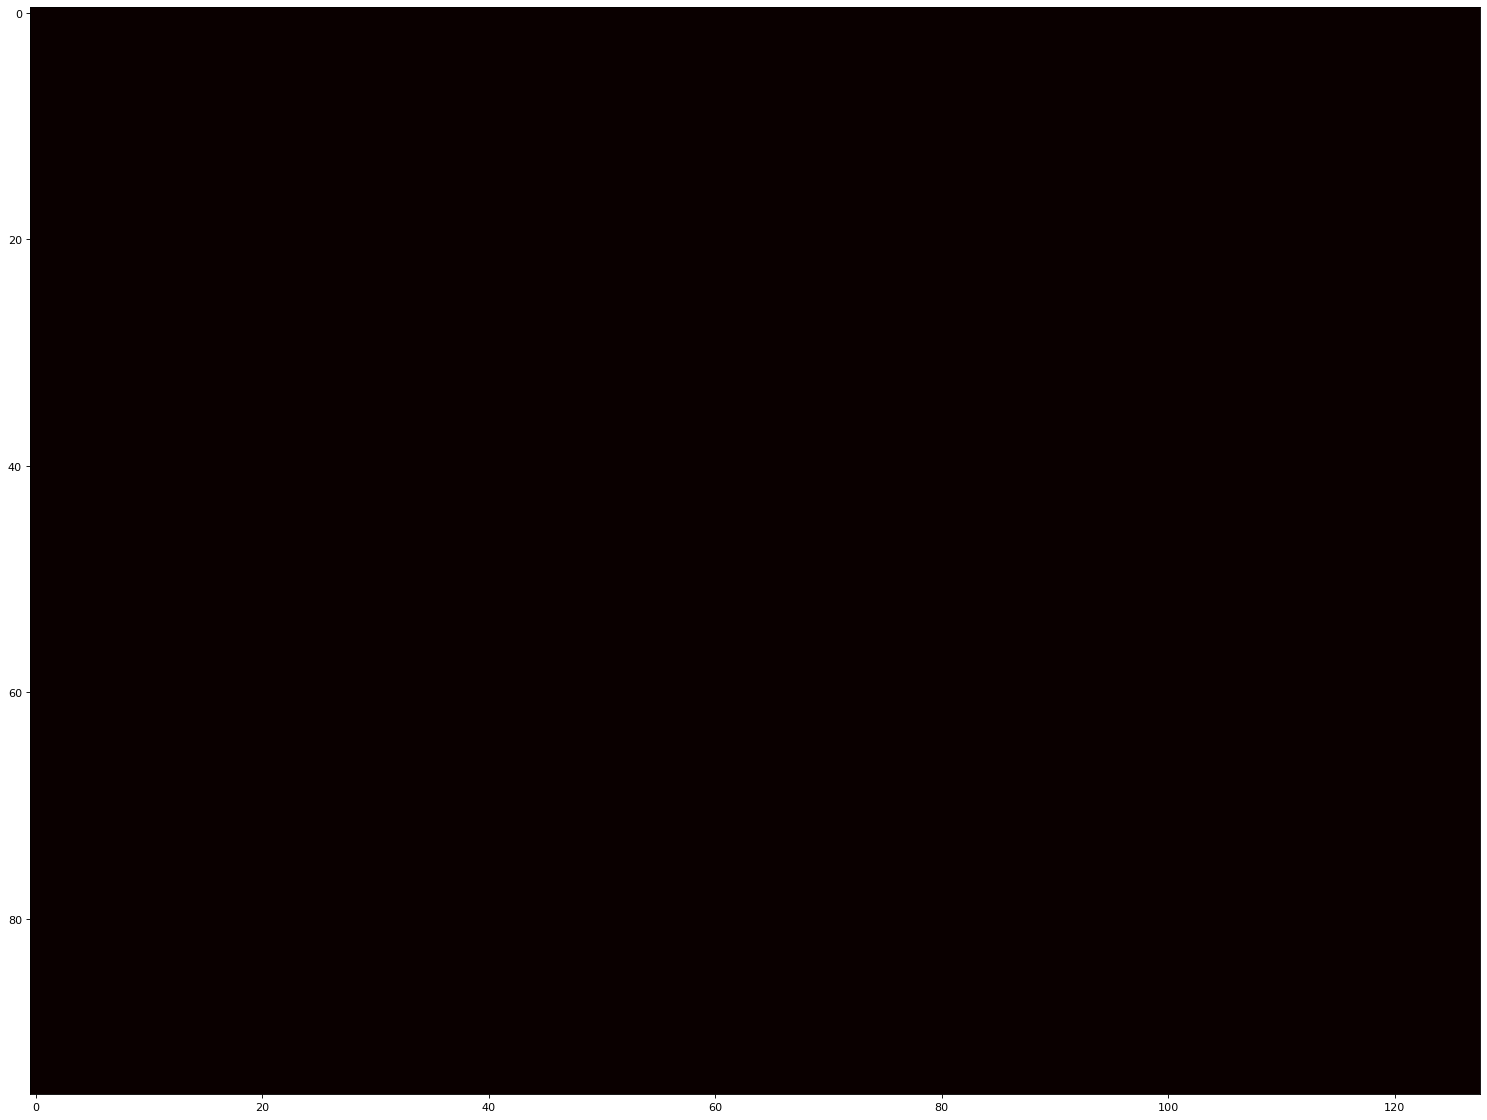

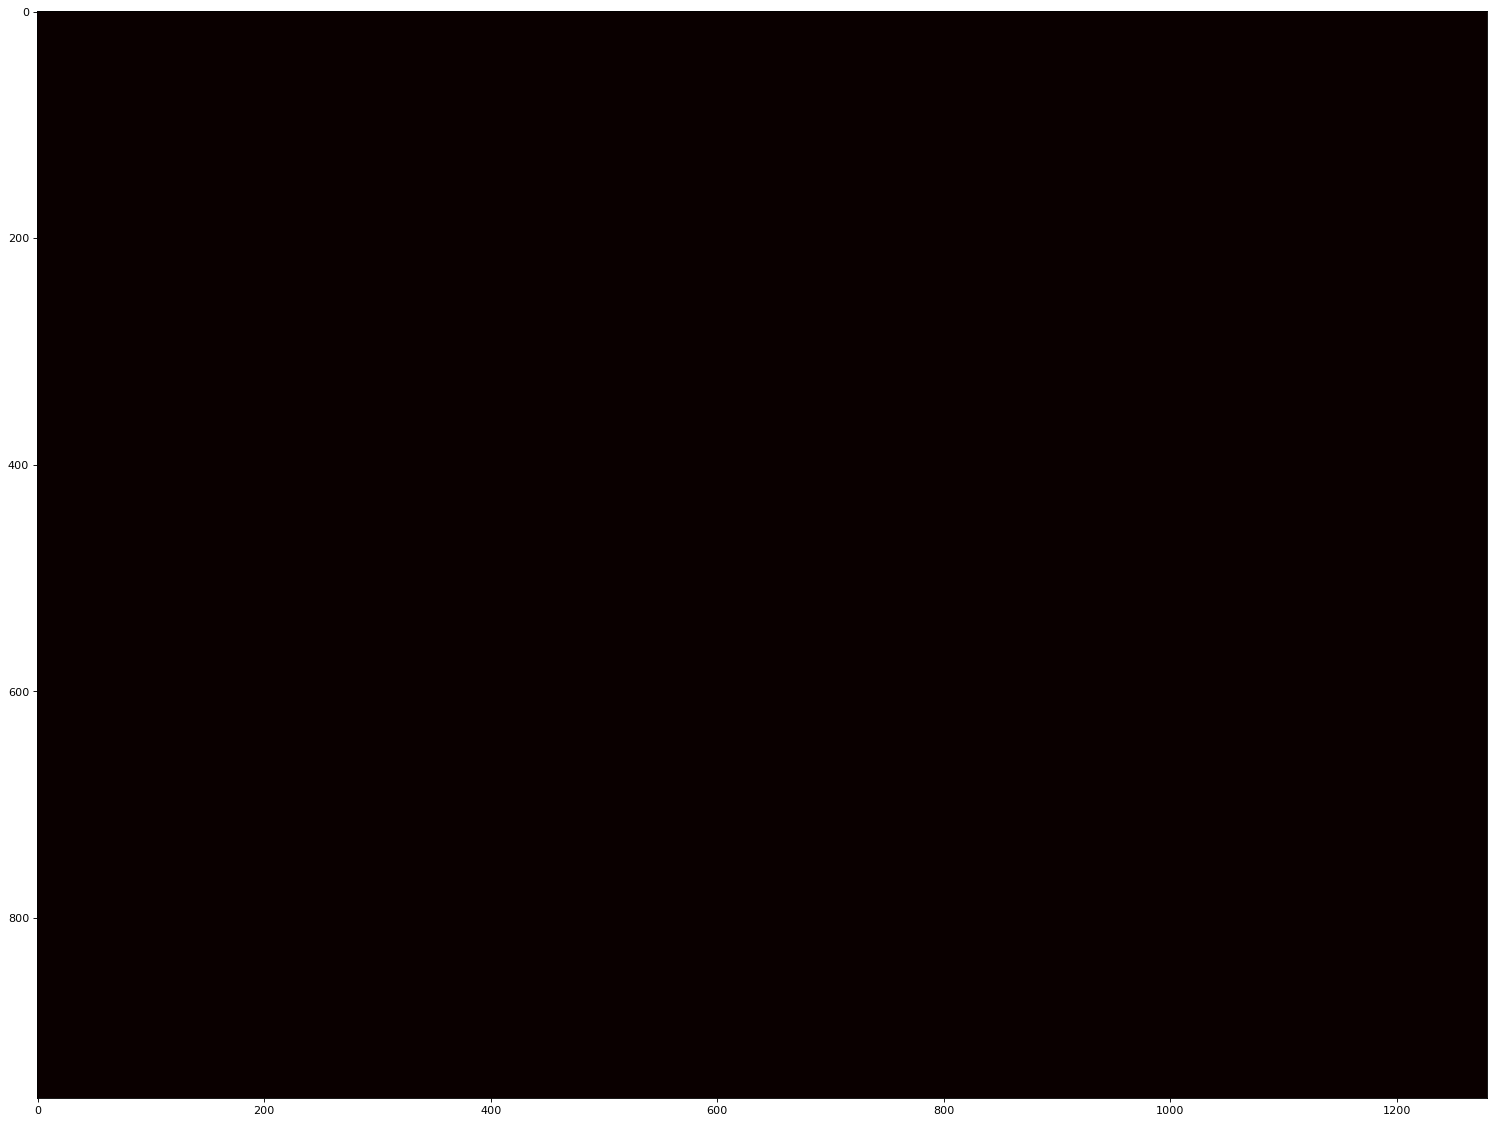

In [77]:
heatmap72p("a","a","kunal")
heatmap720p("a","a","kunal")

In [13]:
def saveimg2(Xs,Ys,w,h,img):
    ar = np.zeros((h,w),dtype=int)
    for i in range(len(Xs)):
        x,y = Xs[i],Ys[i]
        ar[y,x]+=1


    figure(figsize=(24, 18), dpi=80)
    plt.imshow(ar, cmap='hot', interpolation='nearest')
    # plt.show()
    if h==960:
        plt.savefig('X:\\Eye_tracking_Processed_Raw_videos\\heatmaps\\720p\\'+img+'.png')
    else:
        plt.savefig('X:\\Eye_tracking_Processed_Raw_videos\\heatmaps\\72pp\\'+img+'.png')
    
def heatmap2(inp_C,inp_s,img,start=0,end=80000):
    c=0
    W= int(1280)
    H=int(960)
    Xs=[]
    Ys=[]
    XX=[]
    YY=[]
    adjust = 0
    while c<50000:
        c+=1
        if c%25==0:
                adjust+=1
        if c>start and c<end:
        
            try:

                with open("X:\\Python_projects\\yolov5\\circle\\"+inp_c+"\\labels\\"+inp_c+"_"+str(c+adjust)+".txt") as f:
                    t = f.read()
                tl = t[:-1].split()
                for i in range(len(tl)):
                    tl[i]=float(tl[i])  
                xc,yc= int(tl[1]*W),int(tl[2]*H)
                yc=yc+200

                with open("X:\\Python_projects\\yolov5\\screen_2\\"+inp_s+"\\labels\\"+inp_s+"_"+str(c)+".txt") as f:
                    t = f.read()
                tl = t[:-1].split()
                for i in range(len(tl)):
                    tl[i]=float(tl[i])
                x,y= int(tl[1]*W),int(tl[2]*H)
                w,h = int(tl[3]*W),int(tl[4]*H)
                x1,y1 = int(x-w/2),int(y-h/2)

                x2,y2 = int(x+w/2),int(y+h/2)
                if x1<xc and xc<x2 and y1<yc and yc<y2:
                    Xs.append(int(((xc-x1)/(x2-x1))*128))
                    Ys.append(int(((yc-y1)/(y2-y1)*96)))
#                     XX.append(int(((xc-x1)/(x2-x1))*640))
#                     YY.append(int(((yc-y1)/(y2-y1)*480)))


            except:
                pass
            
    saveimg2(Xs,Ys,128,96,img)
#     saveimg(XX,YY,640,480,img)

    

1248 20664


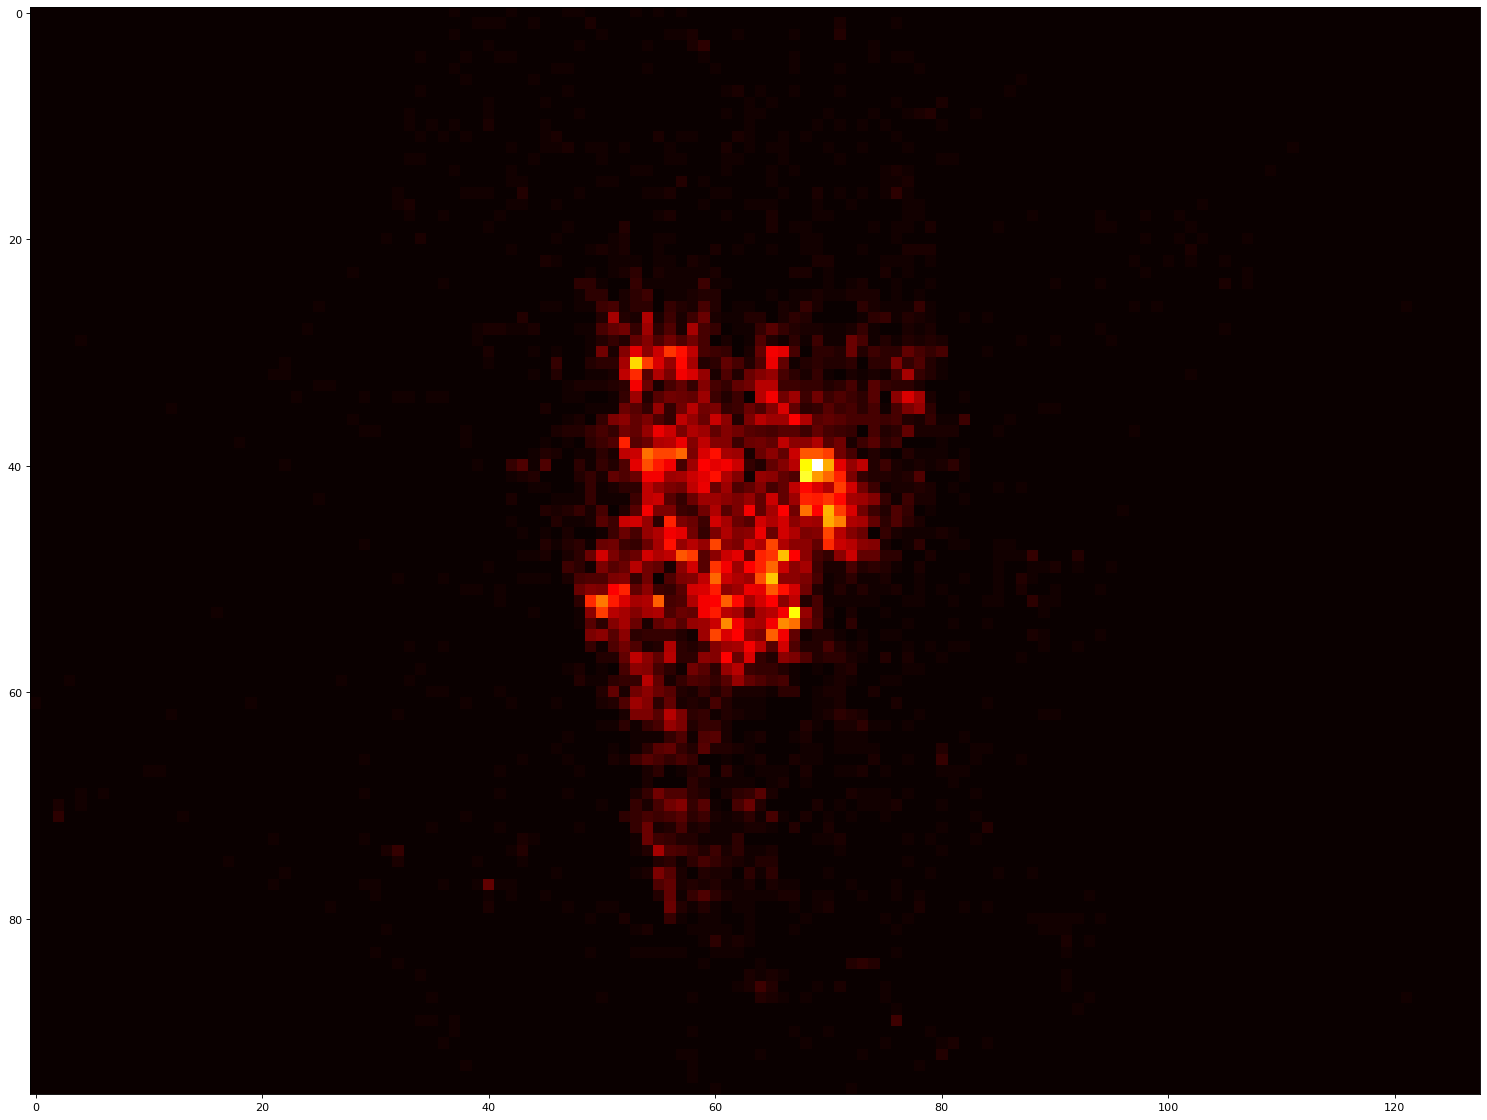

In [14]:
inp_c = "snehal"
inp_s = "snehal"
start = 52
end = 1421
start = (int(start/100)*60*24)+(int(start%100)*24)
end = (int(end/100)*60*24)+(int(end%100)*24)
print(start,end)
heatmap2(inp_c,inp_s,inp_s,start,end)
dlib_distance(inp_c,inp_c,inp_s,start,end)

96 18792


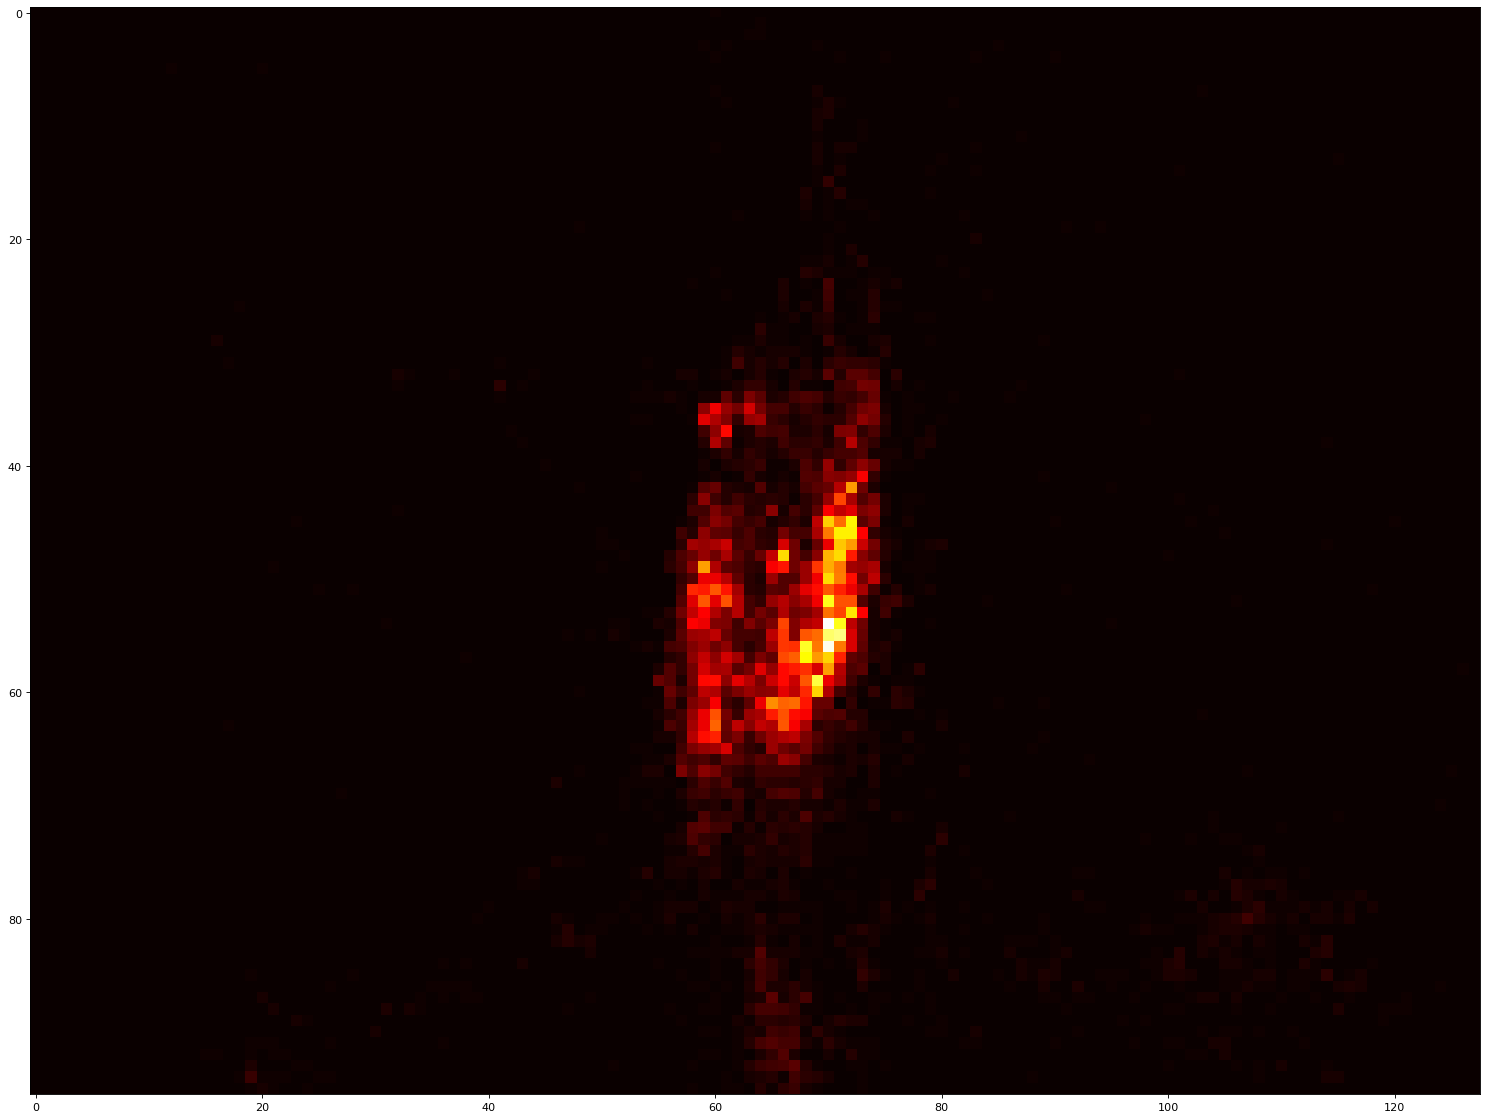

In [15]:
inp_c = "Alwin"
inp_s = "alwin"
start = 4
end = 1303
start = (int(start/100)*60*24)+(int(start%100)*24)
end = (int(end/100)*60*24)+(int(end%100)*24)
print(start,end)
heatmap(inp_c,inp_s,inp_s,start,end)
dlib_distance(inp_c,inp_c,inp_s,start,end)

1056 19656


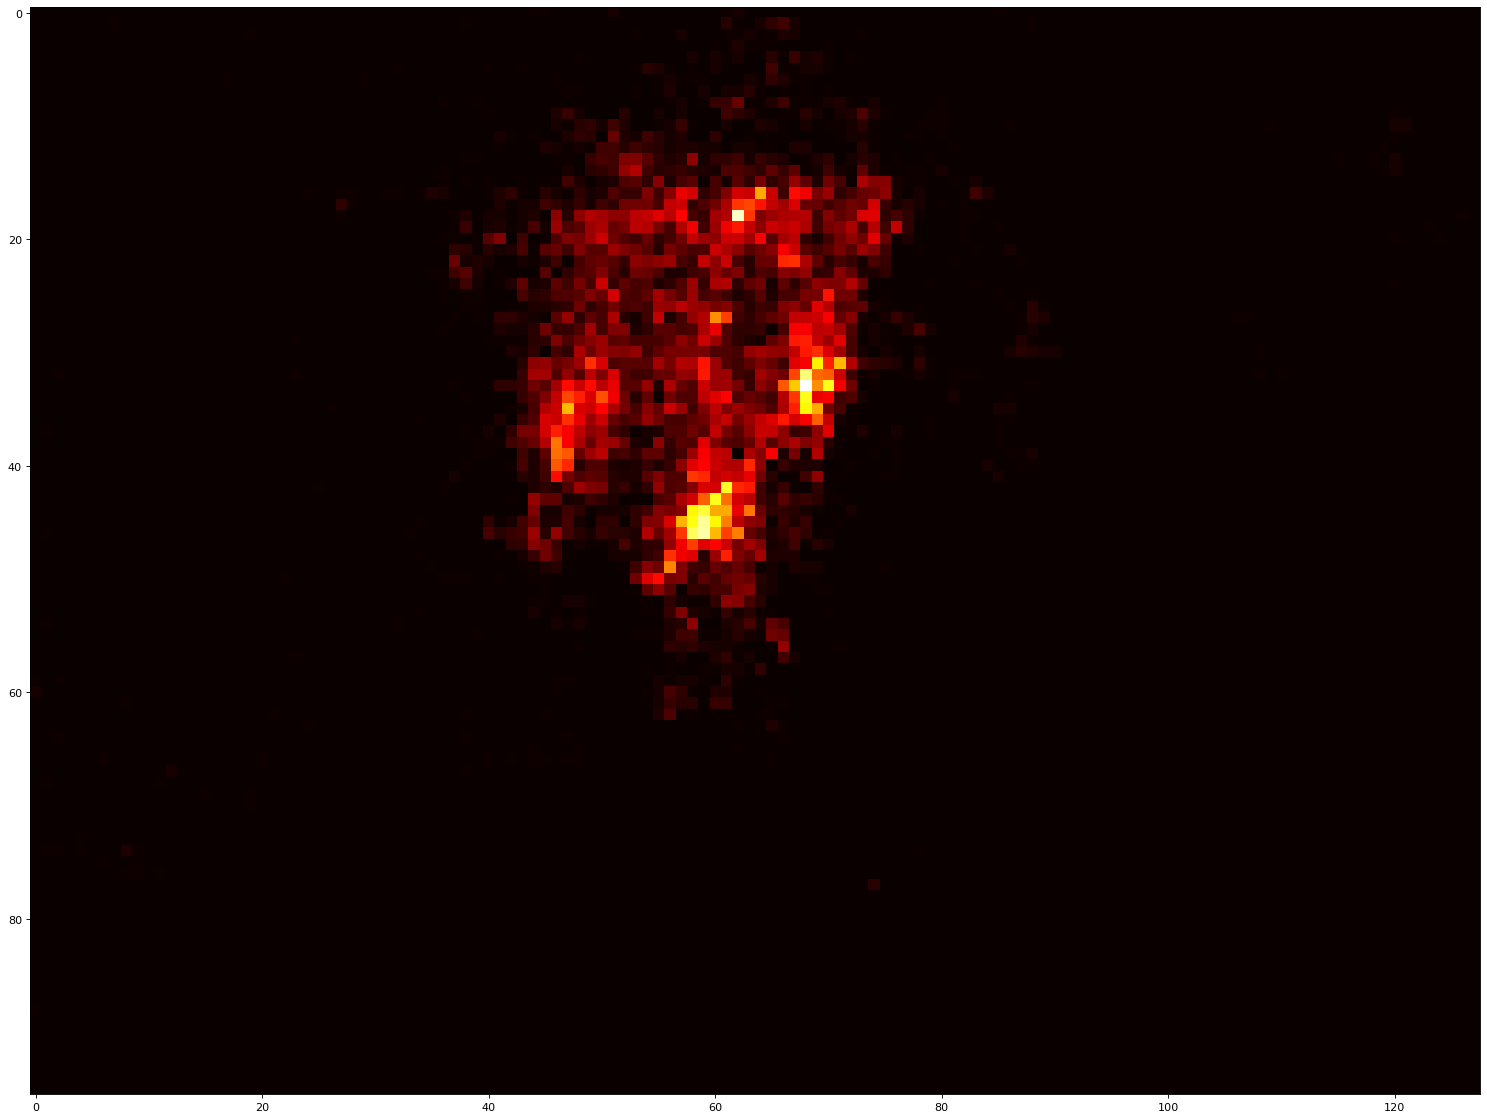

In [16]:
inp_c = "ayushi"
inp_s = "ayushi"
start = 44
end = 1339
start = (int(start/100)*60*24)+(int(start%100)*24)
end = (int(end/100)*60*24)+(int(end%100)*24)
print(start,end)
heatmap(inp_c,inp_s,inp_s,start,end)
dlib_distance(inp_c,inp_c,inp_s,start,end)

552 19128


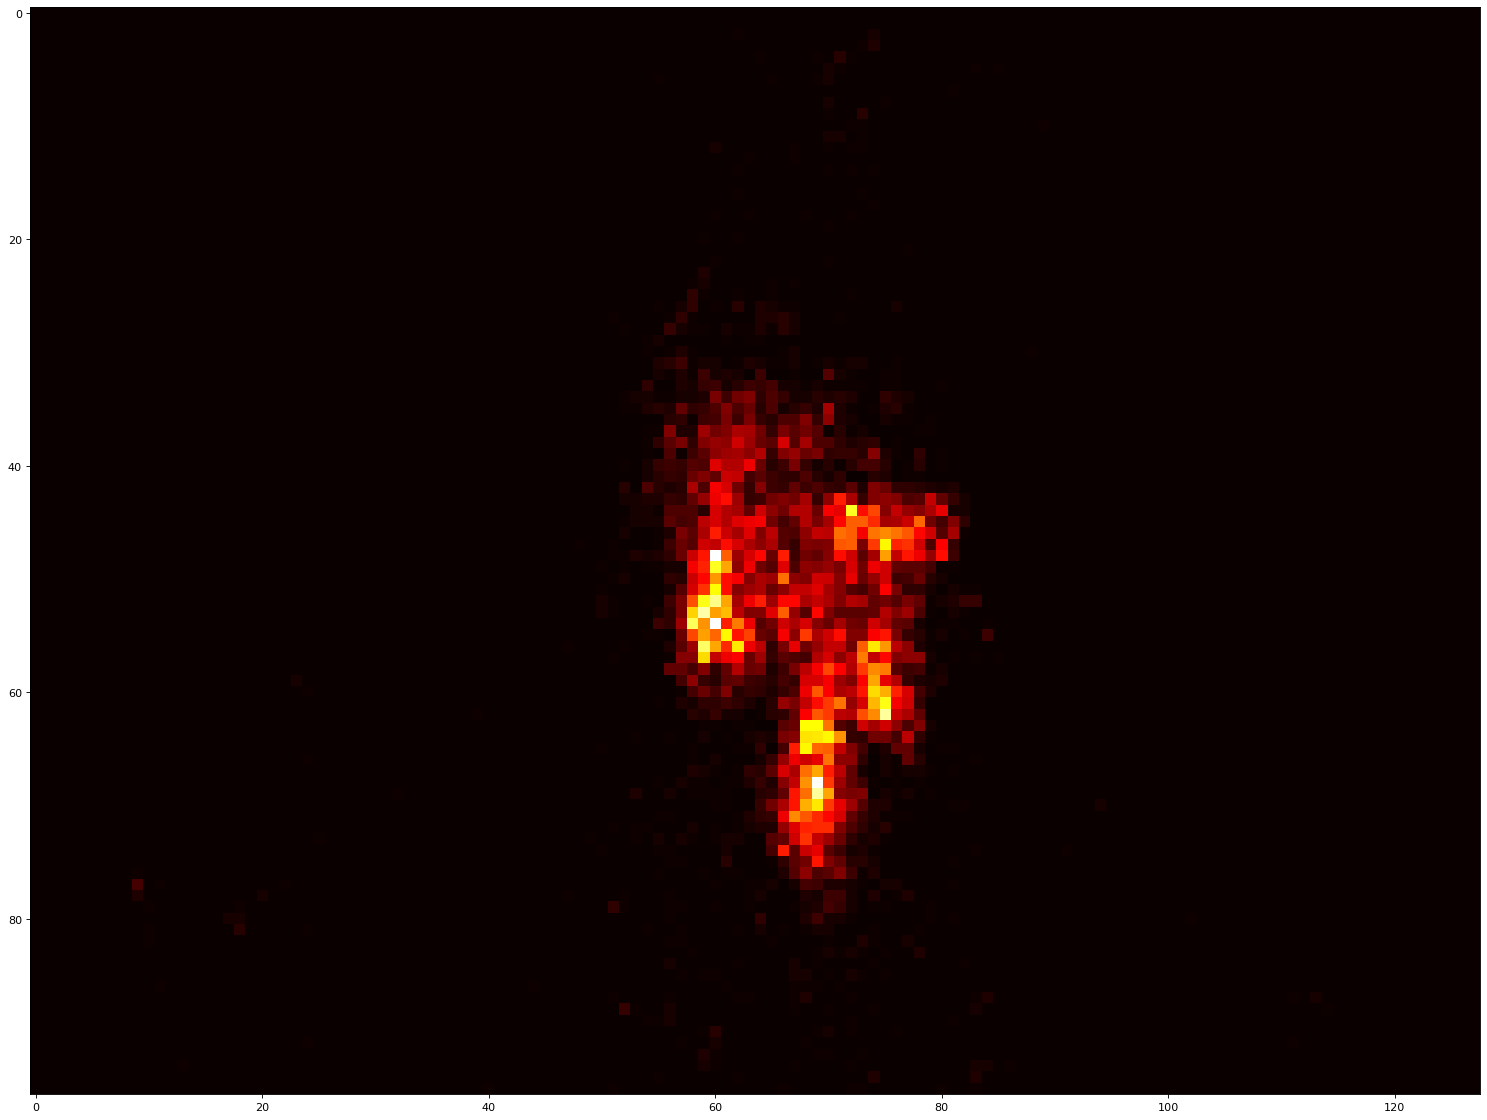

In [17]:
inp_c = "keerti"
inp_s = "keerti"
start = 23
end = 1317
start = (int(start/100)*60*24)+(int(start%100)*24)
end = (int(end/100)*60*24)+(int(end%100)*24)
print(start,end)
heatmap(inp_c,inp_s,inp_s,start,end)

dlib_distance(inp_c,inp_c,inp_s,start,end)

336 18816


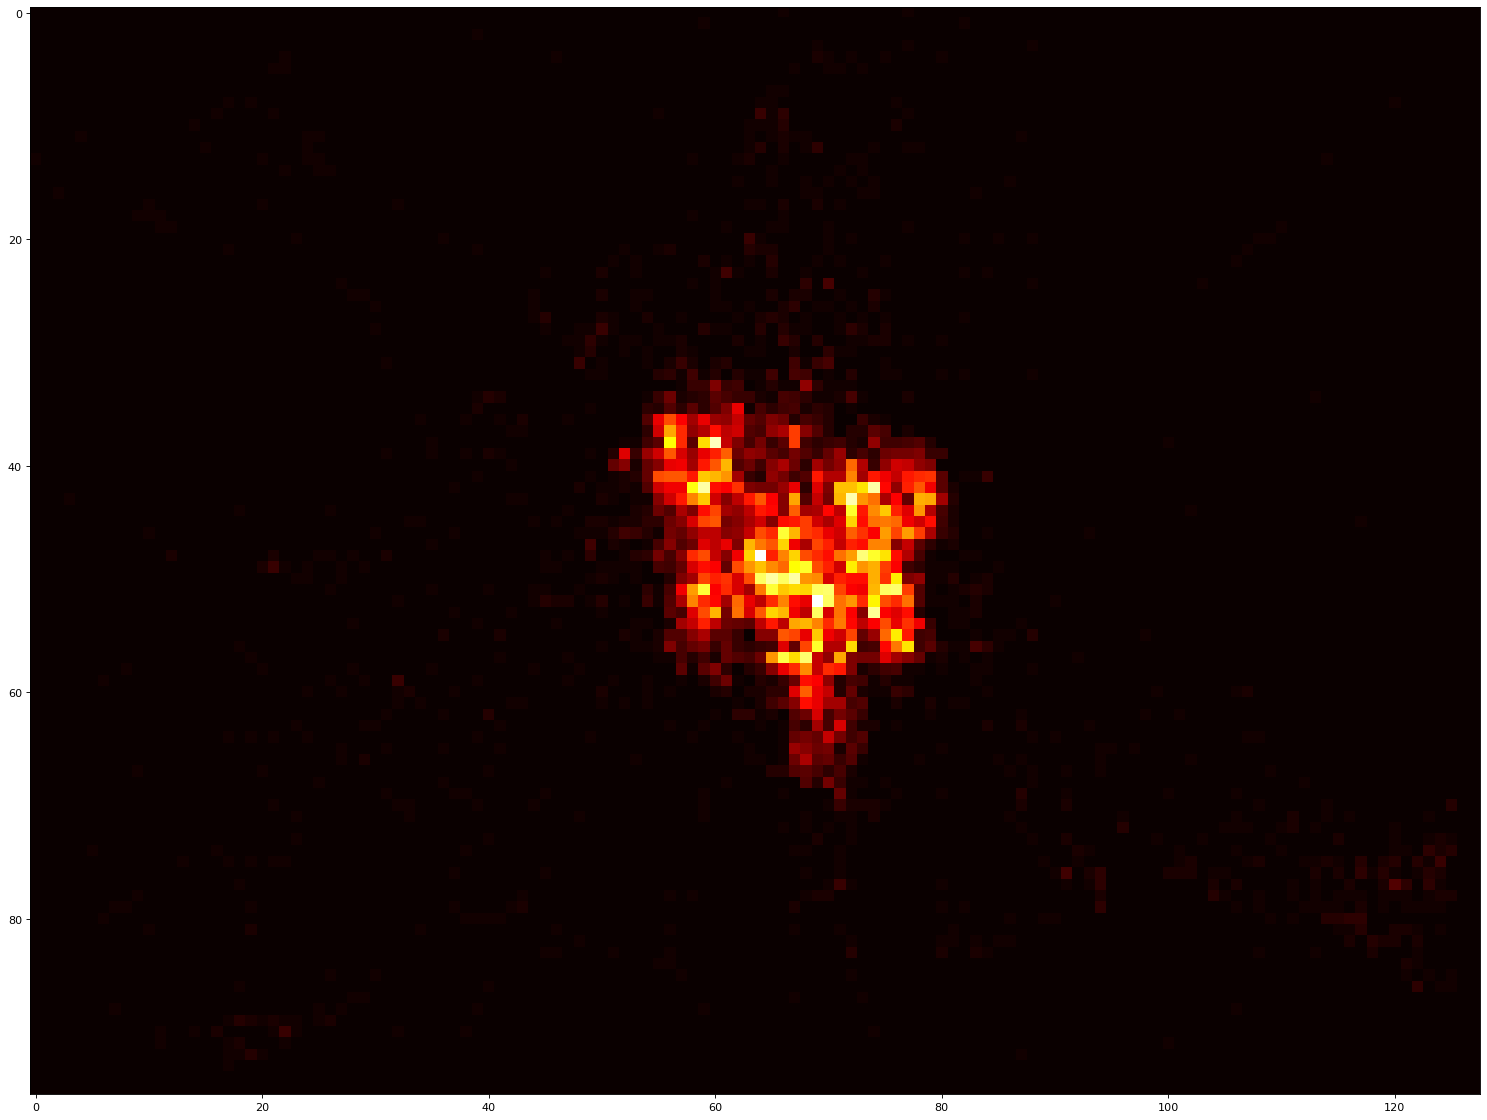

In [18]:
inp_c = "Lokesh"
inp_s = "lokesh"
start = 14
end = 1304
start = (int(start/100)*60*24)+(int(start%100)*24)
end = (int(end/100)*60*24)+(int(end%100)*24)
print(start,end)
heatmap(inp_c,inp_s,inp_s,start,end)
dlib_distance(inp_c,inp_c,inp_s,start,end)

4800 23136


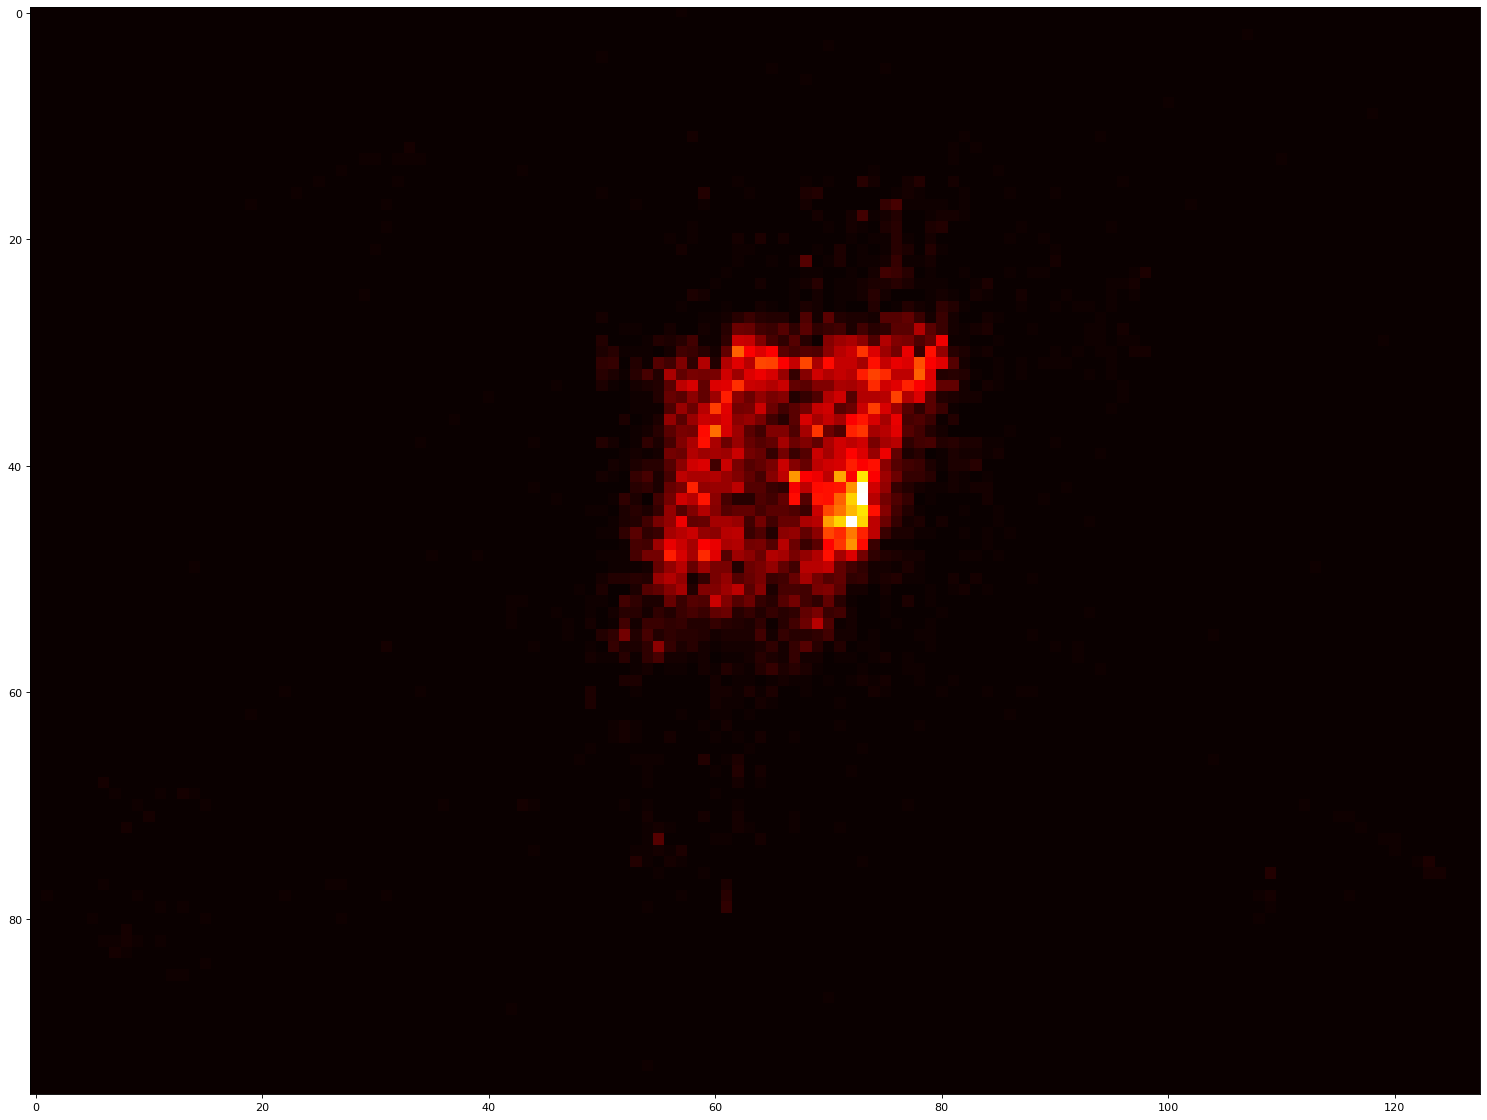

In [20]:
inp_c = "Rhutujit"
inp_s = "rhutjit"
start = 320
end = 1604
start = (int(start/100)*60*24)+(int(start%100)*24)
end = (int(end/100)*60*24)+(int(end%100)*24)
print(start,end)
heatmap(inp_c,inp_s,inp_s,start,end)
dlib_distance(inp_c,inp_c,inp_s,start,end)

360 18936


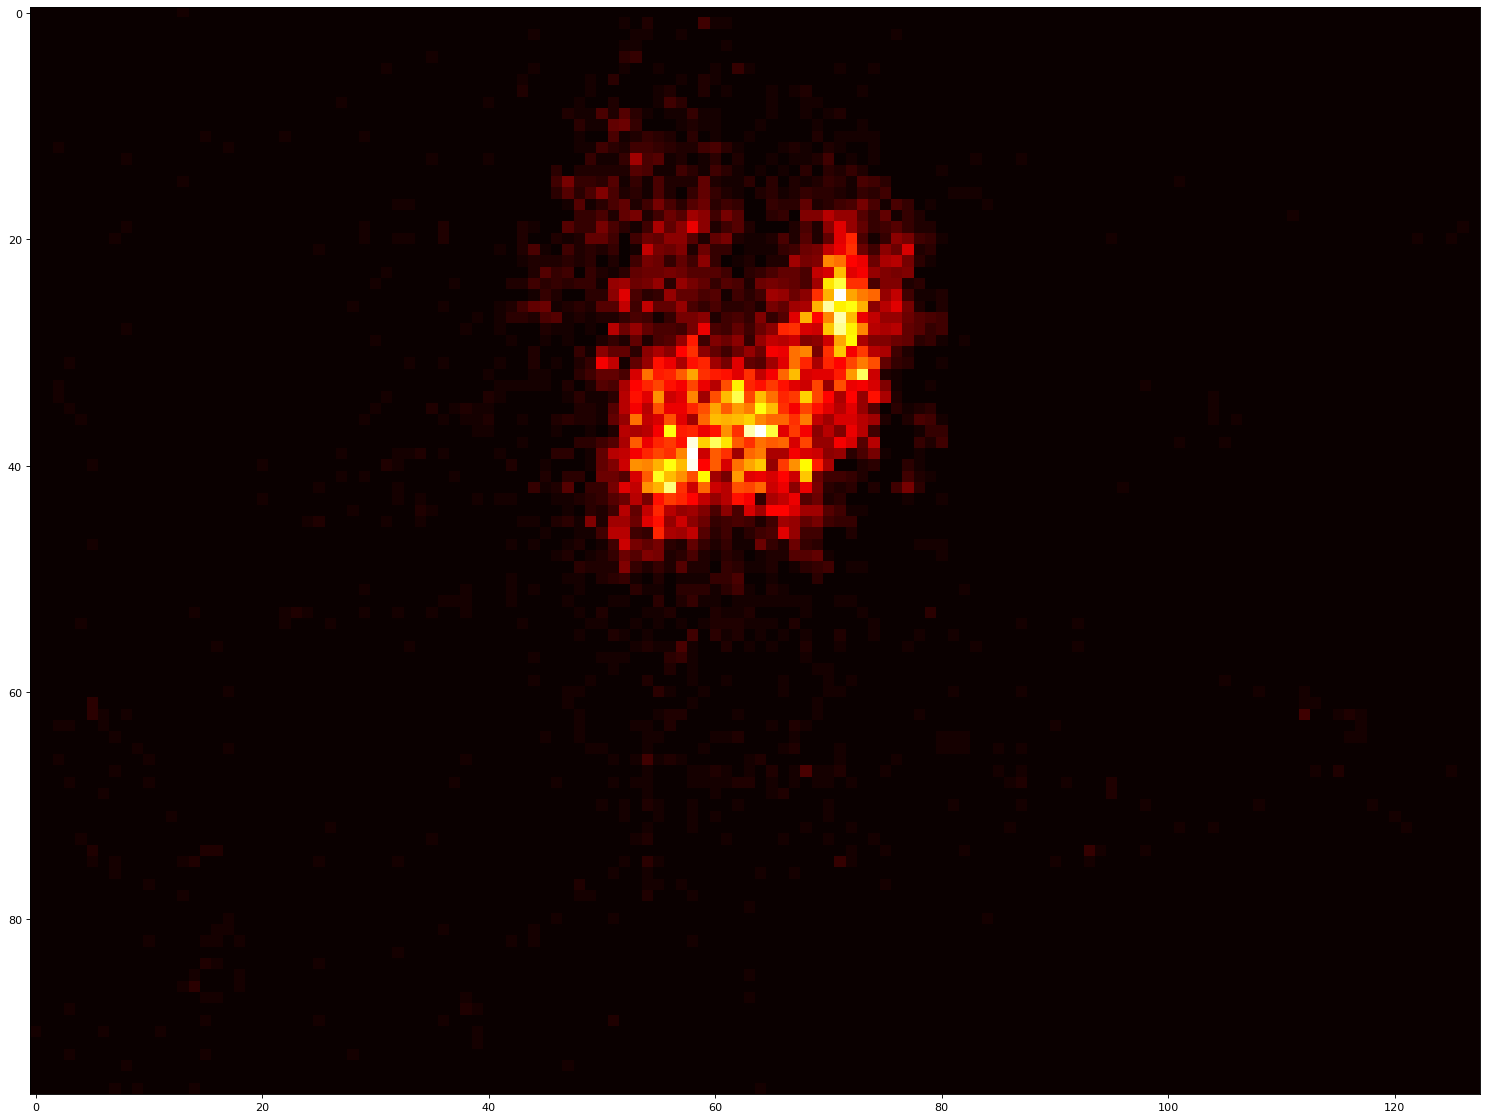

In [21]:
inp_c = "sabha"
inp_s = "sabahath"
start = 15
end = 1309
start = (int(start/100)*60*24)+(int(start%100)*24)
end = (int(end/100)*60*24)+(int(end%100)*24)
print(start,end)
heatmap(inp_c,inp_s,inp_s,start,end)
dlib_distance(inp_c,inp_c,inp_s,start,end)

144 18864


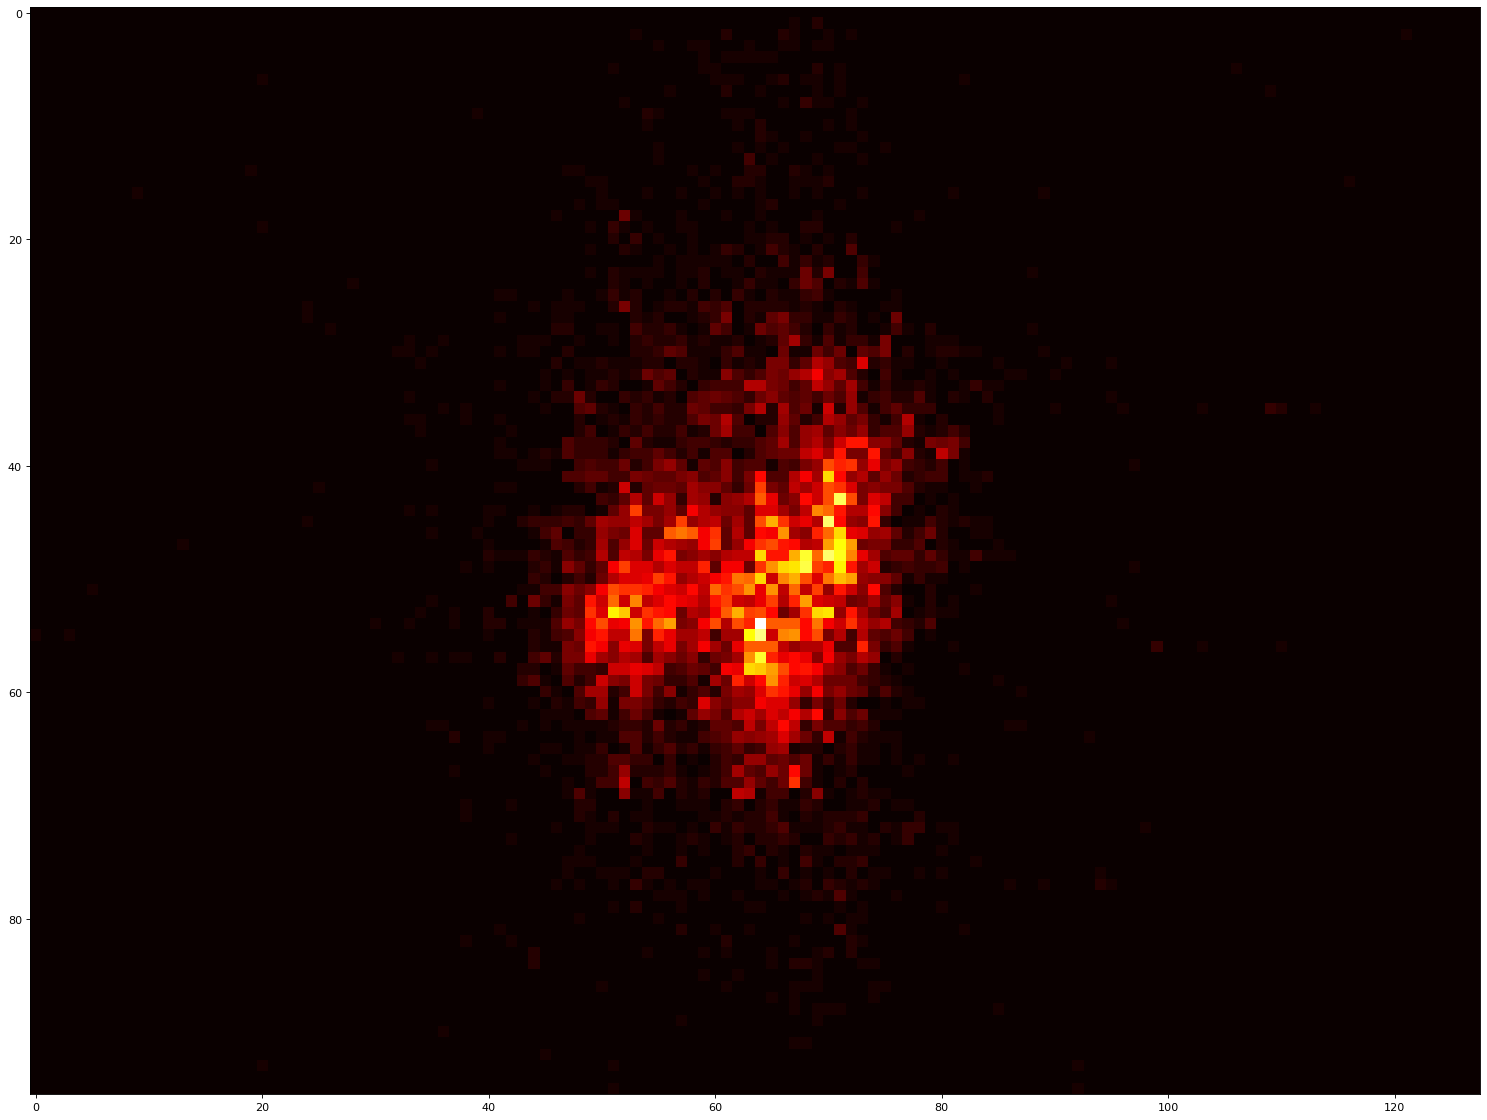

In [23]:
inp_c = "Siddu"
inp_s = "siddu"
start = 6
end = 1306
start = (int(start/100)*60*24)+(int(start%100)*24)
end = (int(end/100)*60*24)+(int(end%100)*24)
print(start,end)
heatmap(inp_c,inp_s,inp_s,start,end)
dlib_distance(inp_c,inp_c,inp_s,start,end)

120 18840


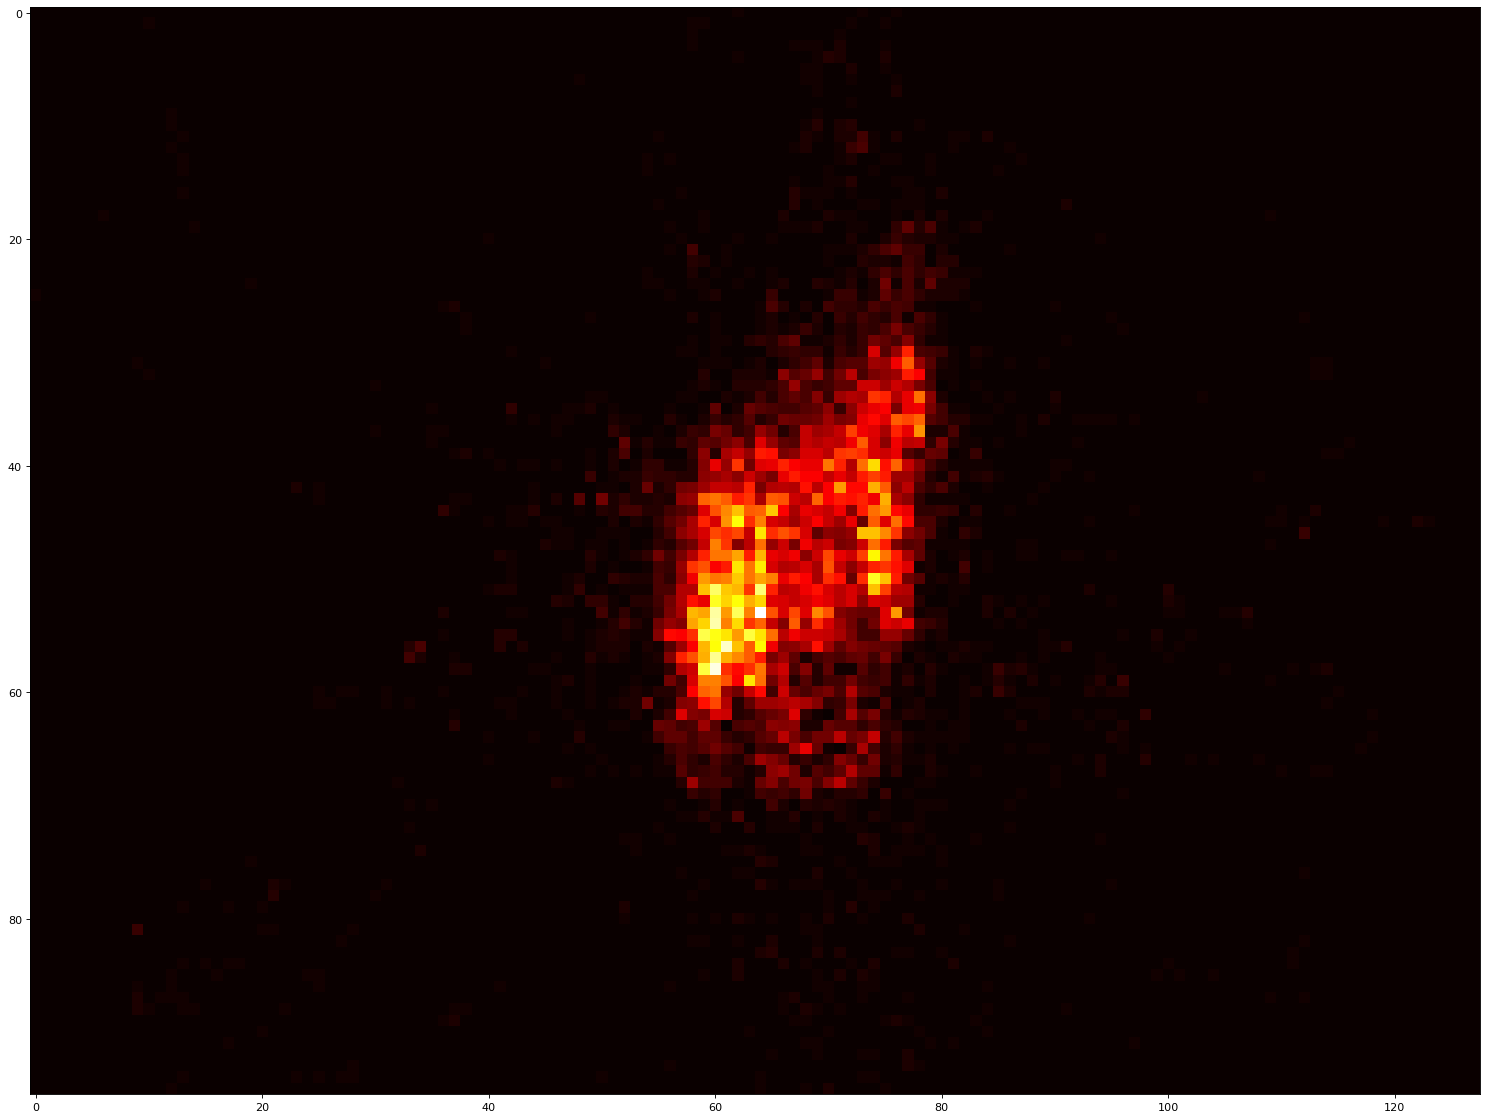

In [24]:
inp_c = "soumya"
inp_s = "soumya"
start = 5
end = 1305
start = (int(start/100)*60*24)+(int(start%100)*24)
end = (int(end/100)*60*24)+(int(end%100)*24)
print(start,end)
heatmap(inp_c,inp_s,inp_s,start,end)
dlib_distance(inp_c,inp_c,inp_s,start,end)

168 18744


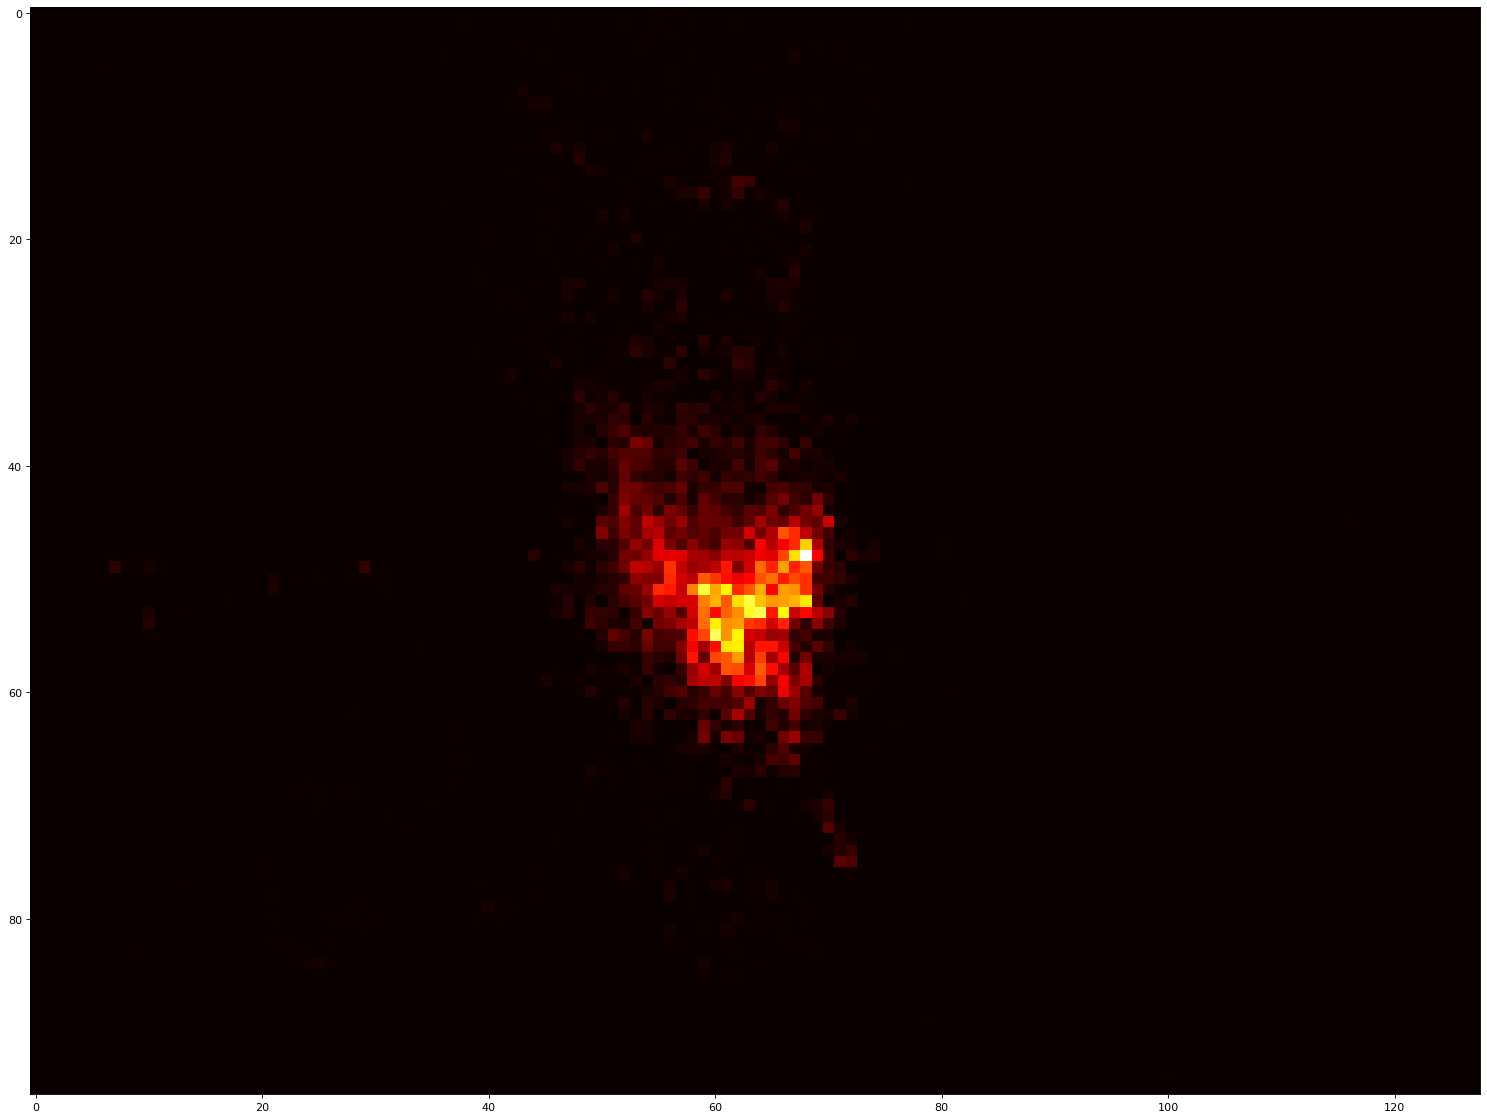

In [25]:
inp_c = "Steve"
inp_s = "steve"
start = 7
end = 1301
start = (int(start/100)*60*24)+(int(start%100)*24)
end = (int(end/100)*60*24)+(int(end%100)*24)
print(start,end)
heatmap(inp_c,inp_s,inp_s,start,end)
dlib_distance(inp_c,inp_c,inp_s,start,end)

240 18960


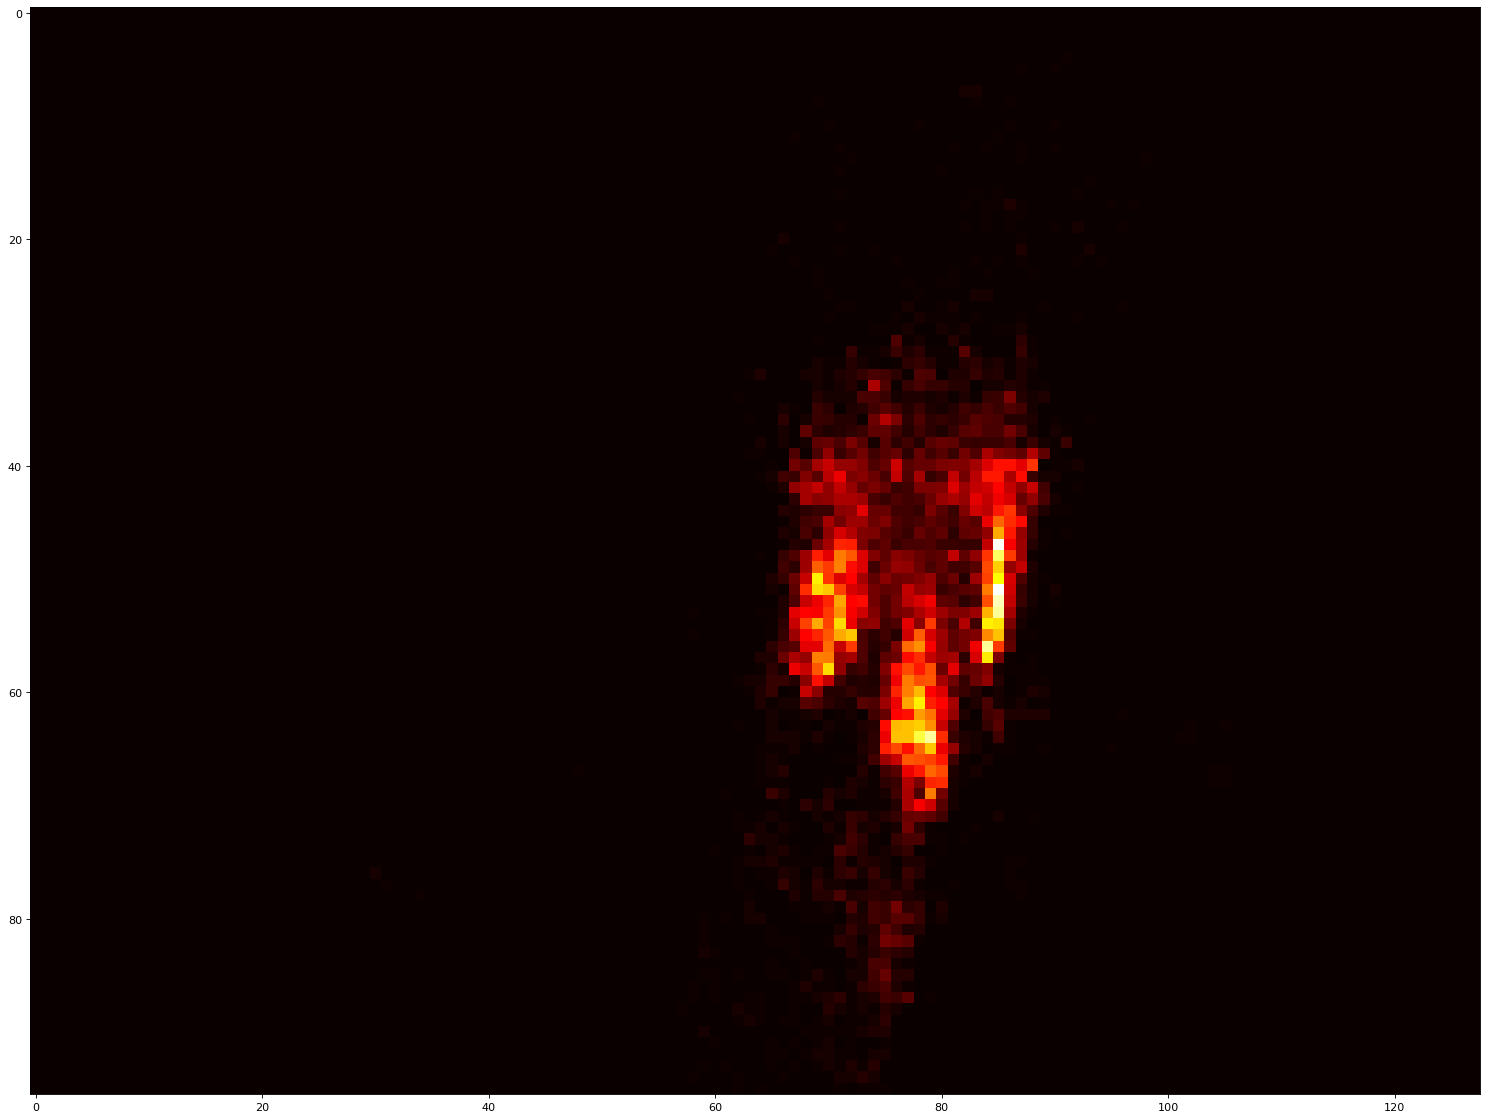

In [26]:
inp_c = "swetha"
inp_s = "swetha"
start = 10
end = 1310
start = (int(start/100)*60*24)+(int(start%100)*24)
end = (int(end/100)*60*24)+(int(end%100)*24)
print(start,end)
heatmap(inp_c,inp_s,inp_s,start,end)
dlib_distance(inp_c,inp_c,inp_s,start,end)

1824 20568


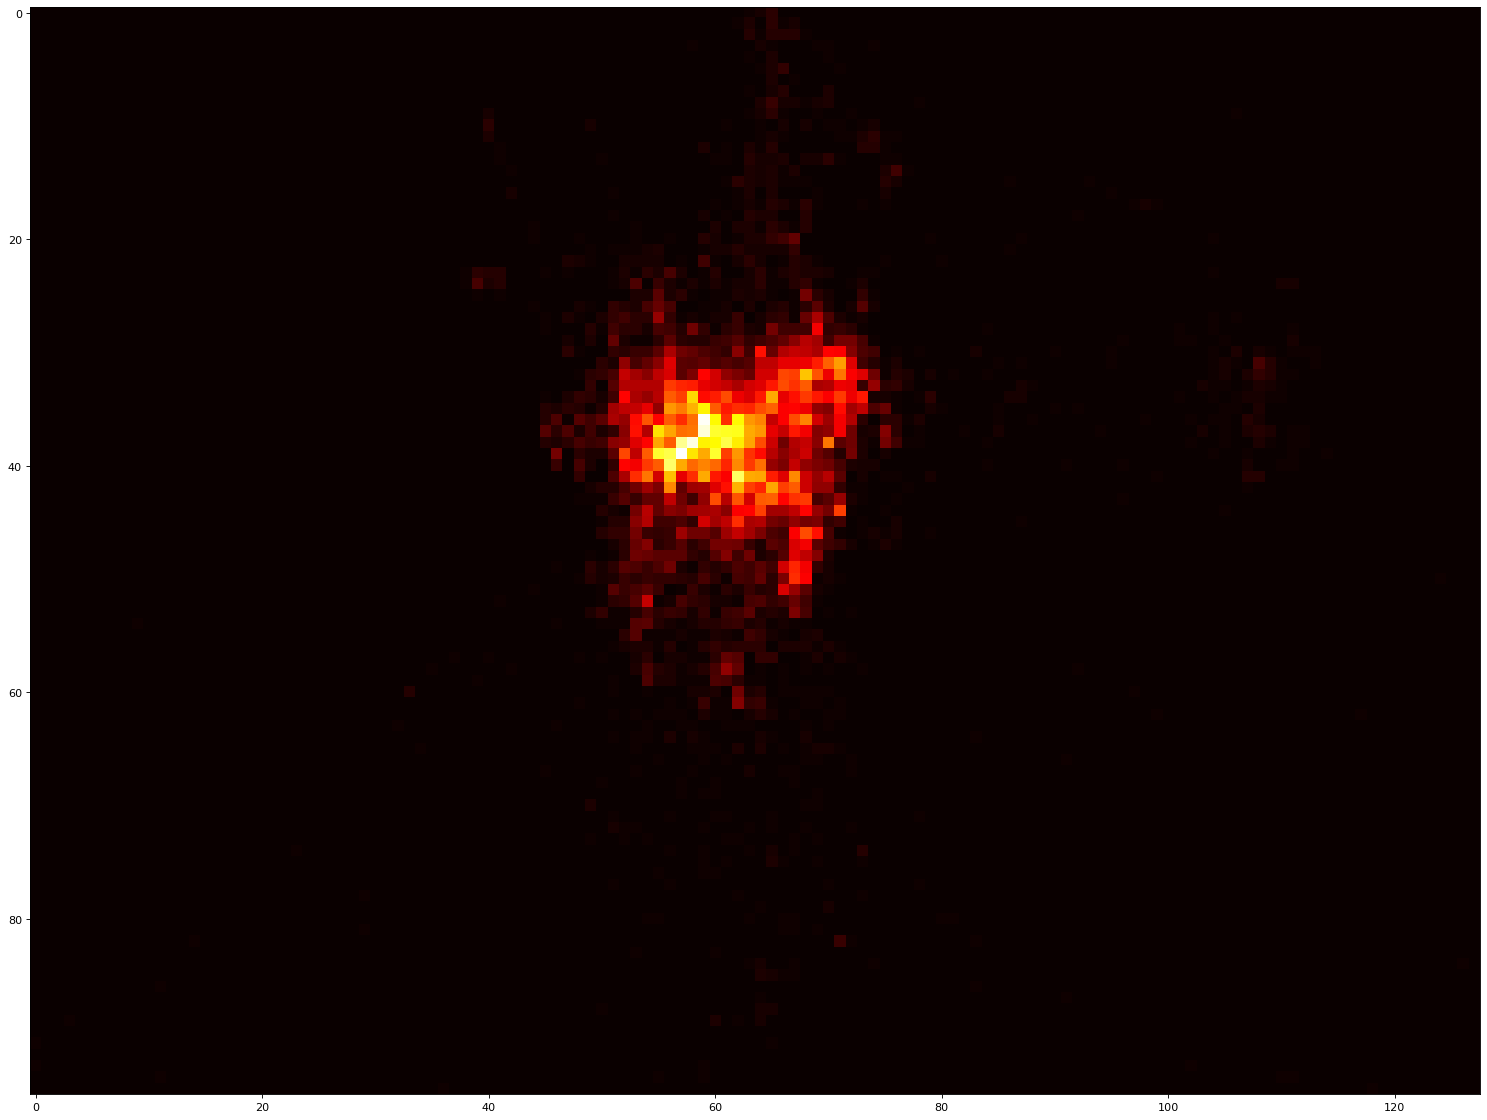

In [27]:
inp_c = "Yash"
inp_s = "yash"
start = 116
end = 1417
start = (int(start/100)*60*24)+(int(start%100)*24)
end = (int(end/100)*60*24)+(int(end%100)*24)
print(start,end)
heatmap(inp_c,inp_s,inp_s,start,end)
dlib_distance(inp_c,inp_c,inp_s,start,end)

360 19080


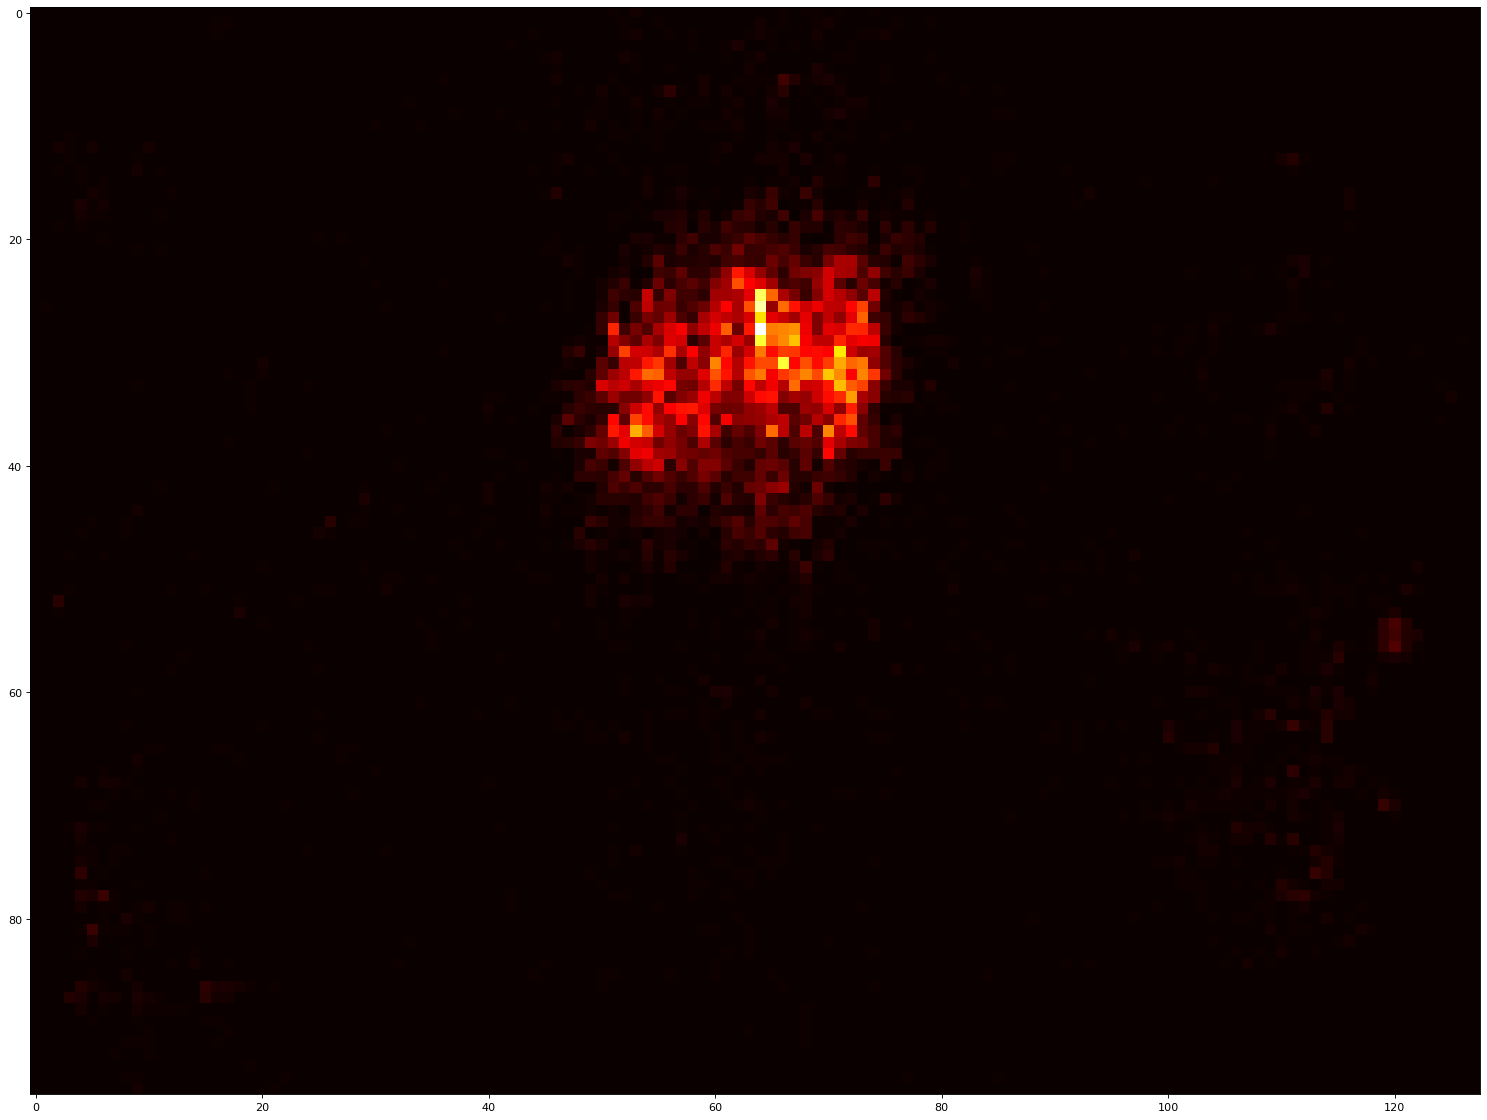

In [28]:
inp_c = "yogi"
inp_s = "yogi"
start = 15
end = 1315
start = (int(start/100)*60*24)+(int(start%100)*24)
end = (int(end/100)*60*24)+(int(end%100)*24)
print(start,end)
heatmap(inp_c,inp_s,inp_s,start,end)
dlib_distance(inp_c,inp_c,inp_s,start,end)

936 19656


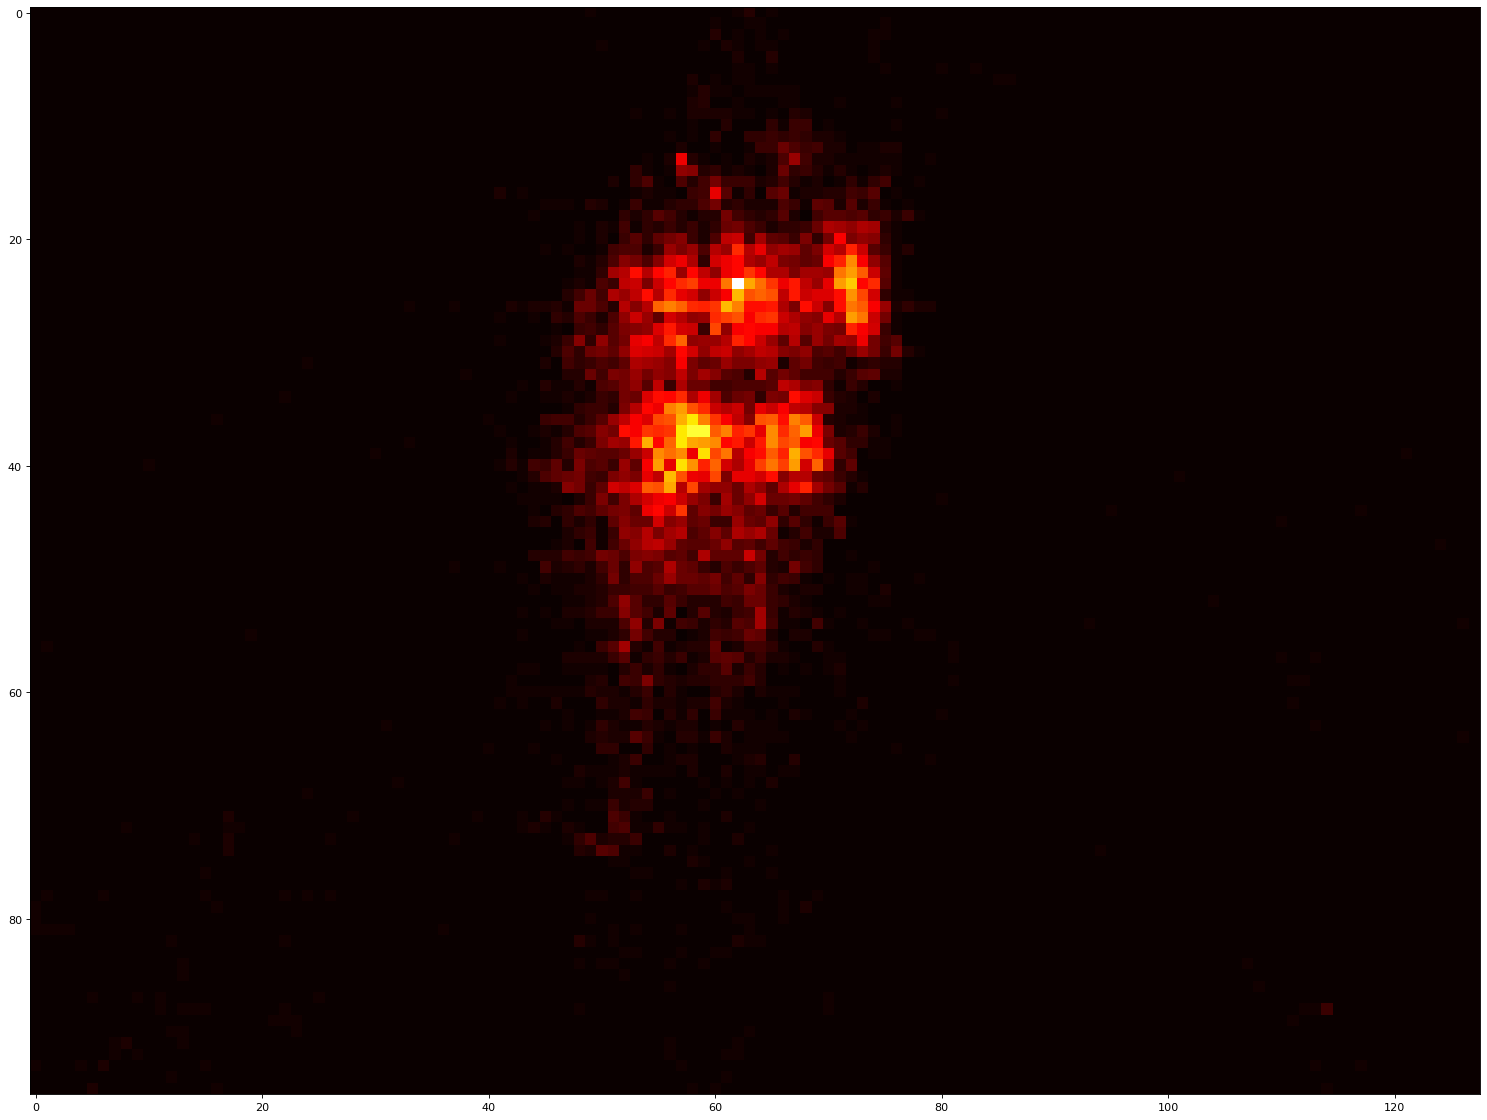

In [29]:
inp_c = "yuki"
inp_s = "yuki"
start = 39
end = 1339
start = (int(start/100)*60*24)+(int(start%100)*24)
end = (int(end/100)*60*24)+(int(end%100)*24)
print(start,end)
heatmap(inp_c,inp_s,inp_s,start,end)
dlib_distance(inp_c,inp_c,inp_s,start,end)

2328 20640


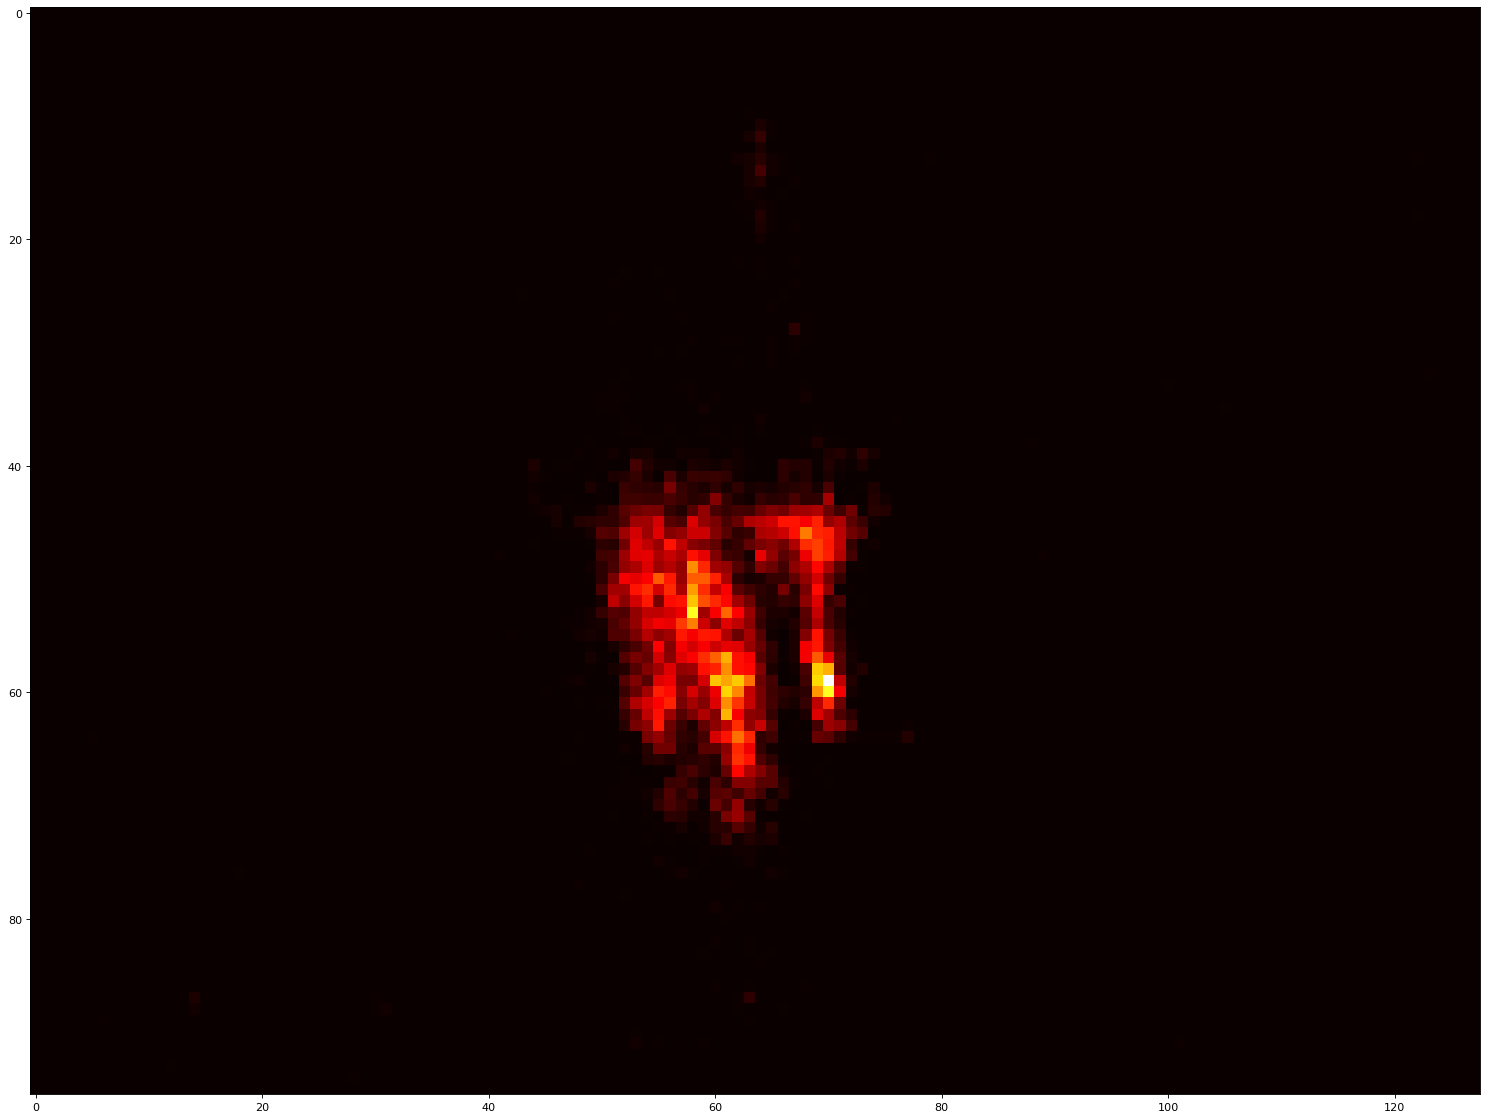

In [30]:
inp_c = "Zahra"
inp_s = "zahra"
start = 137
end = 1420
start = (int(start/100)*60*24)+(int(start%100)*24)
end = (int(end/100)*60*24)+(int(end%100)*24)
print(start,end)
heatmap(inp_c,inp_s,inp_s,start,end)
dlib_distance(inp_c,inp_c,inp_s,start,end)

360 19080


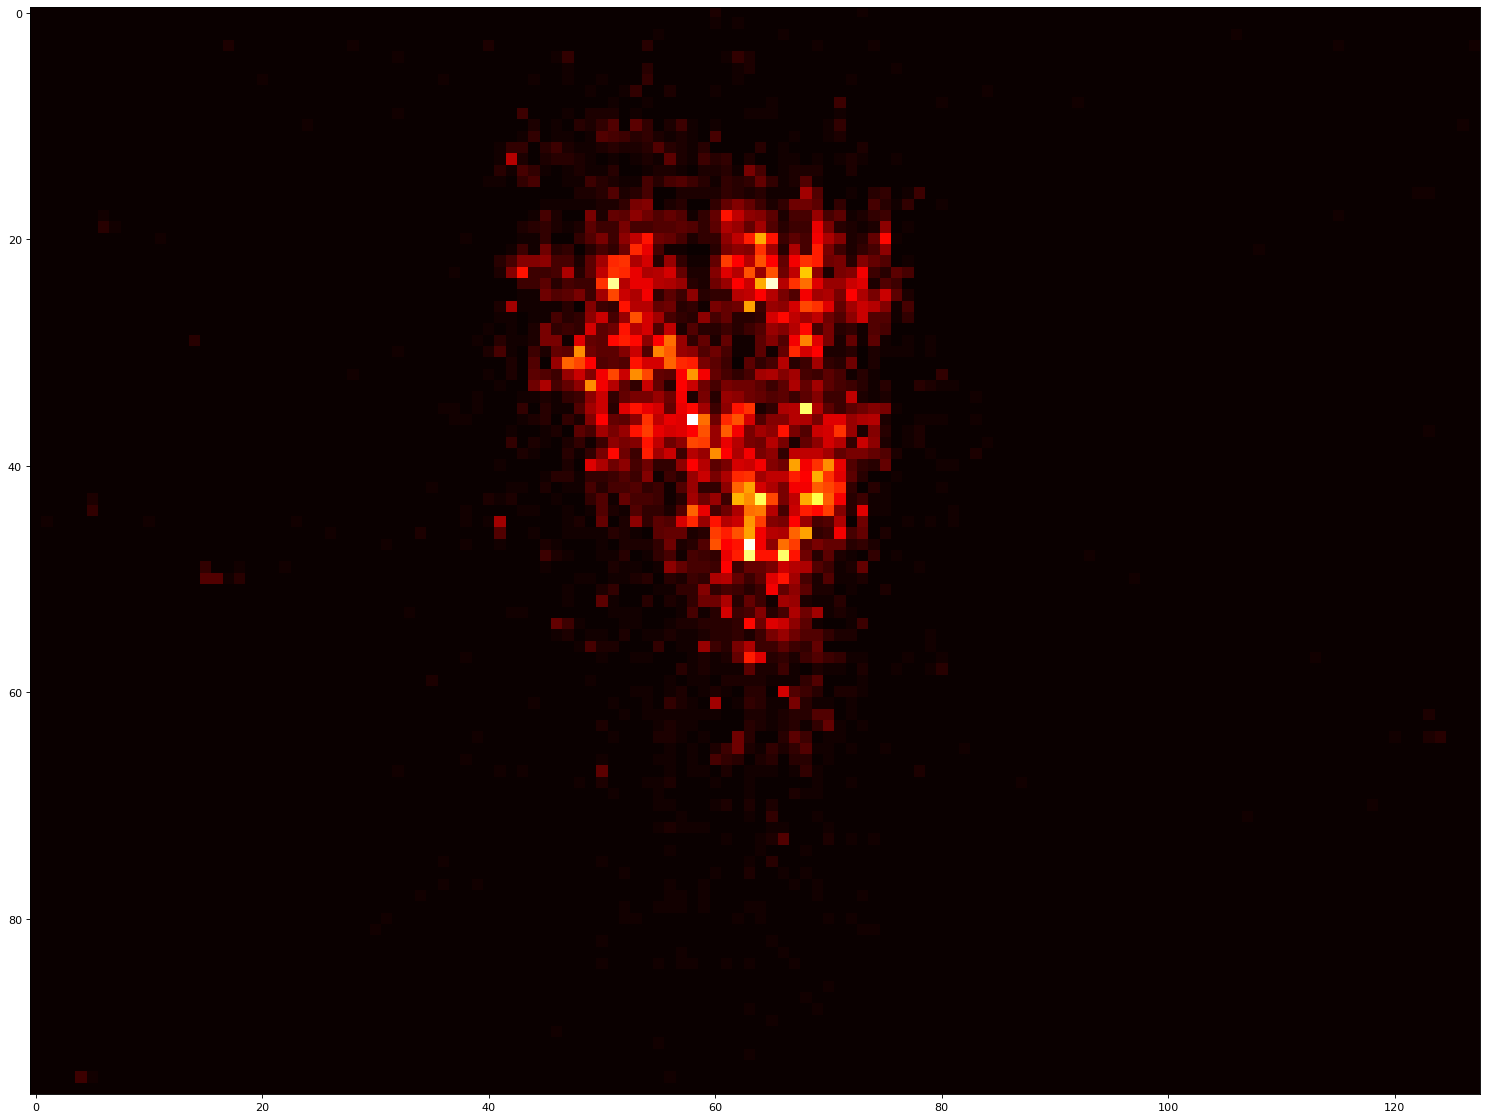

In [31]:
inp_c = "rishi"
inp_s = "rishi"
start = 15
end = 1315
start = (int(start/100)*60*24)+(int(start%100)*24)
end = (int(end/100)*60*24)+(int(end%100)*24)
print(start,end)
heatmap(inp_c,inp_s,inp_s,start,end)
dlib_distance(inp_c,inp_c,inp_s,start,end)

1056 19560


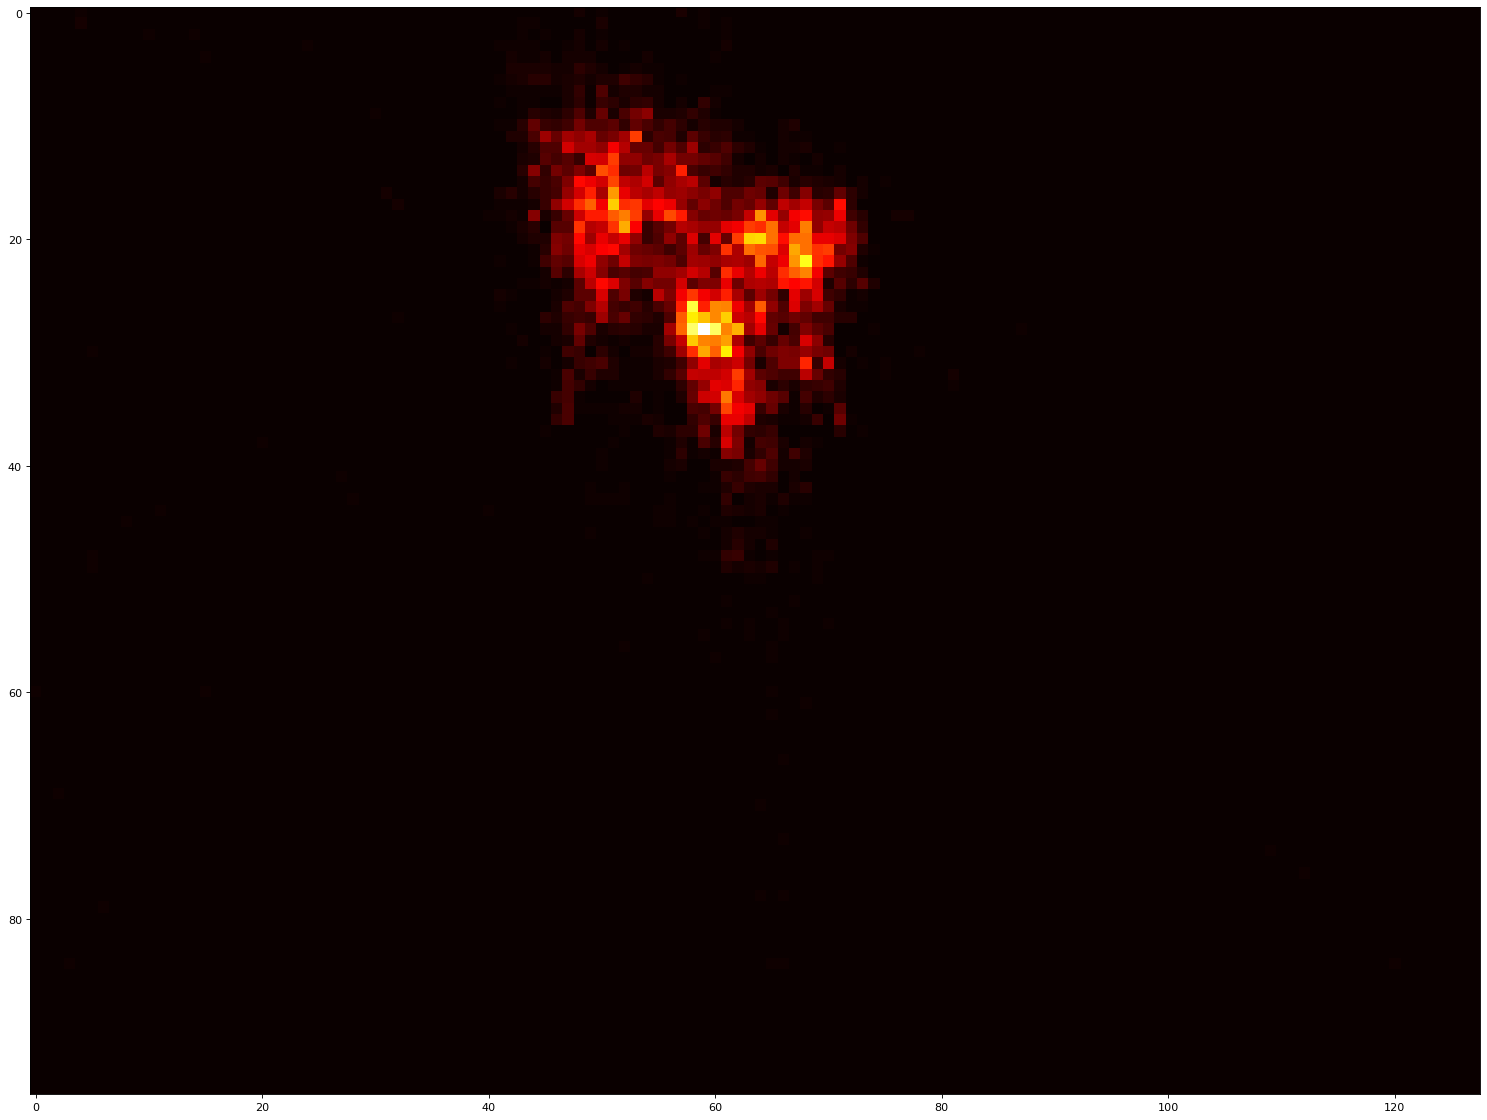

In [32]:
inp_c = "pritish"
inp_s = "pritish"
start = 44
end = 1335
start = (int(start/100)*60*24)+(int(start%100)*24)
end = (int(end/100)*60*24)+(int(end%100)*24)
print(start,end)
heatmap(inp_c,inp_s,inp_s,start,end)
dlib_distance(inp_c,inp_c,inp_s,start,end)

912 18960


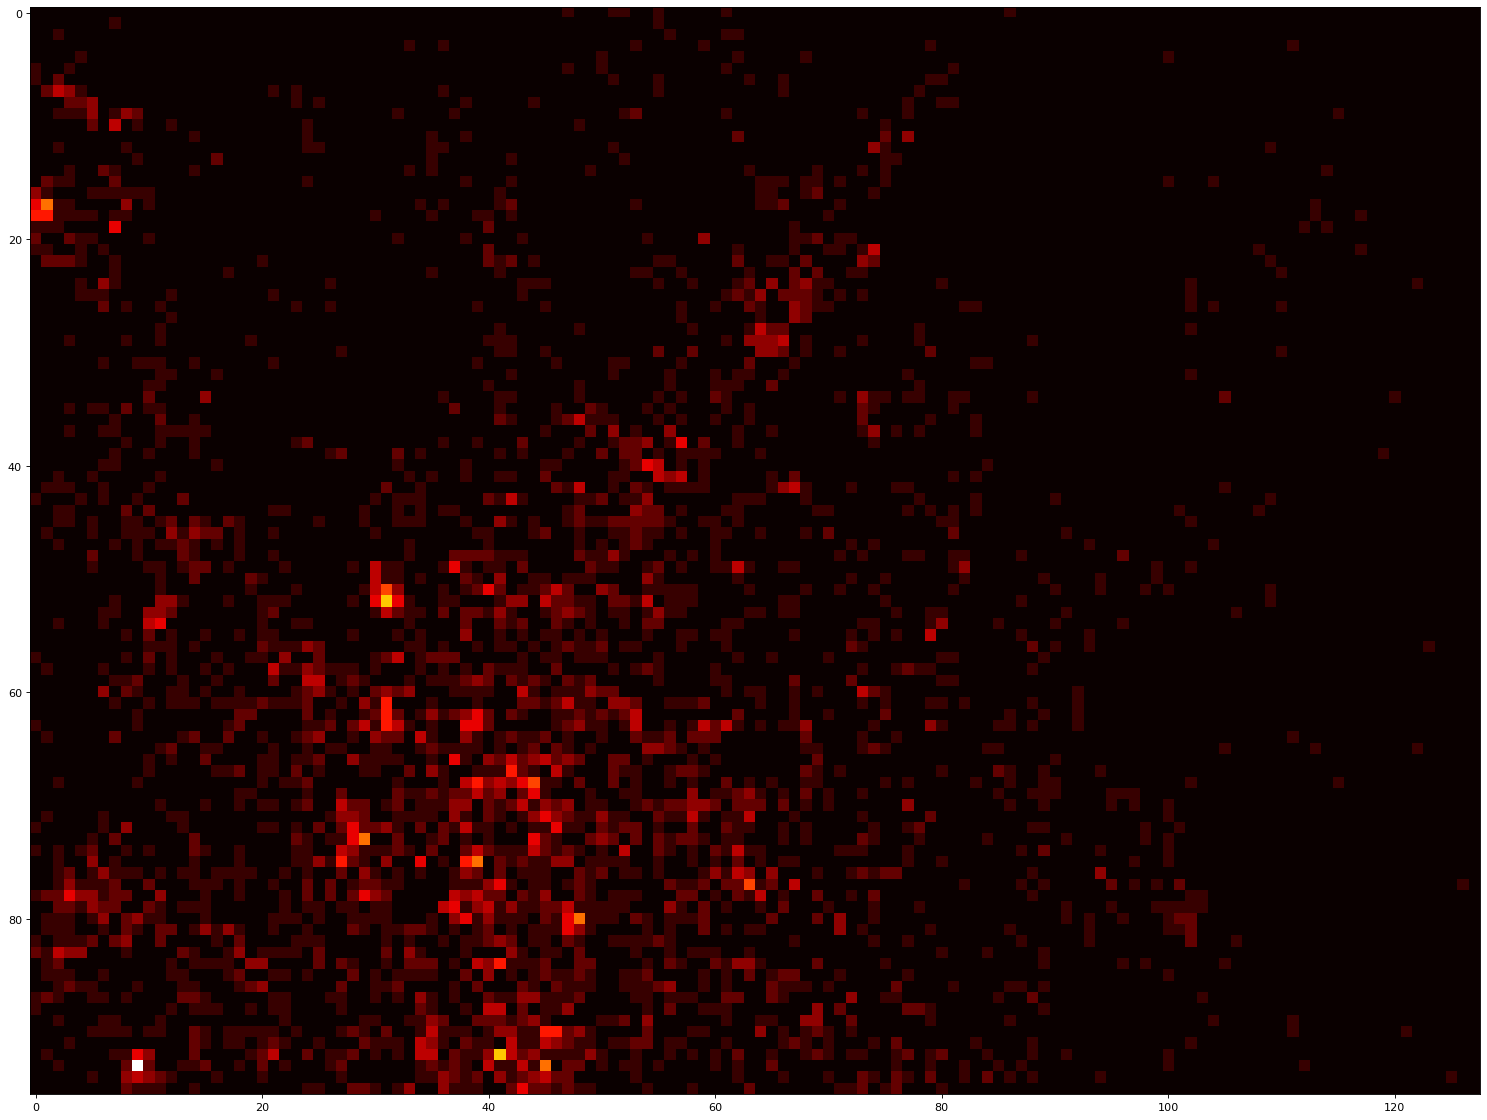

In [73]:
inp_c = "pranav"
inp_s = "pranav"
start = 38
end = 1310
start = (int(start//100)*60*24)+(int(start%100)*24)
end = (int(end//100)*60*24)+(int(end%100)*24)
print(start,end)
heatmaps(inp_c,inp_c,inp_s,inp_s,"pranav",start,end)
# dlib_distance(inp_c,inp_c,inp_s,start,end)

1272 20640


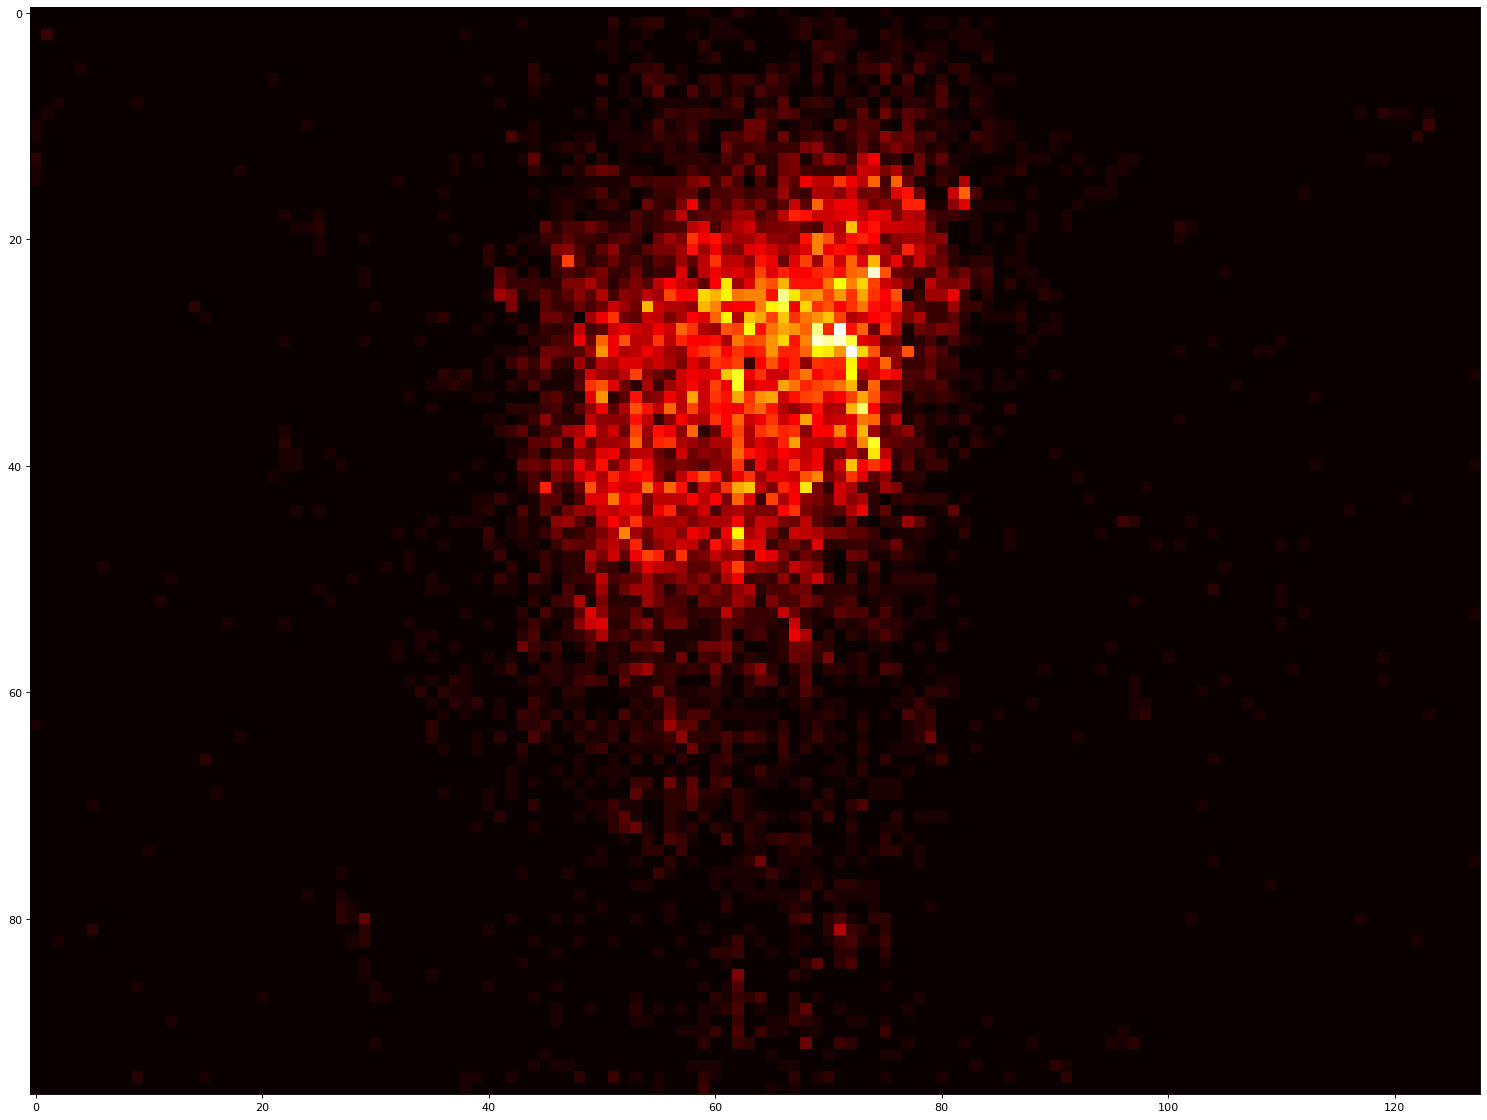

In [41]:
#offset by 150

inp_c = "Pranali"
inp_s = "pranali"
start = 53
end = 1420
start = (int(start//100)*60*24)+(int(start%100)*24)
end = (int(end//100)*60*24)+(int(end%100)*24)
print(start,end)
heatmap2(inp_c,inp_s,"pranali",start,end)
dlib_distance(inp_c,inp_c,inp_s,start,end)

In [11]:
def saveimg(Xs,Ys,w,h,img):
    ar = np.zeros((h,w),dtype=int)
    for i in range(len(Xs)):
        x,y = Xs[i],Ys[i]
        ar[y,x]+=1


    figure(figsize=(24, 18), dpi=80)
    plt.imshow(ar, cmap='hot', interpolation='nearest')
    # plt.show()
    if h==960:
        plt.savefig('X:\\Eye_tracking_Processed_Raw_videos\\heatmaps\\720p\\'+img+'.png')
    else:
        plt.savefig('X:\\Eye_tracking_Processed_Raw_videos\\heatmaps\\72pp\\'+img+'.png')
    
def heatmap(inp_c,inp_s,img,start=0,end=80000):
    c=0
    W= int(1280)
    H=int(960)
    Xs=[]
    Ys=[]
    XX=[]
    YY=[]
    adjust = 0
    while c<50000:
        c+=1
        if c%25==0:
                adjust+=1
        if c>start and c<end:
        
            try:

                with open("X:\\Python_projects\\yolov5\\circle\\"+inp_c+"\\labels\\"+inp_c+"_"+str(c+adjust)+".txt") as f:
                    t = f.read()
                tl = t[:-1].split()
                for i in range(len(tl)):
                    tl[i]=float(tl[i])  
                xc,yc= int(tl[1]*W),int(tl[2]*H)

                with open("X:\\Python_projects\\yolov5\\screen_2\\"+inp_s+"\\labels\\"+inp_s+"_"+str(c)+".txt") as f:
                    t = f.read()
                tl = t[:-1].split()
                for i in range(len(tl)):
                    tl[i]=float(tl[i])
                x,y= int(tl[1]*W),int(tl[2]*H)
                w,h = int(tl[3]*W),int(tl[4]*H)
                x1,y1 = int(x-w/2),int(y-h/2)

                x2,y2 = int(x+w/2),int(y+h/2)
                if x1<xc and xc<x2 and y1<yc and yc<y2:
                    Xs.append(int(((xc-x1)/(x2-x1))*128))
                    Ys.append(int(((yc-y1)/(y2-y1)*96)))
#                     XX.append(int(((xc-x1)/(x2-x1))*640))
#                     YY.append(int(((yc-y1)/(y2-y1)*480)))


            except:
                pass

    saveimg(Xs,Ys,128,96,img)
#     saveimg(XX,YY,640,480,img)

    

In [70]:
import numpy as np, cv2, pandas as pd
def saveimgs(Xs,Ys,w,h,img):
    ar = np.zeros((h,w),dtype=int)
    for i in range(len(Xs)):
        x,y = Xs[i],Ys[i]
        ar[y,x]+=1

    figure(figsize=(24, 18), dpi=80)
    plt.imshow(ar, cmap='hot', interpolation='nearest')
    # plt.show()
    if h==960:
        plt.savefig('X:\\Eye_tracking_Processed_Raw_videos\\heatmaps\\720pp\\'+img+'.png')
    else:
        plt.savefig('X:\\Eye_tracking_Processed_Raw_videos\\heatmaps\\72pp\\'+img+'.png')
    
def heatmaps(inp_c,inp_c_label,inp_s,inp_s_label,img,start=0,end=80000):
    c=0
    W= int(1280)
    H=int(960)
    Xs=[]
    Ys=[]
    XX=[]
    YY=[]
    adjust = 0
    while c<50000:
        c+=1
        if c%25==0:
                adjust+=1
        if c>start and c<end:
        
            try:

                with open("X:\\Python_projects\\yolov5\\circle\\"+inp_c+"\\labels\\"+inp_c_label+"_"+str(c+adjust)+".txt") as f:
                    t = f.read()
                tl = t[:-1].split()
                for i in range(len(tl)):
                    tl[i]=float(tl[i])  
                xc,yc= int(tl[1]*W),int(tl[2]*H)
                yc=yc+150
                with open("X:\\Python_projects\\yolov5\\screen_2\\"+inp_s+"\\labels\\"+inp_s_label+"_"+str(c)+".txt") as f:
                    t = f.read()
                tl = t[:-1].split()
                for i in range(len(tl)):
                    tl[i]=float(tl[i])
                x,y= int(tl[1]*W),int(tl[2]*H)
                w,h = int(tl[3]*W),int(tl[4]*H)
                x1,y1 = int(x-w/2),int(y-h/2)

                x2,y2 = int(x+w/2),int(y+h/2)
                if x1<xc and xc<x2 and y1<yc and yc<y2:
                    Xs.append(int(((xc-x1)/(x2-x1))*128))
                    Ys.append(int(((yc-y1)/(y2-y1)*96)))
#                     XX.append(int(((xc-x1)/(x2-x1))*640))
#                     YY.append(int(((yc-y1)/(y2-y1)*480)))


            except:
                pass
            
    saveimgs(Xs,Ys,128,96,img)
#     saveimg(XX,YY,640,480,img)

312 19032


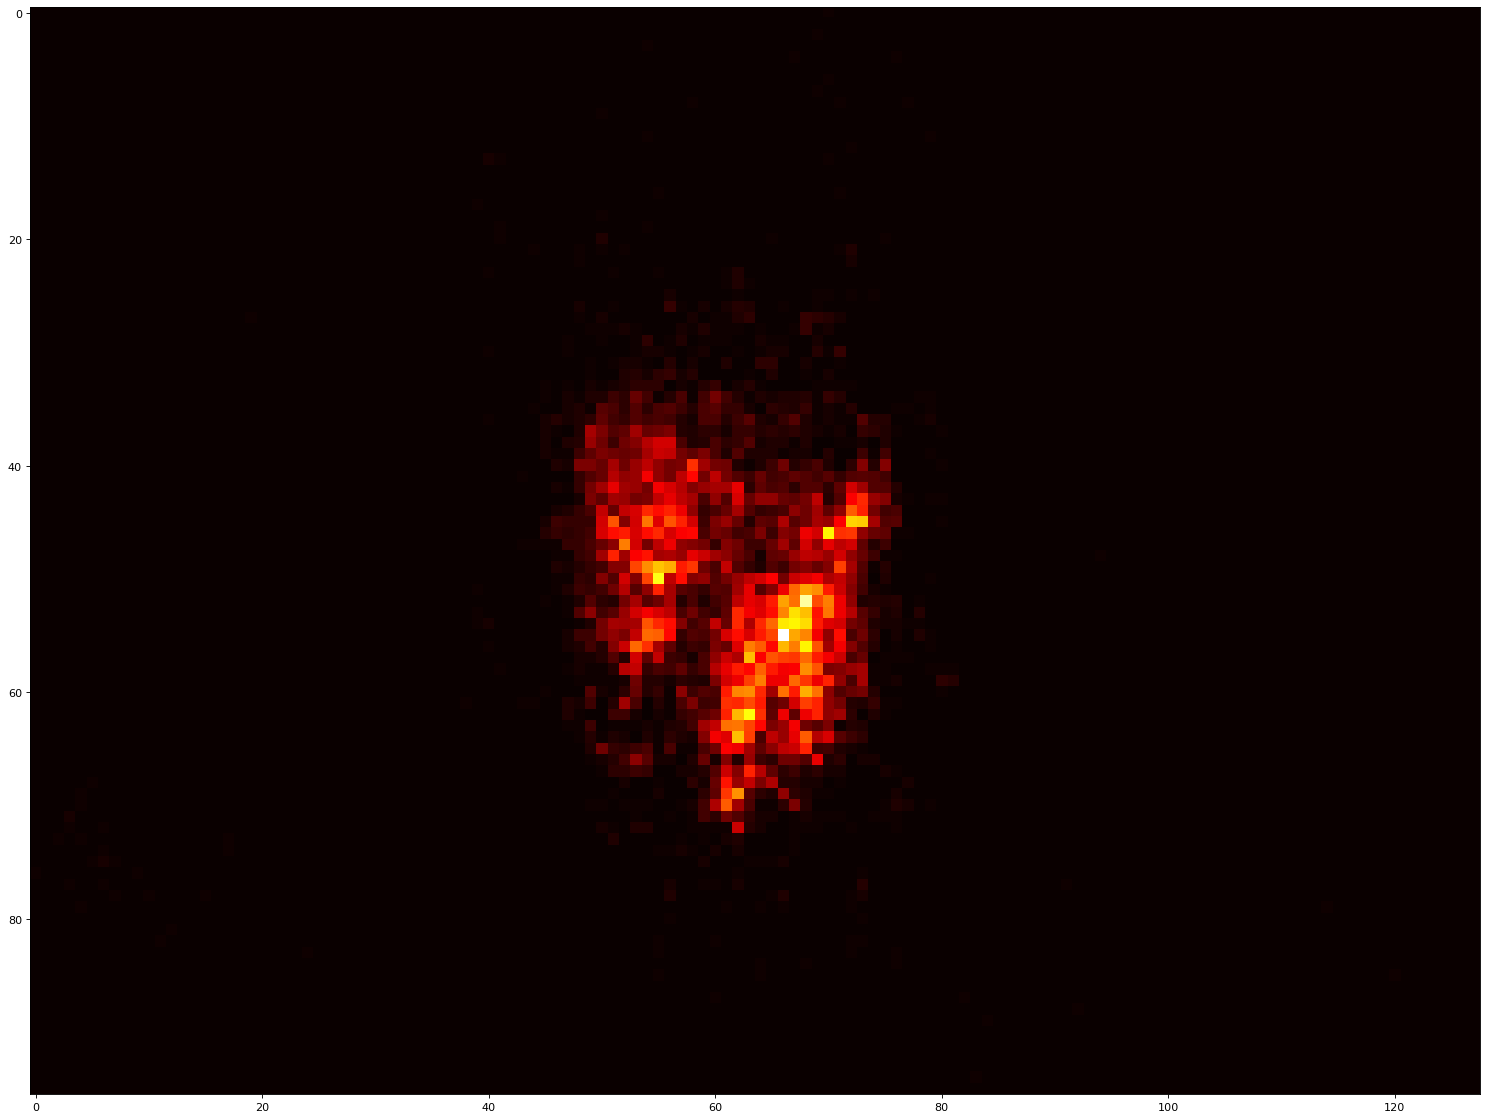

In [6]:
inp_c = "Adidev"
inp_c_label = "Adidev_25"
inp_s = "adidev"
inp_s_label ="adidev"
start = 13
end = 1313
start = (int(start//100)*60*24)+(int(start%100)*24)
end = (int(end//100)*60*24)+(int(end%100)*24)
print(start,end)
heatmaps(inp_c,inp_c_label,inp_s,inp_s_label,"adidev_2",start,end)
dlib_distance(inp_c,inp_c_label,inp_s,start,end)

48 18744


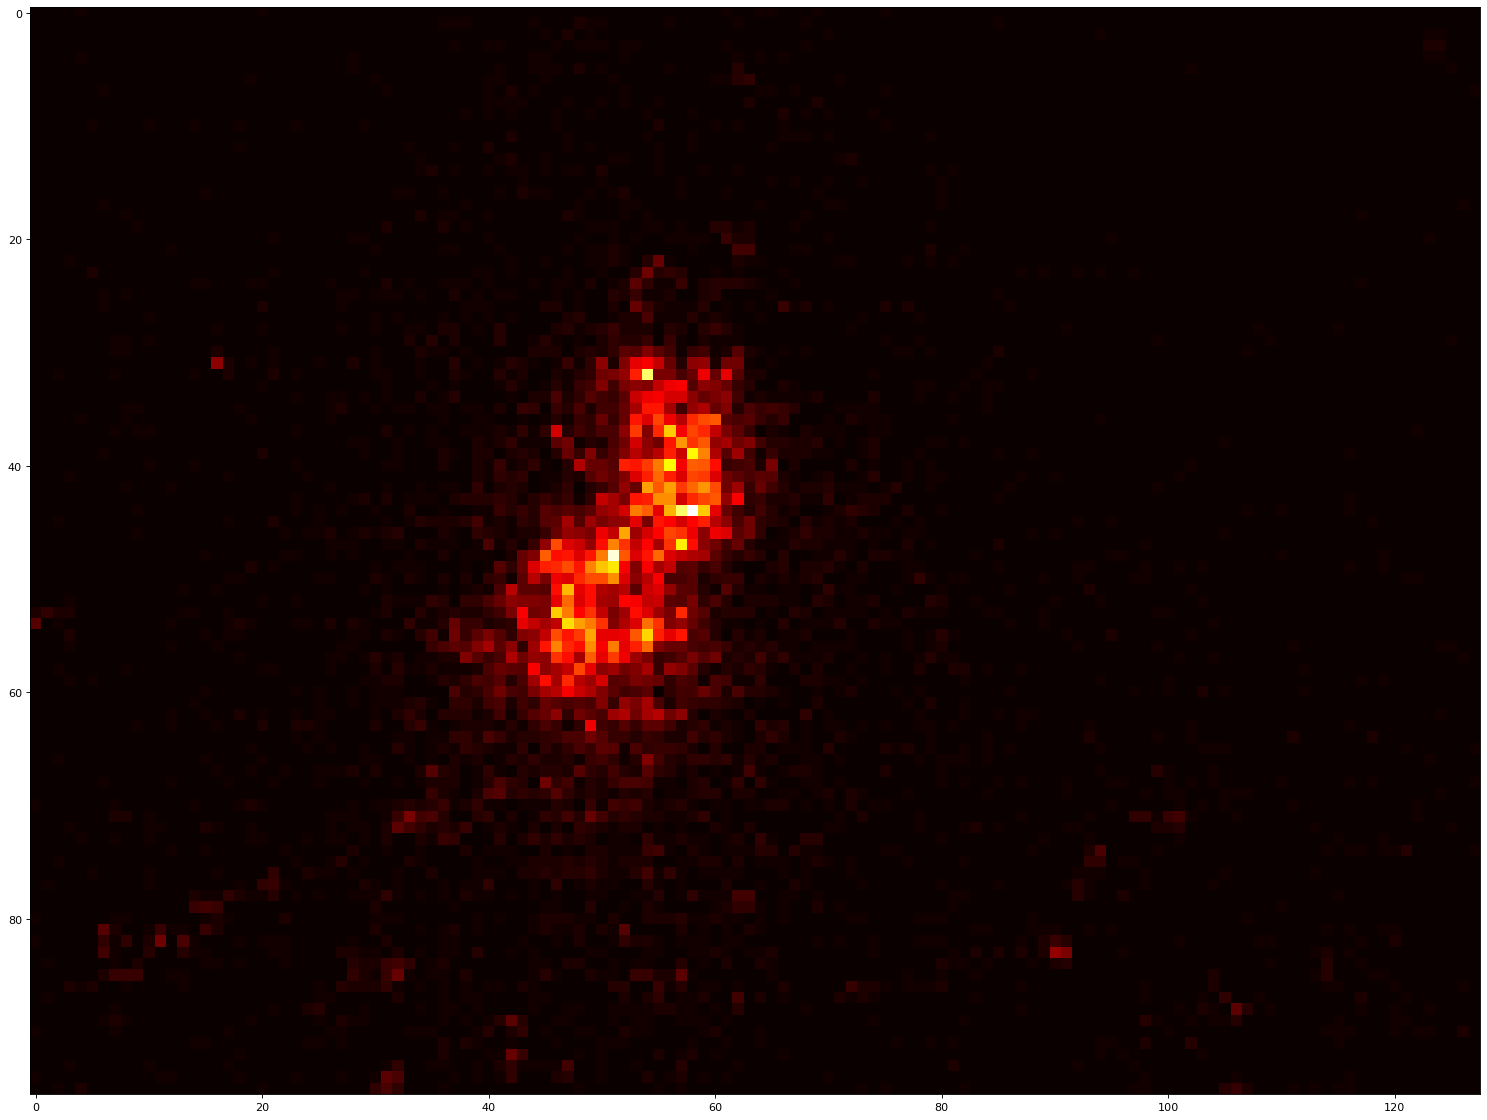

In [10]:
inp_c = "Bhaskar"
inp_c_label = "Bhaskar_25"
inp_s = "bhaskar"
inp_s_label ="bhaskar"
start = 2
end = 1301
start = (int(start//100)*60*24)+(int(start%100)*24)
end = (int(end//100)*60*24)+(int(end%100)*24)
print(start,end)
heatmaps(inp_c,inp_c_label,inp_s,inp_s_label,"bhaskar",start,end)
dlib_distance(inp_c,inp_c_label,inp_s,start,end)

96 18384


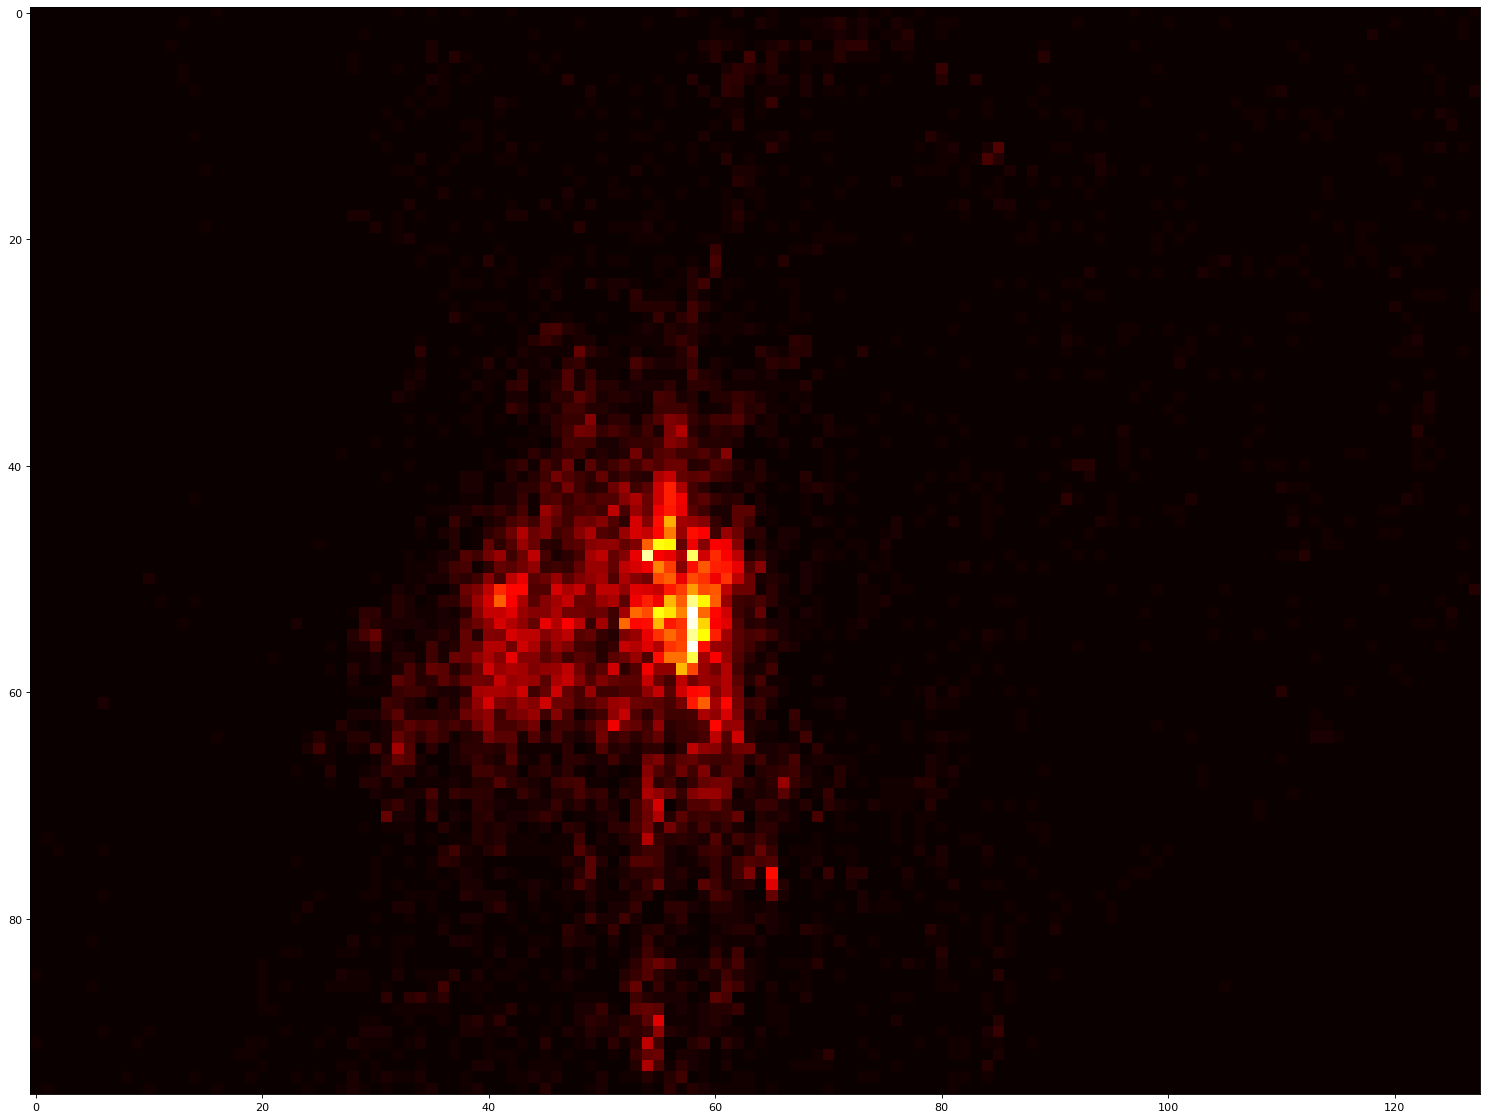

In [11]:
inp_c = "Jake"
inp_c_label = "jake_25"
inp_s = "jake"
inp_s_label ="jake"
start = 4
end = 1246
start = (int(start//100)*60*24)+(int(start%100)*24)
end = (int(end//100)*60*24)+(int(end%100)*24)
print(start,end)
heatmaps(inp_c,inp_c_label,inp_s,inp_s_label,"jake",start,end)
dlib_distance(inp_c,inp_c_label,inp_s,start,end)

288 19008


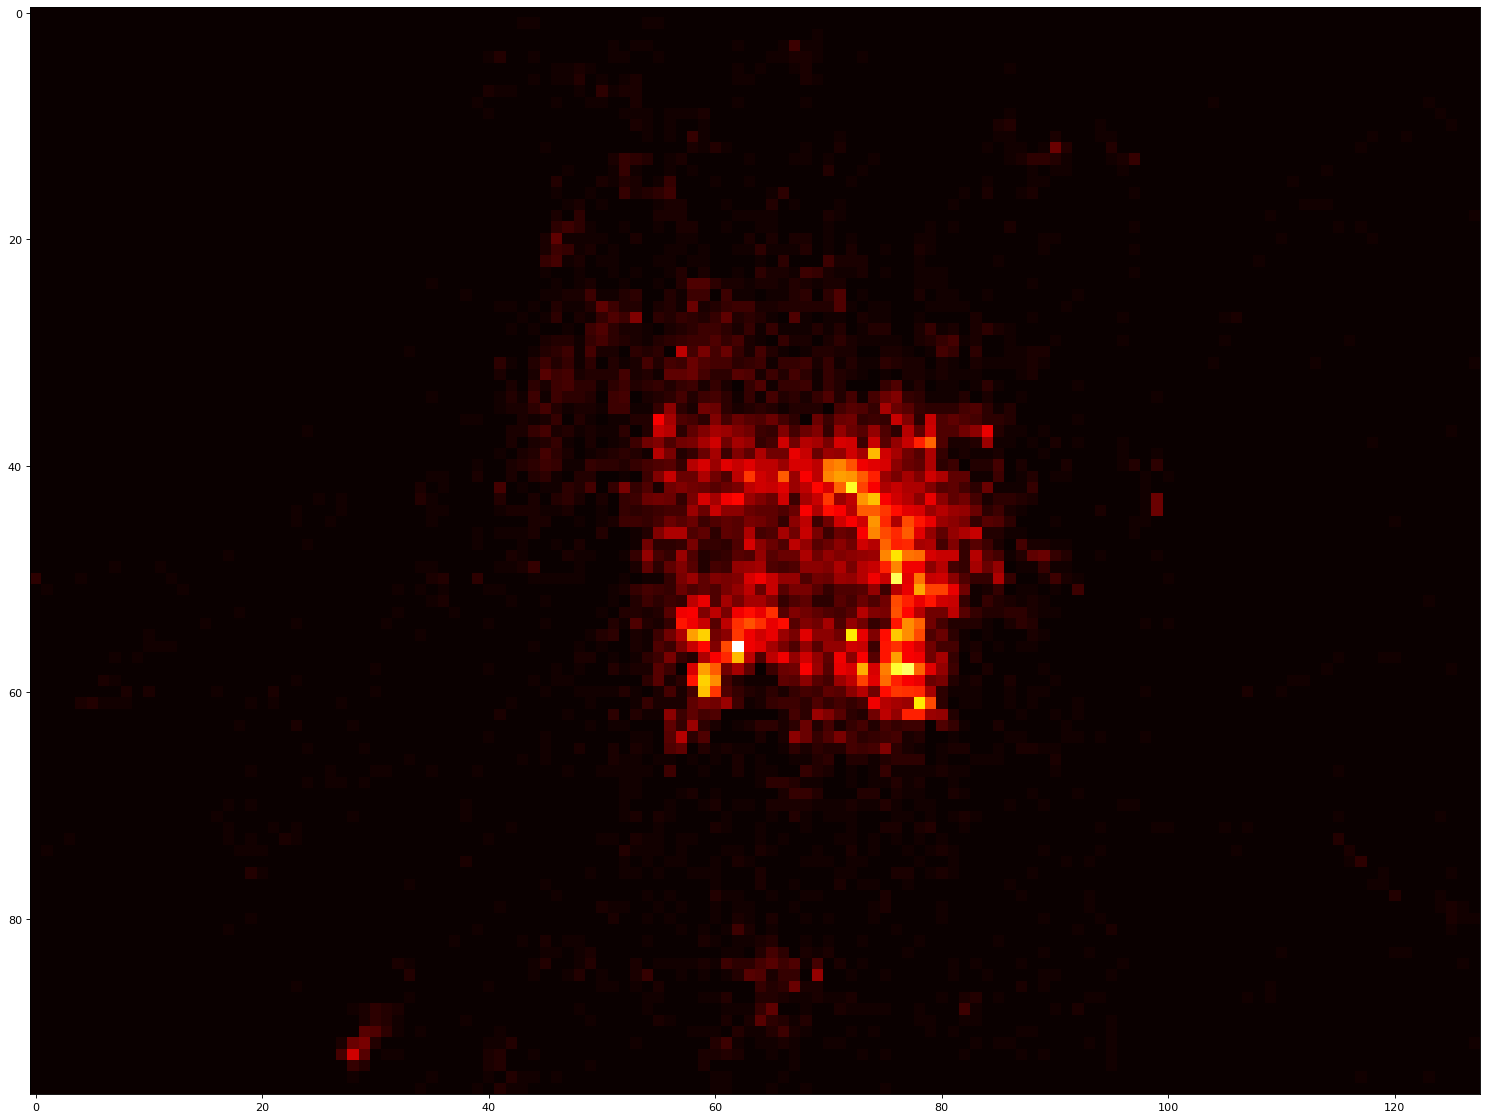

In [12]:
inp_c = "Kaushal"
inp_c_label = "kaushal_25"
inp_s = "kaushal"
inp_s_label ="kaushal"
start = 12
end = 1312
start = (int(start//100)*60*24)+(int(start%100)*24)
end = (int(end//100)*60*24)+(int(end%100)*24)
print(start,end)
heatmaps(inp_c,inp_c_label,inp_s,inp_s_label,"kaushal",start,end)
dlib_distance(inp_c,inp_c_label,inp_s,start,end)

1272 20640


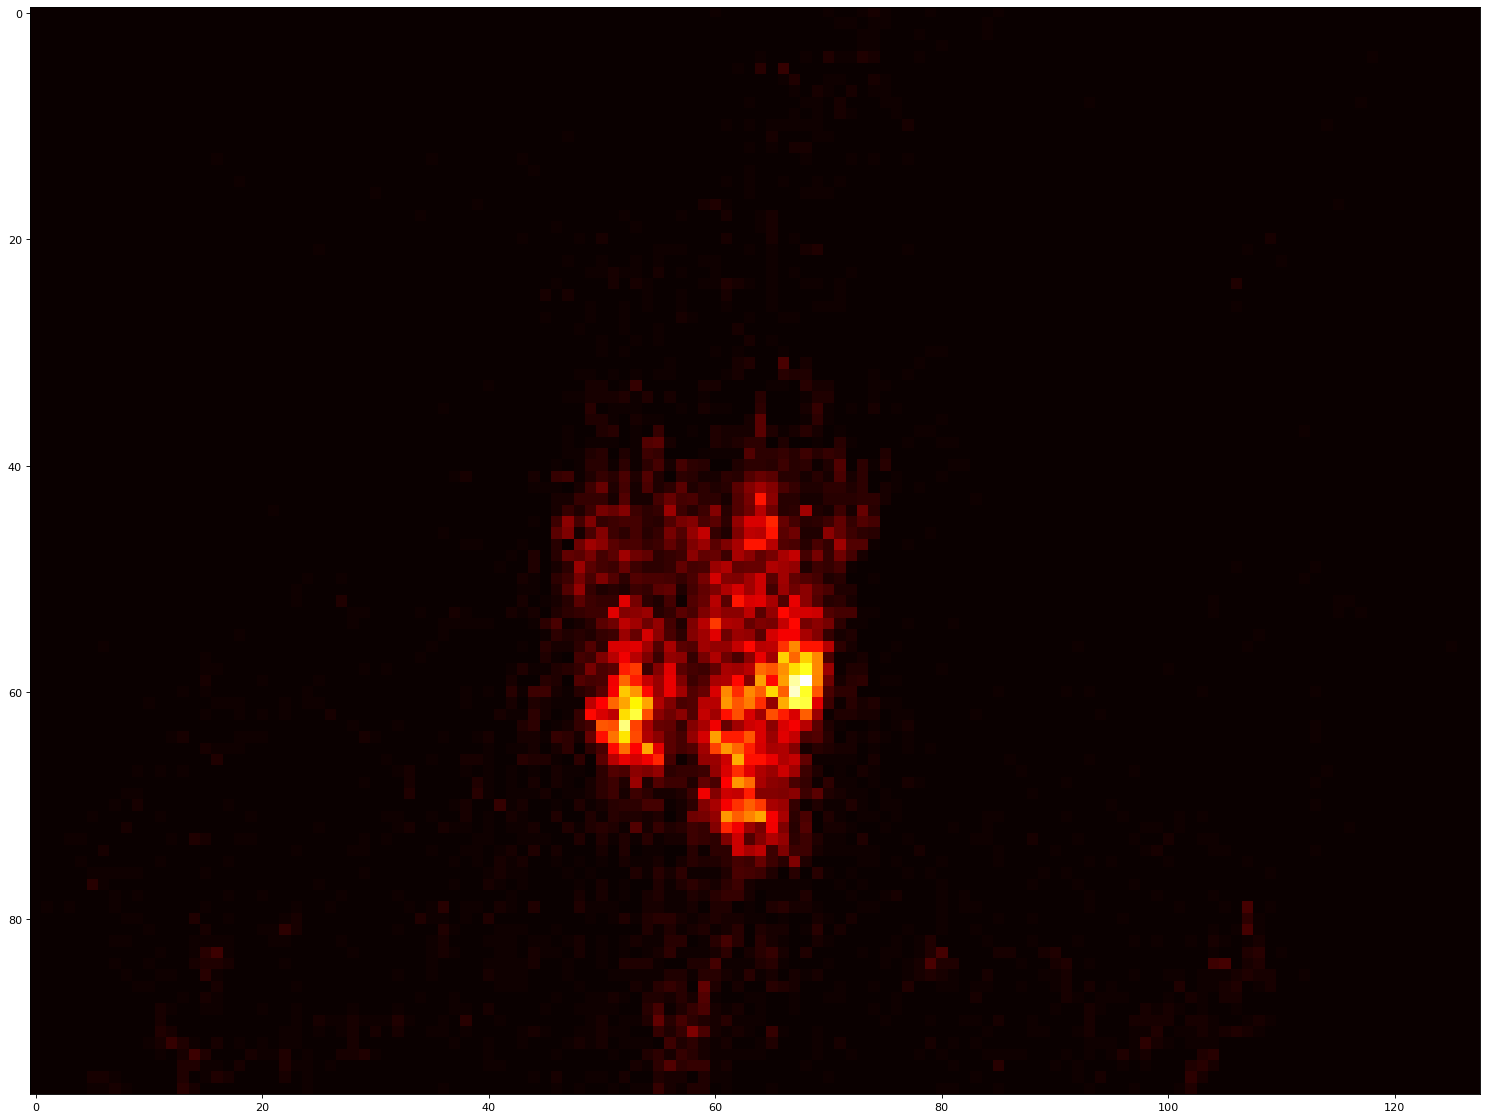

In [3]:
inp_c = "Devika"
inp_c_label = "devika_25"
inp_s = "devika.avi"
inp_s_label ="devika"
start = 53
end = 1420
start = (int(start//100)*60*24)+(int(start%100)*24)
end = (int(end//100)*60*24)+(int(end%100)*24)
print(start,end)
heatmaps(inp_c,inp_c_label,inp_s,inp_s_label,"devika",start,end)
dlib_distance(inp_c,inp_c_label,inp_s,start,end)

1272 20640


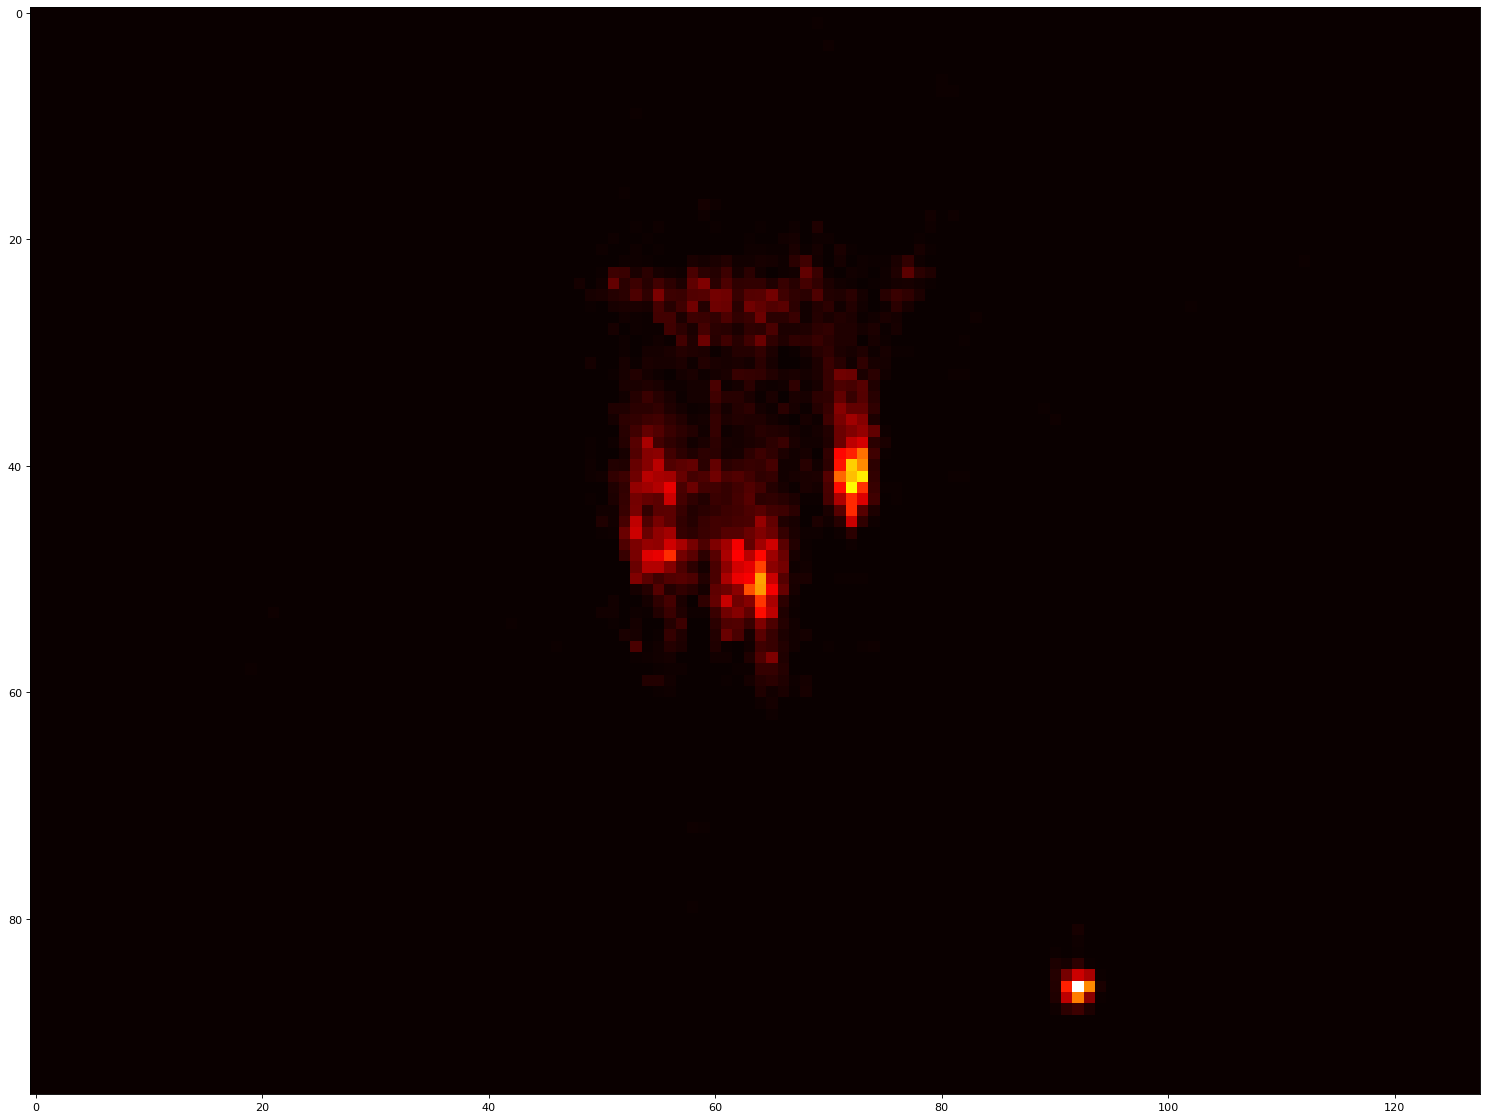

In [14]:
inp_c = "Dimple"
inp_c_label = "dimple_25"
inp_s = "dimple"
inp_s_label ="dimple"
start = 53
end = 1420
start = (int(start//100)*60*24)+(int(start%100)*24)
end = (int(end//100)*60*24)+(int(end%100)*24)
print(start,end)
heatmaps(inp_c,inp_c_label,inp_s,inp_s_label,"dimple",start,end)
dlib_distance(inp_c,inp_c_label,inp_s,start,end)

1272 20640


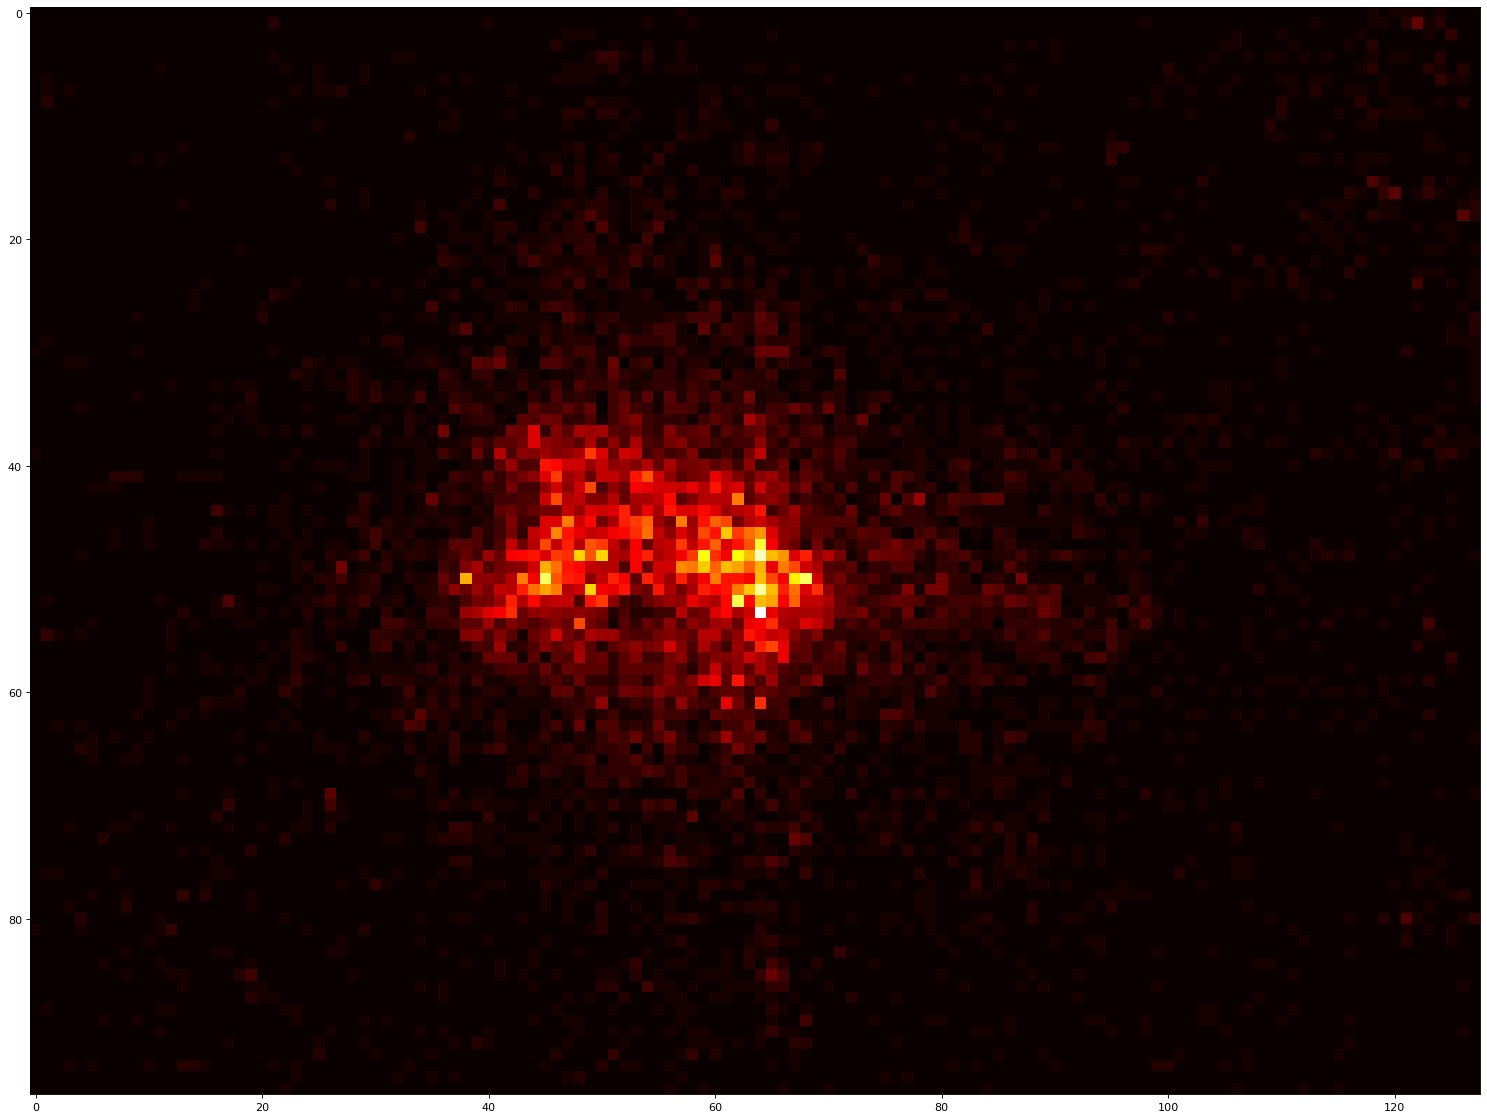

In [15]:
inp_c = "Pramod"
inp_c_label = "pramod_25"
inp_s = "pramod"
inp_s_label ="pramod"
start = 53
end = 1420
start = (int(start//100)*60*24)+(int(start%100)*24)
end = (int(end//100)*60*24)+(int(end%100)*24)
print(start,end)
heatmaps(inp_c,inp_c_label,inp_s,inp_s_label,"pramod",start,end)
dlib_distance(inp_c,inp_c_label,inp_s,start,end)

1272 20640


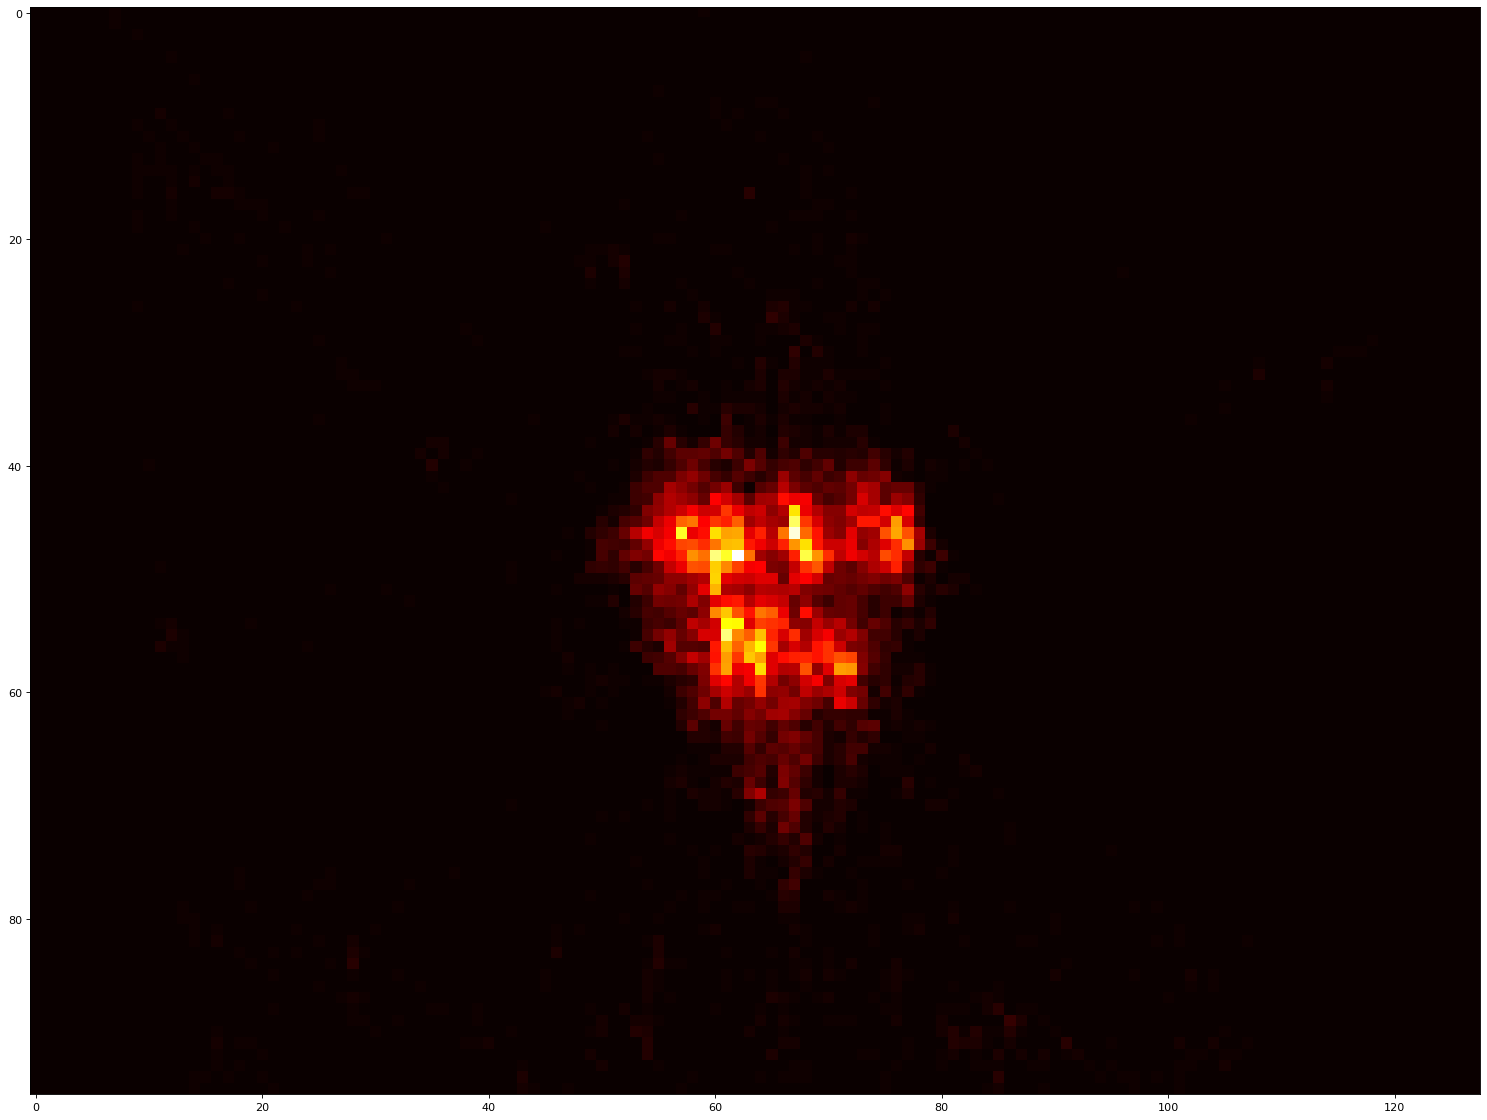

In [5]:
inp_c = "vijay"
inp_c_label = "vijay"
inp_s = "vijay"
inp_s_label ="vijay"
start = 53
end = 1420
start = (int(start//100)*60*24)+(int(start%100)*24)
end = (int(end//100)*60*24)+(int(end%100)*24)
print(start,end)
heatmaps(inp_c,inp_c_label,inp_s,inp_s_label,"vijay",start,end)
dlib_distance(inp_c,inp_c_label,inp_s,start,end)

1272 20640


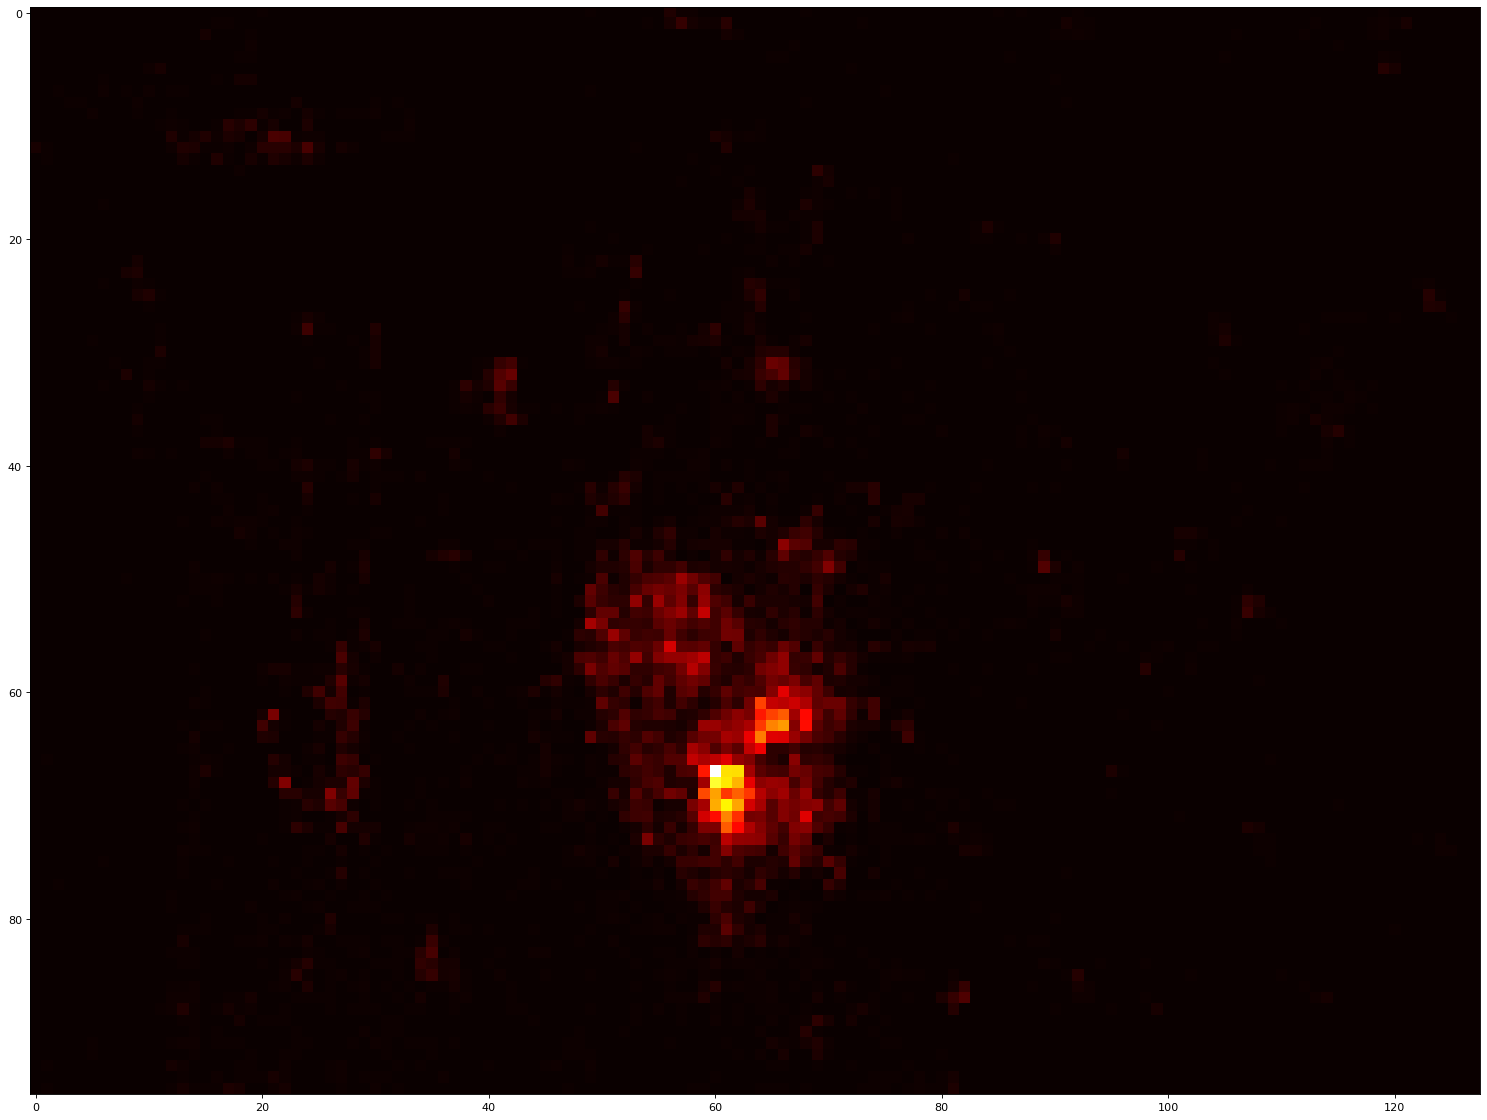

In [9]:
inp_c = "Rahi"
inp_c_label = "Rahi"
inp_s = "rahi"
inp_s_label ="rahi"
start = 10
end = 1310
start = (int(start//100)*60*24)+(int(start%100)*24)
end = (int(end//100)*60*24)+(int(end%100)*24)
print(start,end)
heatmaps(inp_c,inp_c_label,inp_s,inp_s_label,"rahi",start,end)
dlib_distance(inp_c,inp_c_label,inp_s,start,end)

1272 20640


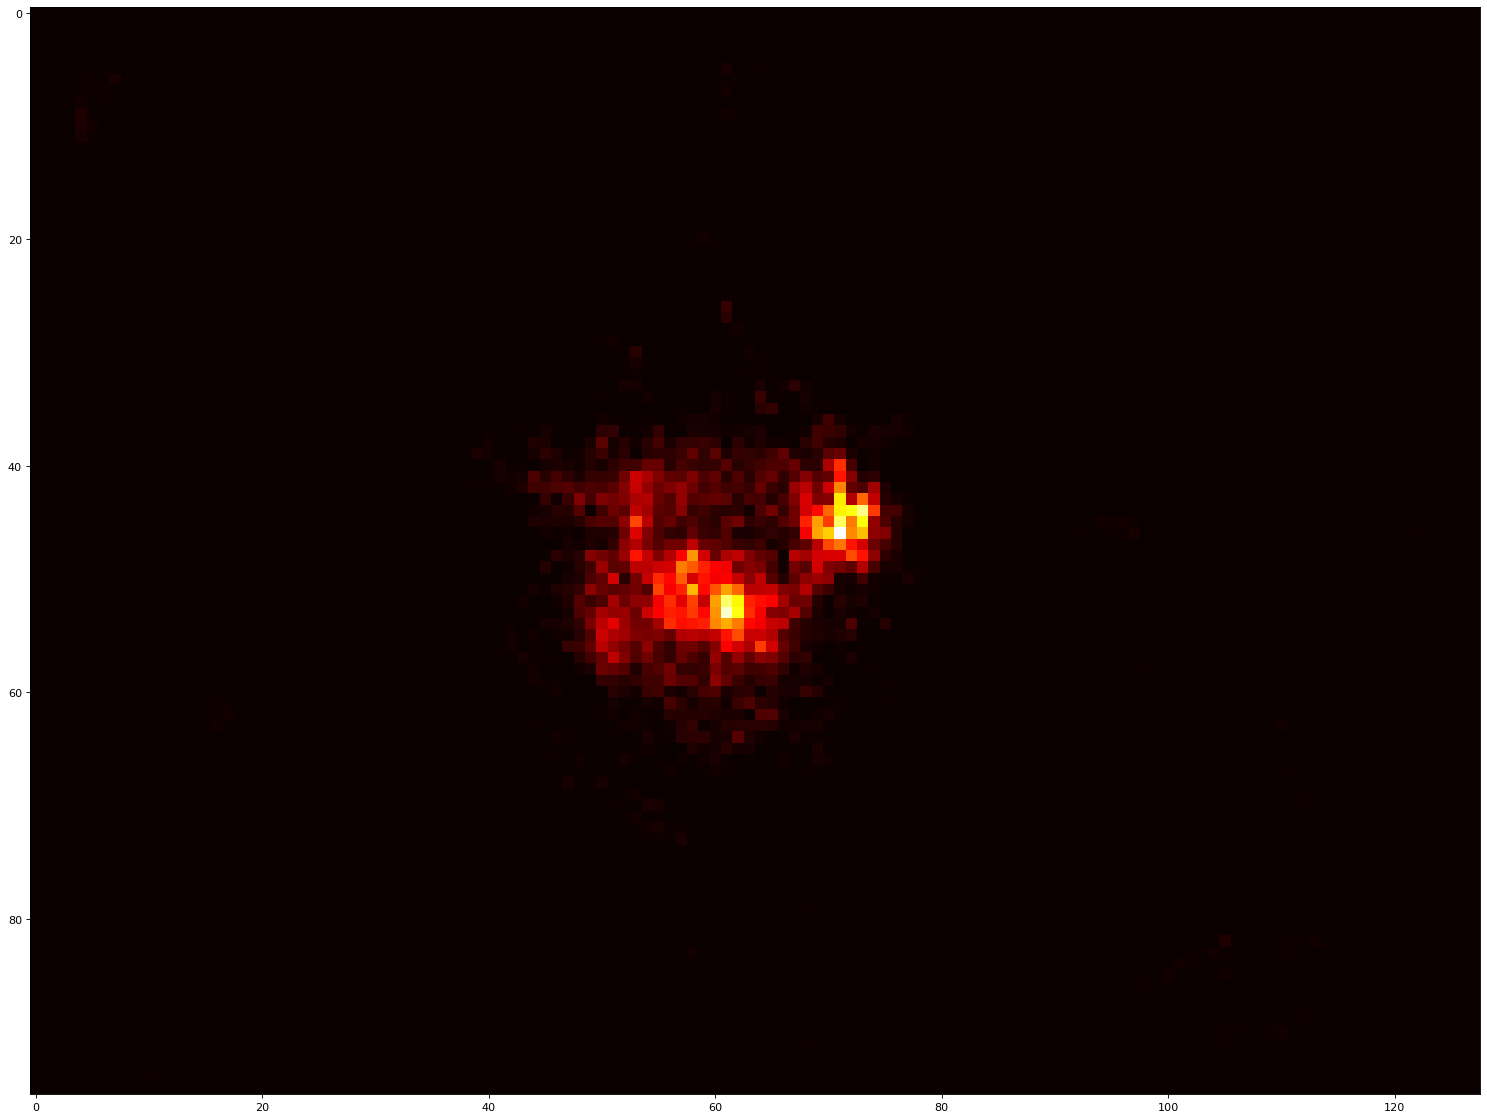

In [10]:
inp_c = "rex"
inp_c_label = "rex"
inp_s = "rex"
inp_s_label ="rex" 
start = 53
end = 1420
start = (int(start//100)*60*24)+(int(start%100)*24)
end = (int(end//100)*60*24)+(int(end%100)*24)
print(start,end)
heatmaps(inp_c,inp_c_label,inp_s,inp_s_label,"rex",start,end)
dlib_distance(inp_c,inp_c_label,inp_s,start,end)

1272 20640


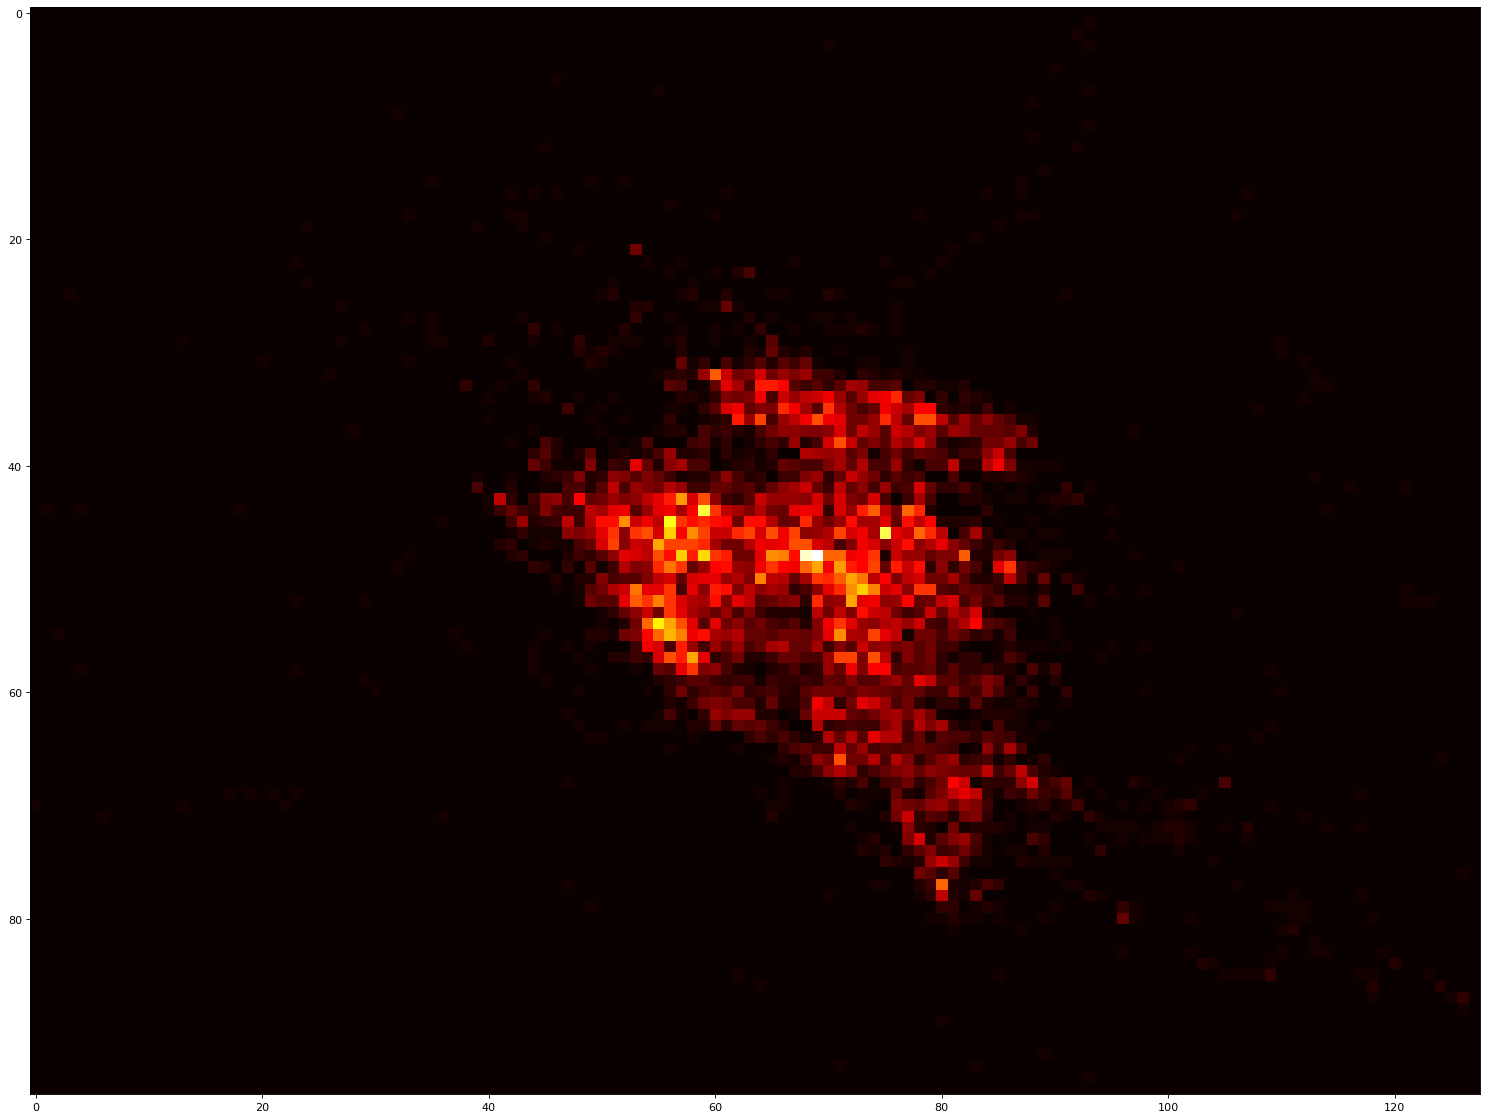

In [8]:
inp_c = "Prashant"
inp_c_label = "prashant"
inp_s = "prashant"
inp_s_label ="prashant"
start = 53
end = 1420
start = (int(start//100)*60*24)+(int(start%100)*24)
end = (int(end//100)*60*24)+(int(end%100)*24)
print(start,end)
heatmaps(inp_c,inp_c_label,inp_s,inp_s_label,"prashant",start,end)
dlib_distance(inp_c,inp_c_label,inp_s,start,end)

1272 20640


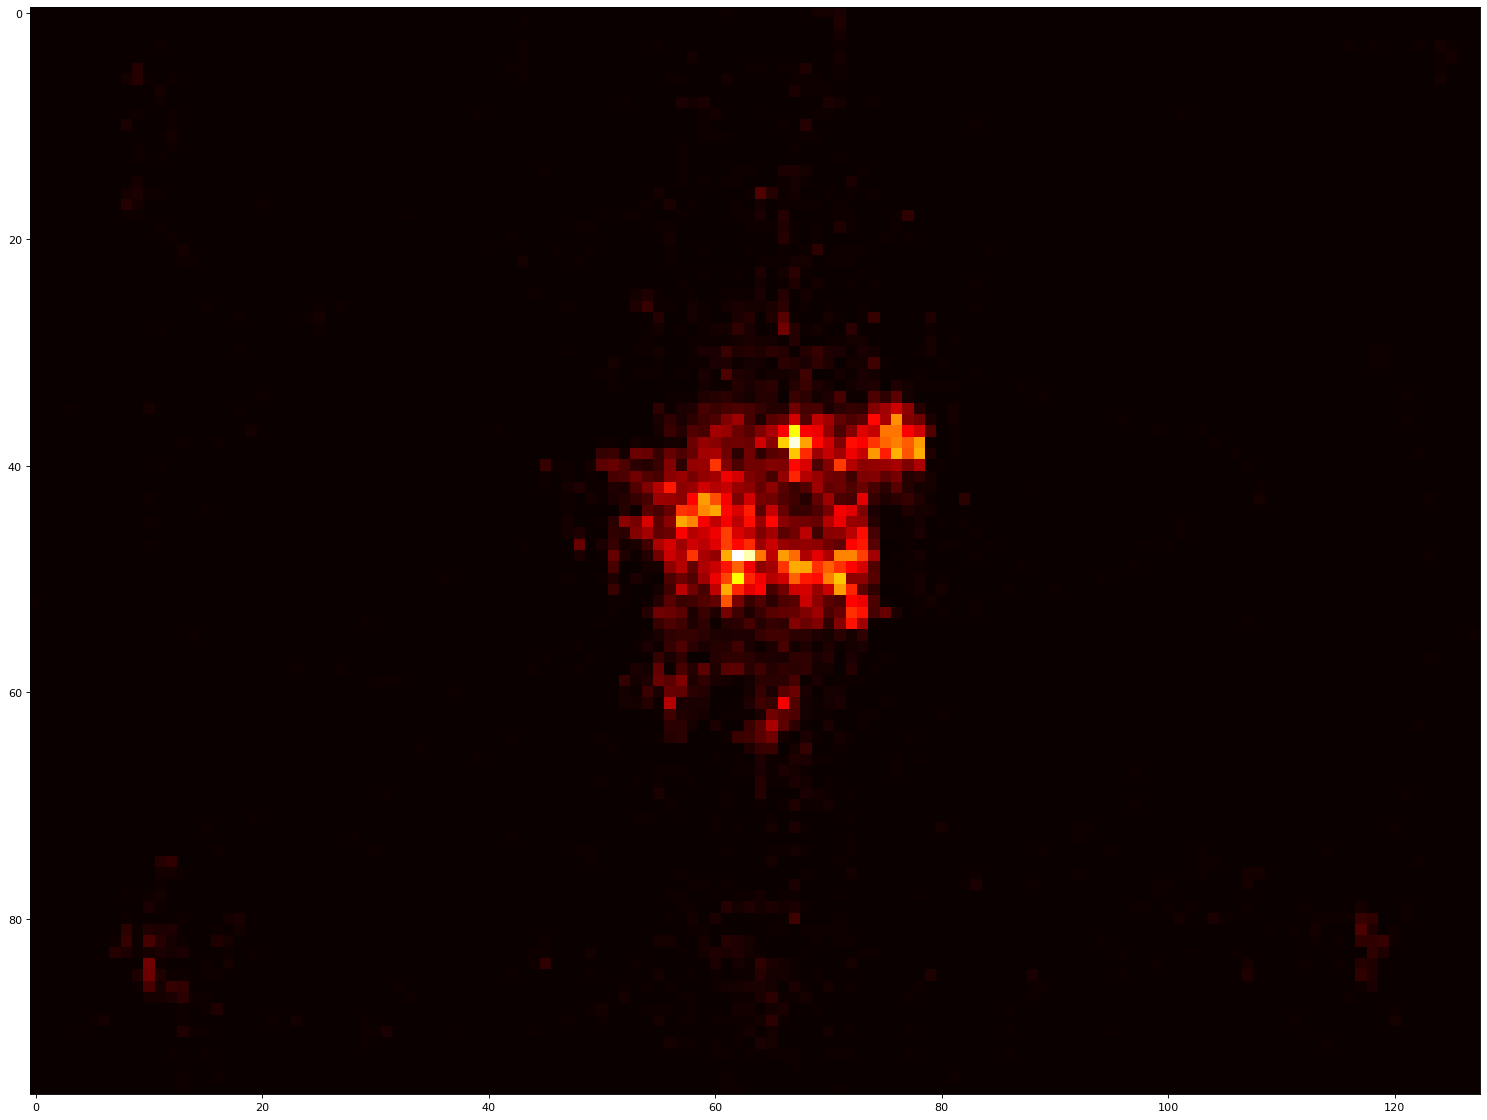

In [42]:
inp_c = "Kunal"
inp_c_label = "Kunal"
inp_s = "kunal"
# inp_s_label ="kunal"
start = 53
end = 1420
start = (int(start//100)*60*24)+(int(start%100)*24)
end = (int(end//100)*60*24)+(int(end%100)*24)
print(start,end)
heatmaps(inp_c,inp_c_label,inp_s,inp_s,inp_s,start,end)
dlib_distance(inp_c,inp_c_label,inp_s,start,end)

1272 20640


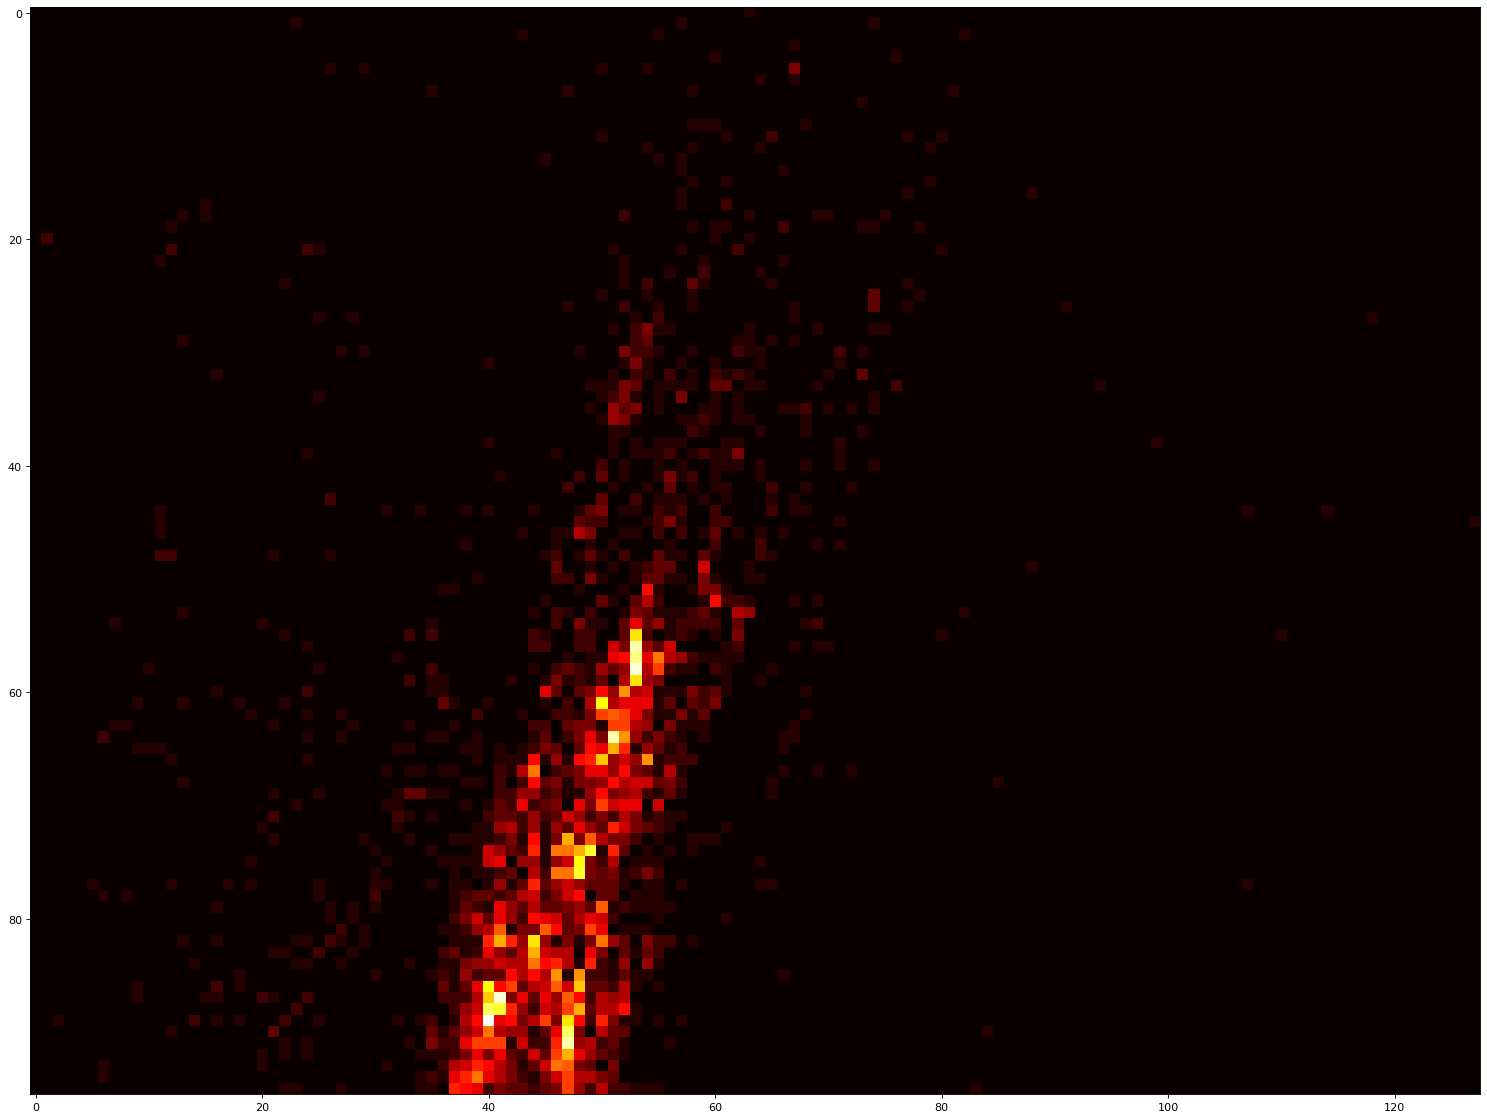

In [43]:
inp_c = "Manish"
inp_c_label = "Manish_25"
inp_s = "manish"
# inp_s_label ="kunal"
start = 53
end = 1420
start = (int(start//100)*60*24)+(int(start%100)*24)
end = (int(end//100)*60*24)+(int(end%100)*24)
print(start,end)
heatmaps(inp_c,inp_c_label,inp_s,inp_s,inp_s,start,end)
dlib_distance(inp_c,inp_c_label,inp_s,start,end)

1272 20640


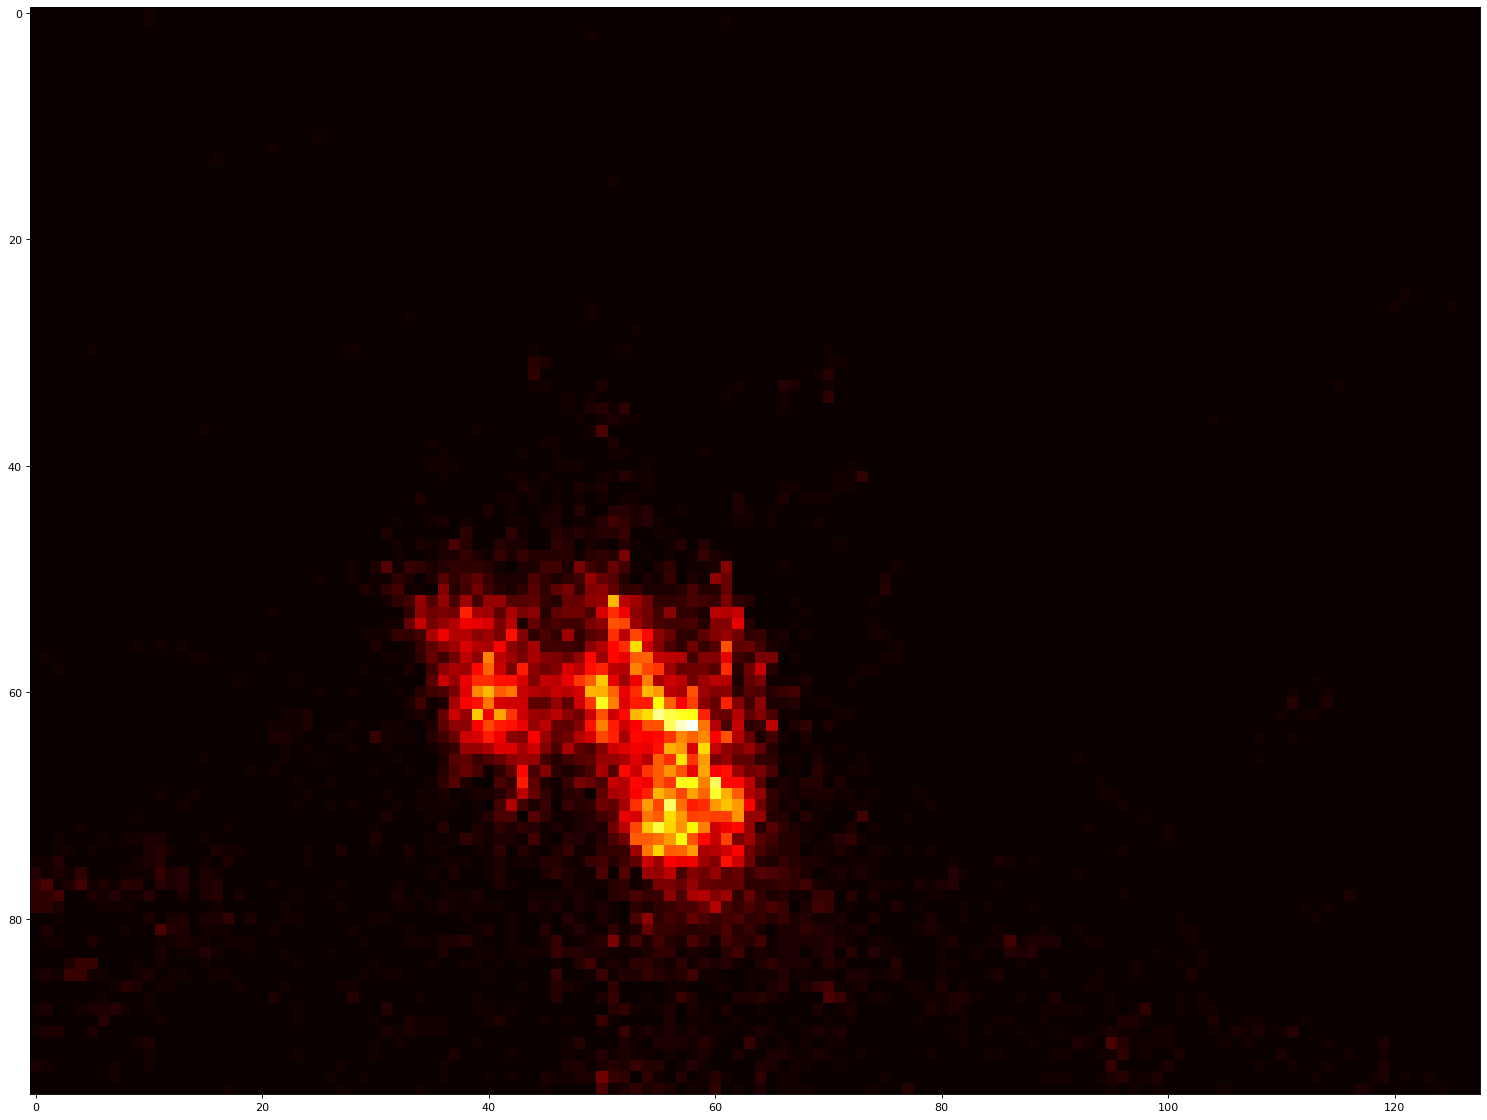

In [45]:
inp_c = "Niveditha"
inp_c_label = "Niveditha"
inp_s = "nivetha"
# inp_s_label ="kunal"
start = 53
end = 1420
start = (int(start//100)*60*24)+(int(start%100)*24)
end = (int(end//100)*60*24)+(int(end%100)*24)
print(start,end)
heatmaps(inp_c,inp_c_label,inp_s,inp_s,inp_s,start,end)
dlib_distance(inp_c,inp_c_label,inp_s,start,end)

1272 20640


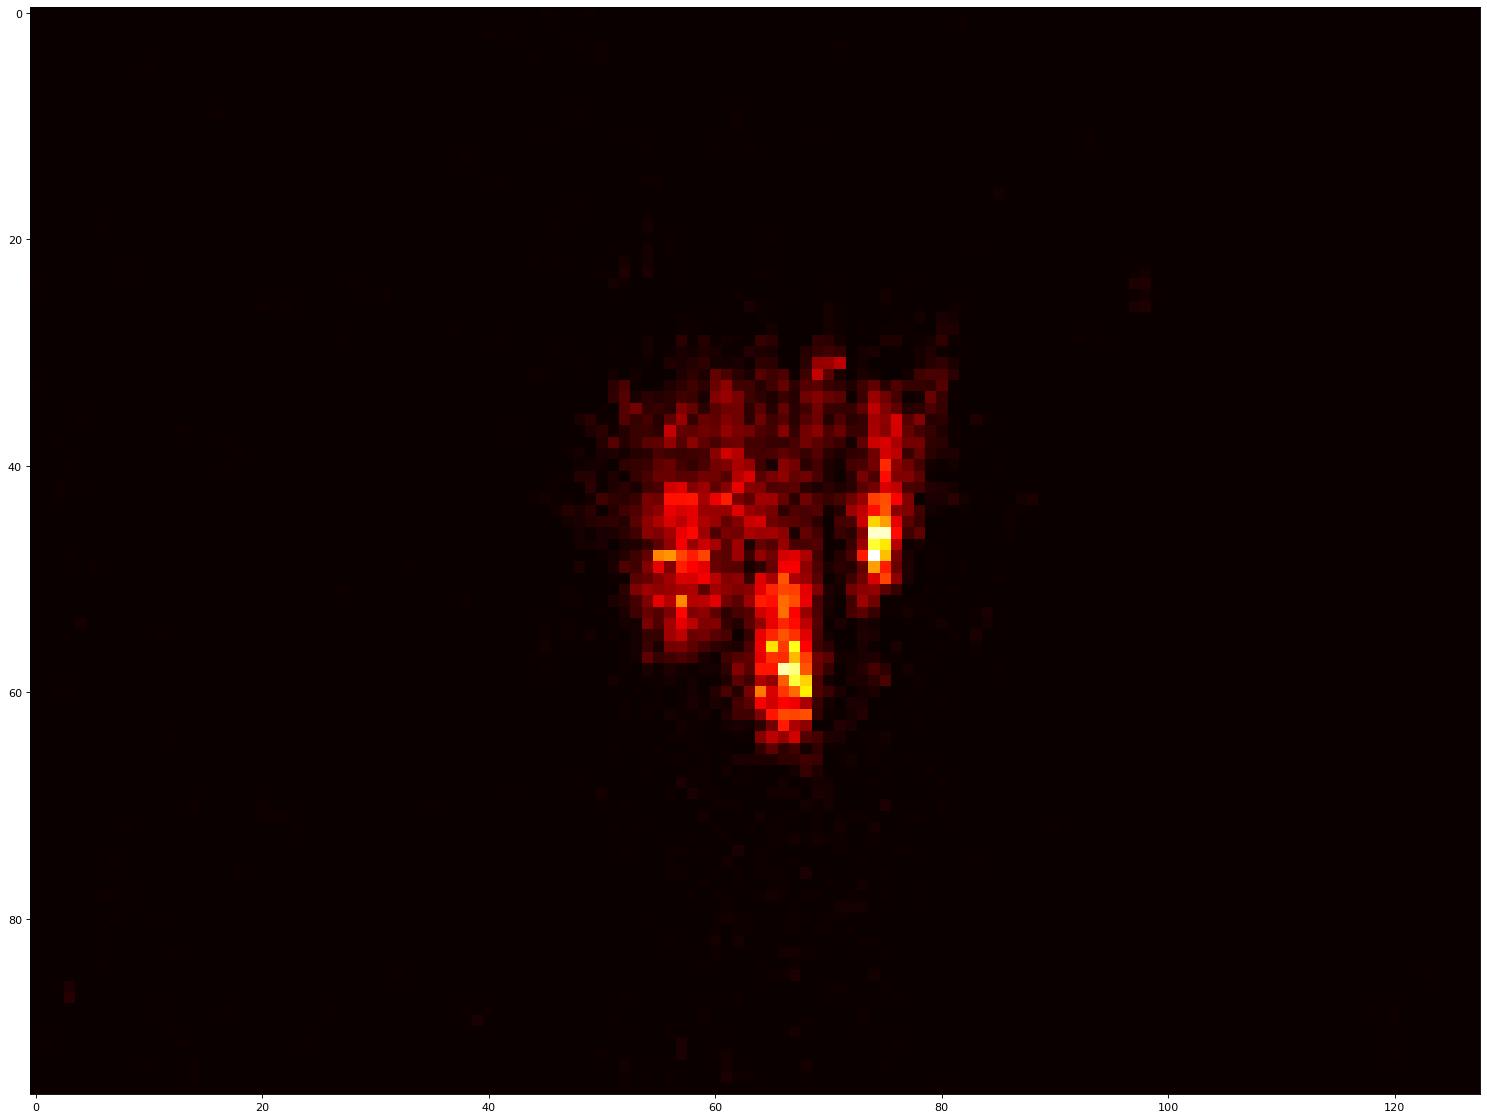

In [46]:
inp_c = "ruchir_25"
inp_c_label = "ruchir_25"
inp_s = "ruchir"
# inp_s_label ="kunal"
start = 53
end = 1420
start = (int(start//100)*60*24)+(int(start%100)*24)
end = (int(end//100)*60*24)+(int(end%100)*24)
print(start,end)
heatmaps(inp_c,inp_c_label,inp_s,inp_s,inp_s,start,end)
dlib_distance(inp_c,inp_c_label,inp_s,start,end)

1272 20640


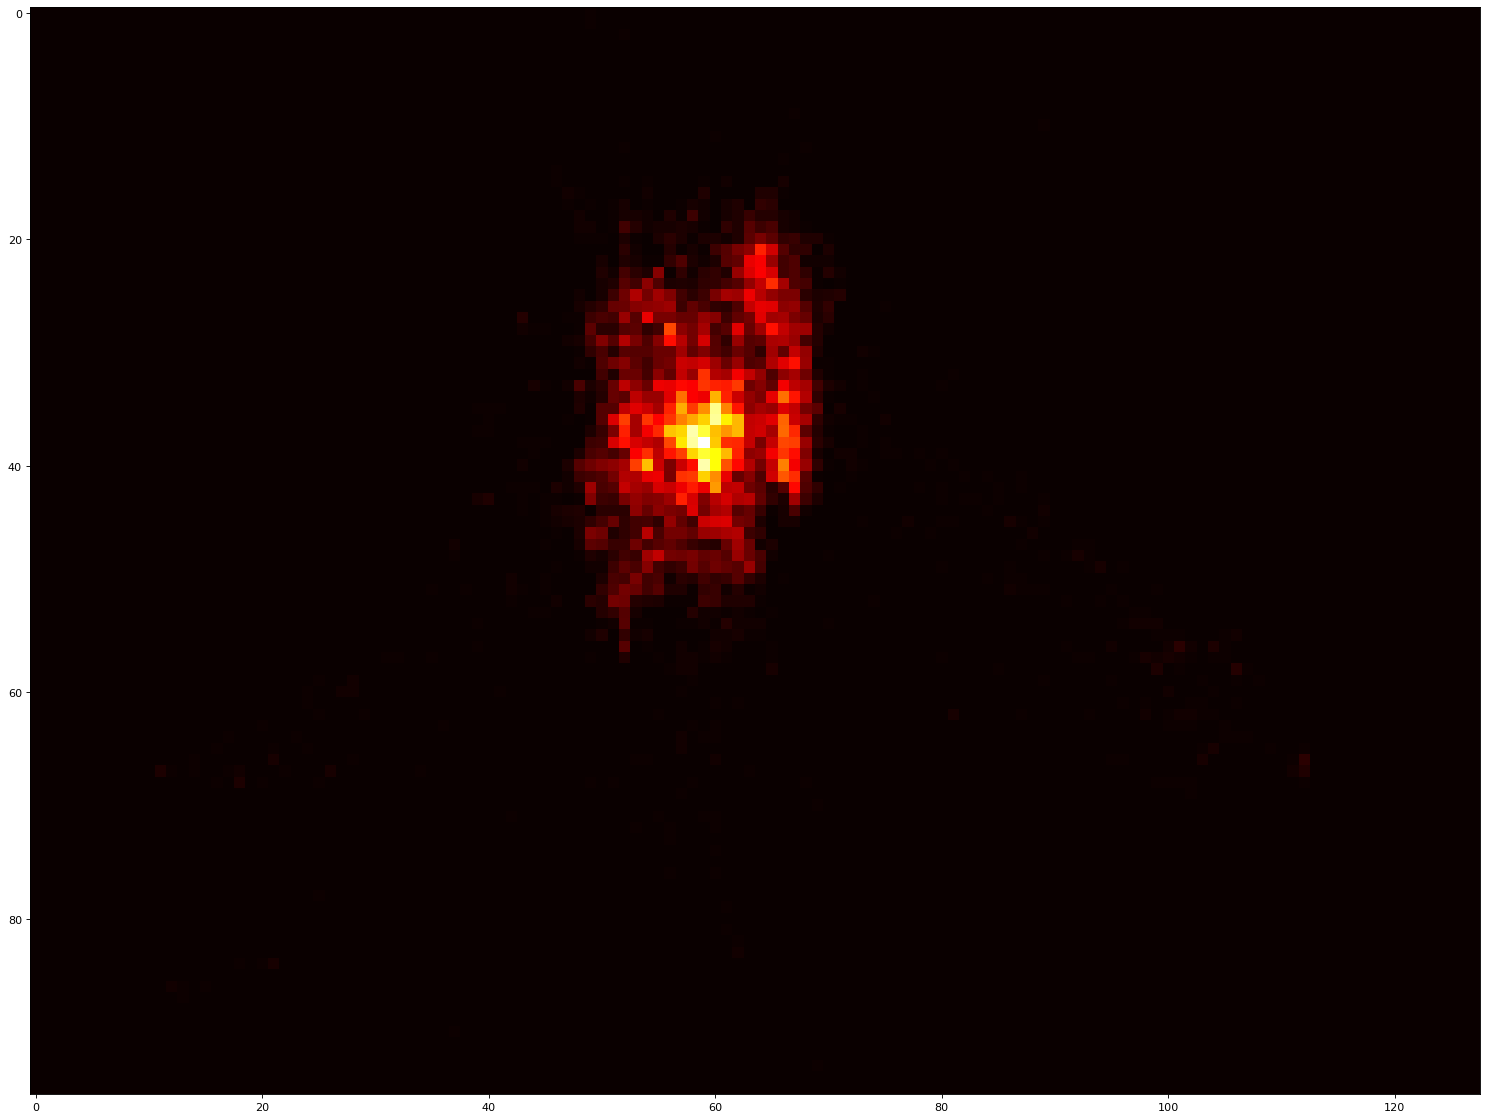

In [47]:
inp_c = "Sakthi2"
inp_c_label = "sakthi_25"
inp_s = "sakthi"
# inp_s_label ="kunal"
start = 53
end = 1420
start = (int(start//100)*60*24)+(int(start%100)*24)
end = (int(end//100)*60*24)+(int(end%100)*24)
print(start,end)
heatmaps(inp_c,inp_c_label,inp_s,inp_s,inp_s,start,end)
dlib_distance(inp_c,inp_c_label,inp_s,start,end)

1272 20640


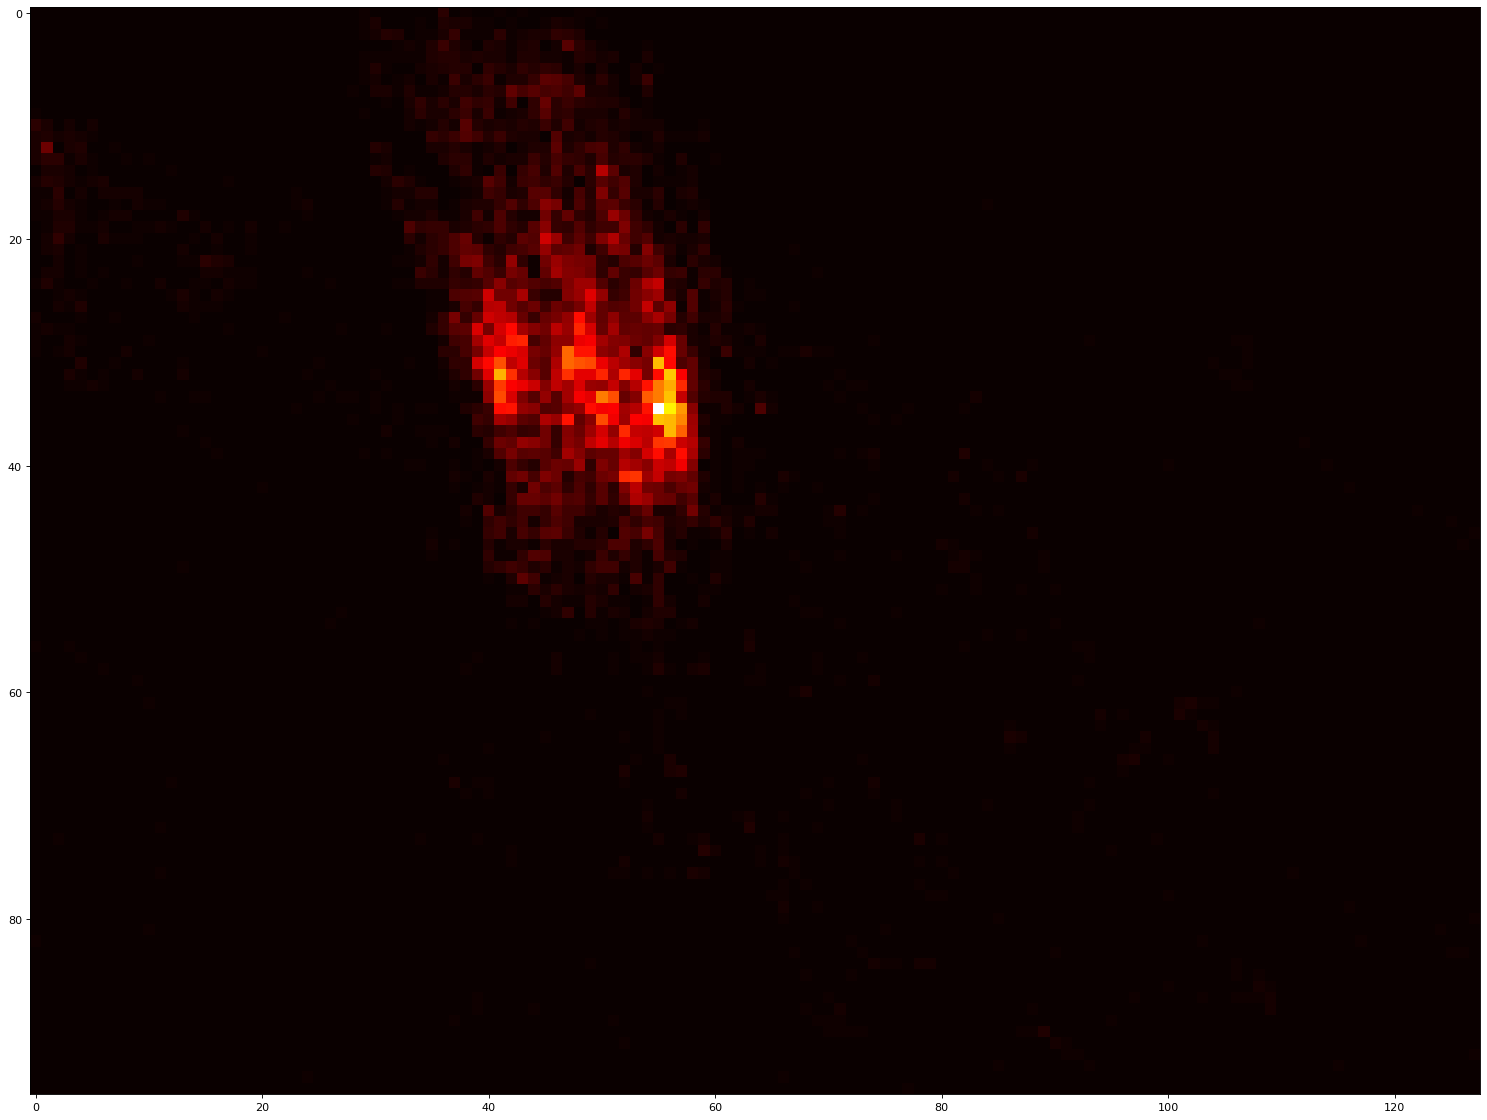

In [71]:
inp_c = "vivek"
inp_c_label = "vivek"
inp_s = "vivek"
inp_s_label ="vivek"
start = 53
end = 1420
start = (int(start//100)*60*24)+(int(start%100)*24)
end = (int(end//100)*60*24)+(int(end%100)*24)
print(start,end)
heatmaps(inp_c,inp_c_label,inp_s,inp_s_label,inp_s,start,end)
# dlib_distance(inp_c,inp_c_label,inp_s,start,end)

1272 20640


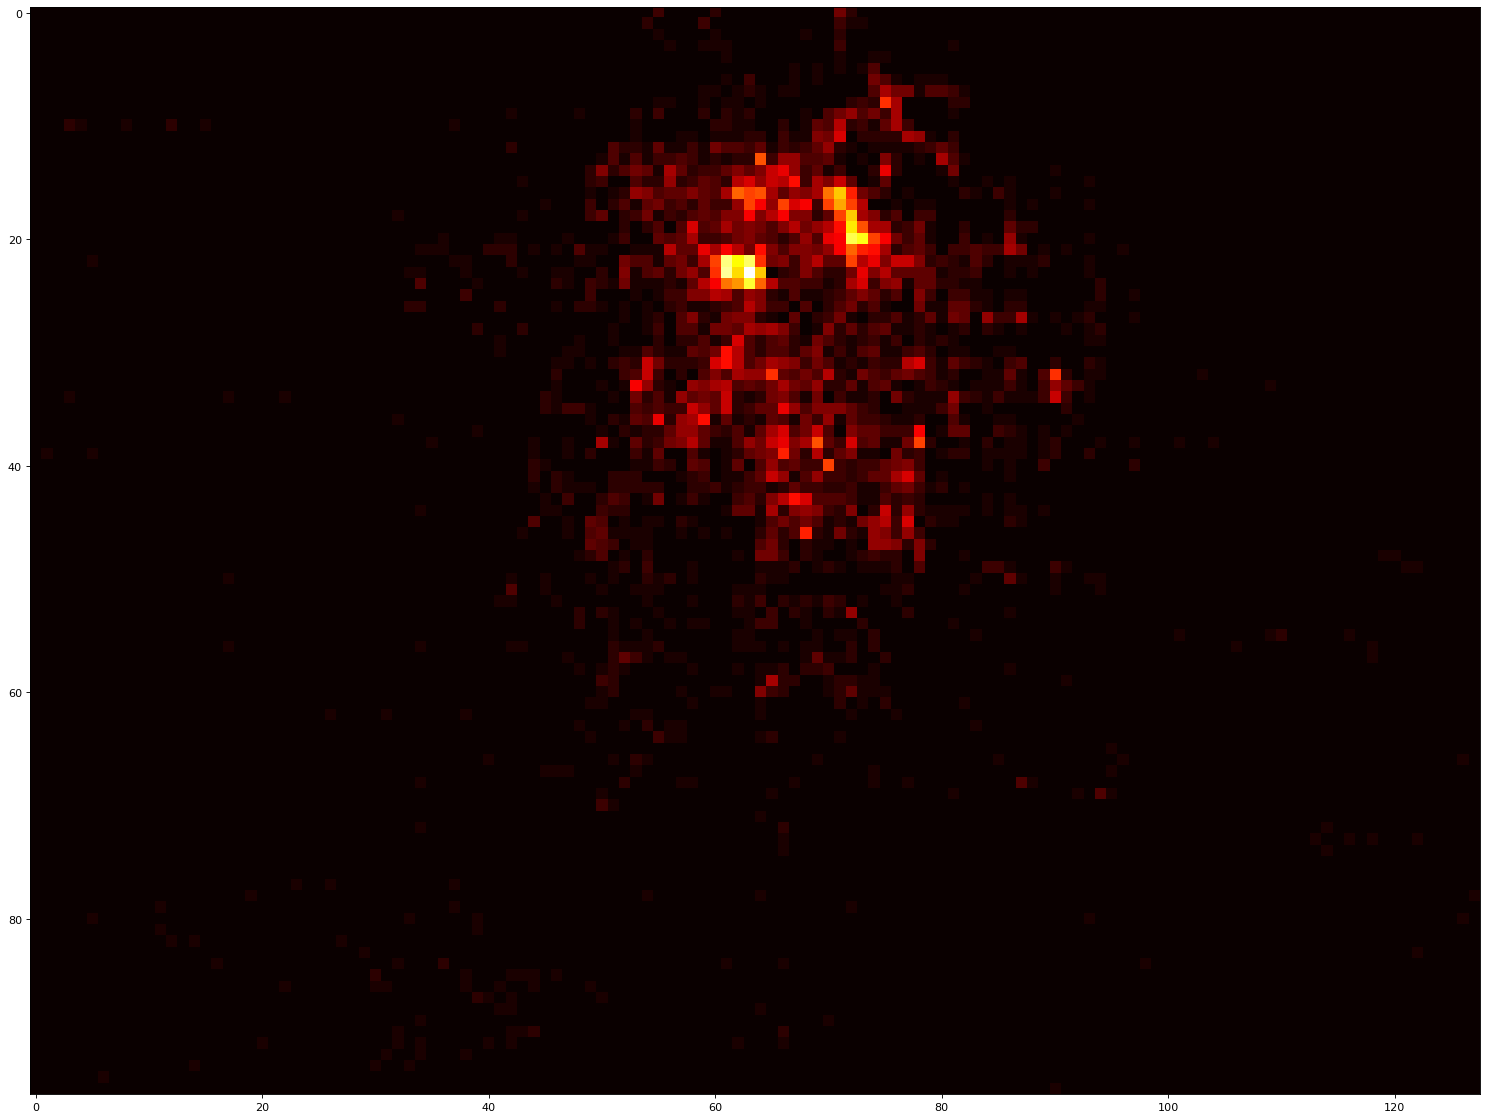

In [49]:
inp_c = "aditya"
inp_c_label = "aditya"
inp_s = "aditya"
start = 0
end = 4000
start = (int(start//100)*60*24)+(int(start%100)*24)
end = (int(end//100)*60*24)+(int(end%100)*24)
print(start,end)
heatmaps(inp_c,inp_c_label,inp_s,inp_s,inp_s,start,end)
dlib_distance(inp_c,inp_c_label,inp_s,start,end)

1272 20640


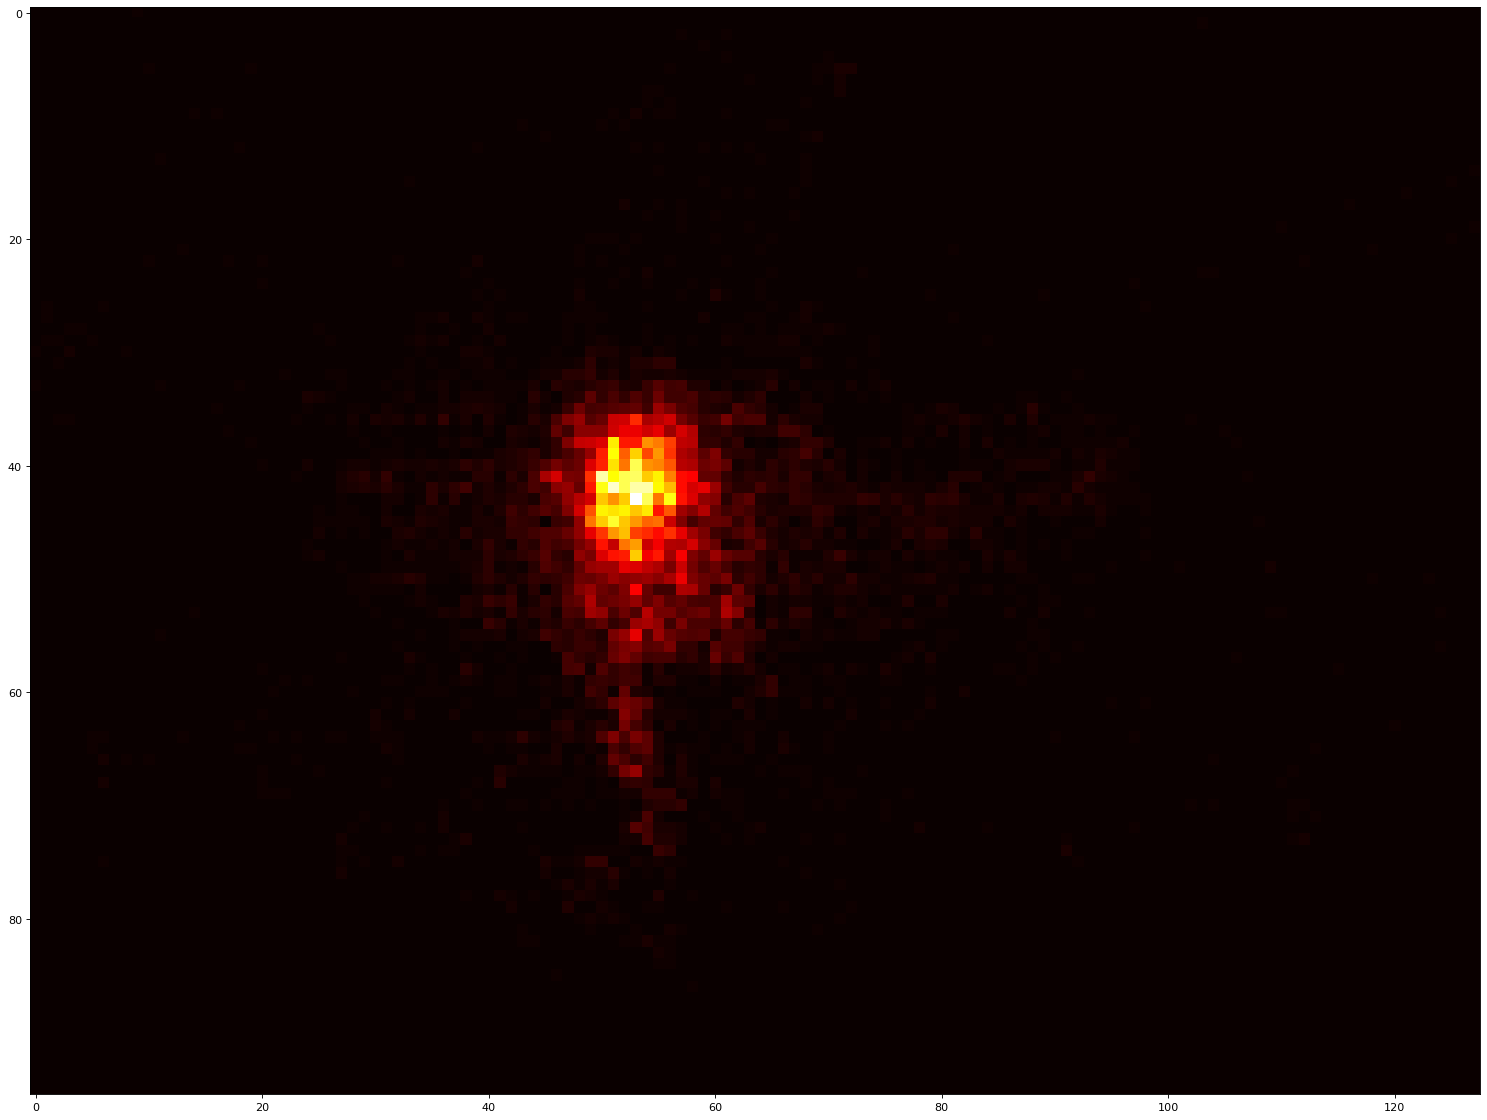

In [50]:
inp_c = "Akash"
inp_c_label = "Akash1"
inp_s = "akash"
start = 20
end = 1317
start = (int(start//100)*60*24)+(int(start%100)*24)
end = (int(end//100)*60*24)+(int(end%100)*24)
print(start,end)
heatmaps(inp_c,inp_c_label,inp_s,inp_s,inp_s,start,end)
dlib_distance(inp_c,inp_c_label,inp_s,start,end)

1272 20640


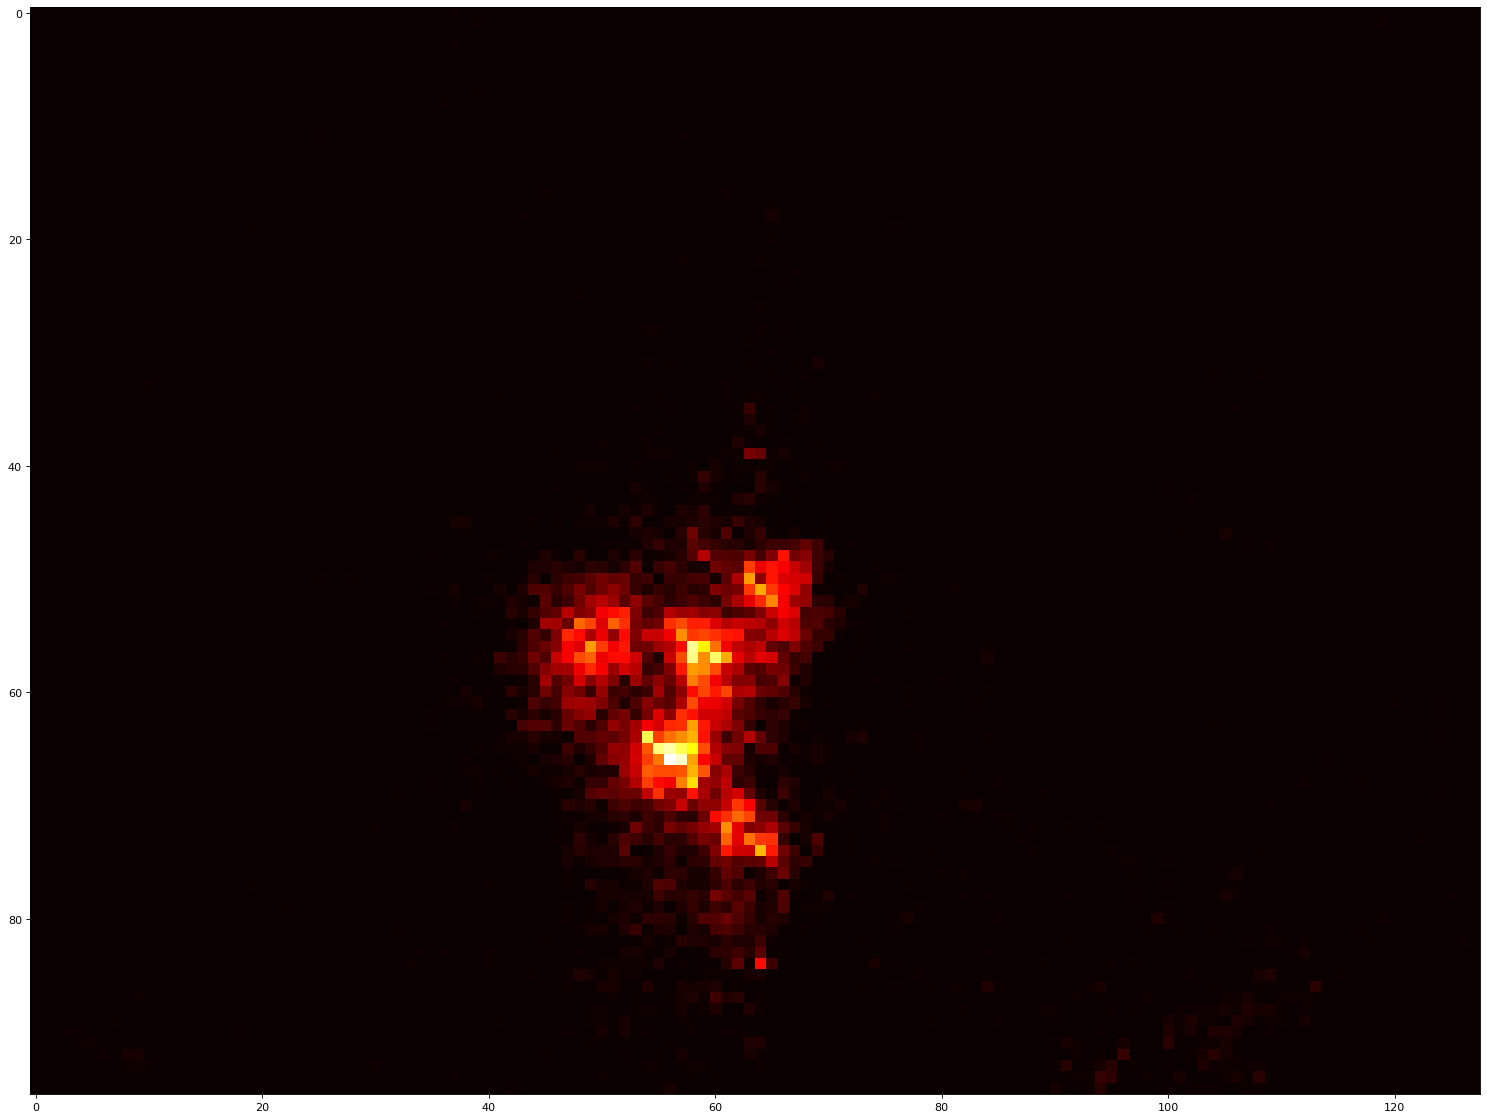

In [60]:
inp_c = "arshiya"
inp_c_label = "arshiya"
inp_s = "arshiya"
start = 19
end = 1319
start = (int(start//100)*60*24)+(int(start%100)*24)
end = (int(end//100)*60*24)+(int(end%100)*24)
print(start,end)
heatmaps(inp_c,inp_c_label,inp_s,inp_s,inp_s,start,end)
dlib_distance(inp_c,inp_c_label,inp_s,start,end)

1272 20640


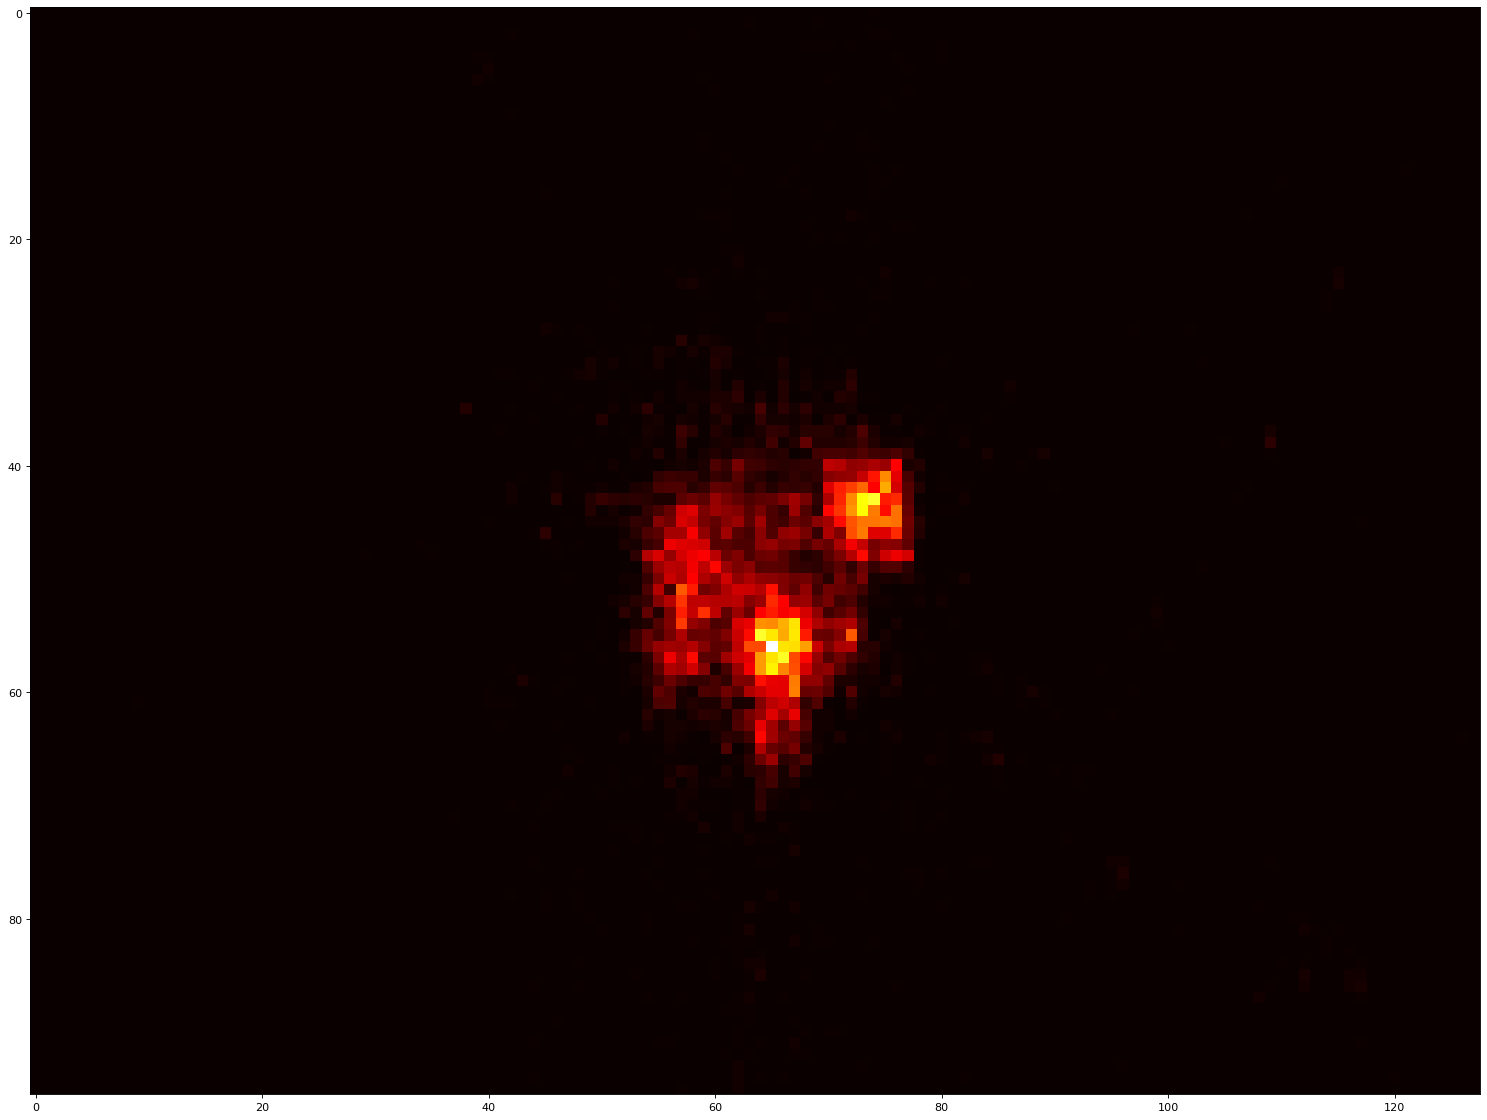

In [61]:
inp_c = "atheesh"
inp_c_label = "atheesh"
inp_s = "atheesh"
# inp_s_label ="kunal"
start = 9
end = 1304
start = (int(start//100)*60*24)+(int(start%100)*24)
end = (int(end//100)*60*24)+(int(end%100)*24)
print(start,end)
heatmaps(inp_c,inp_c_label,inp_s,inp_s,inp_s,start,end)
dlib_distance(inp_c,inp_c_label,inp_s,start,end)

1272 20640


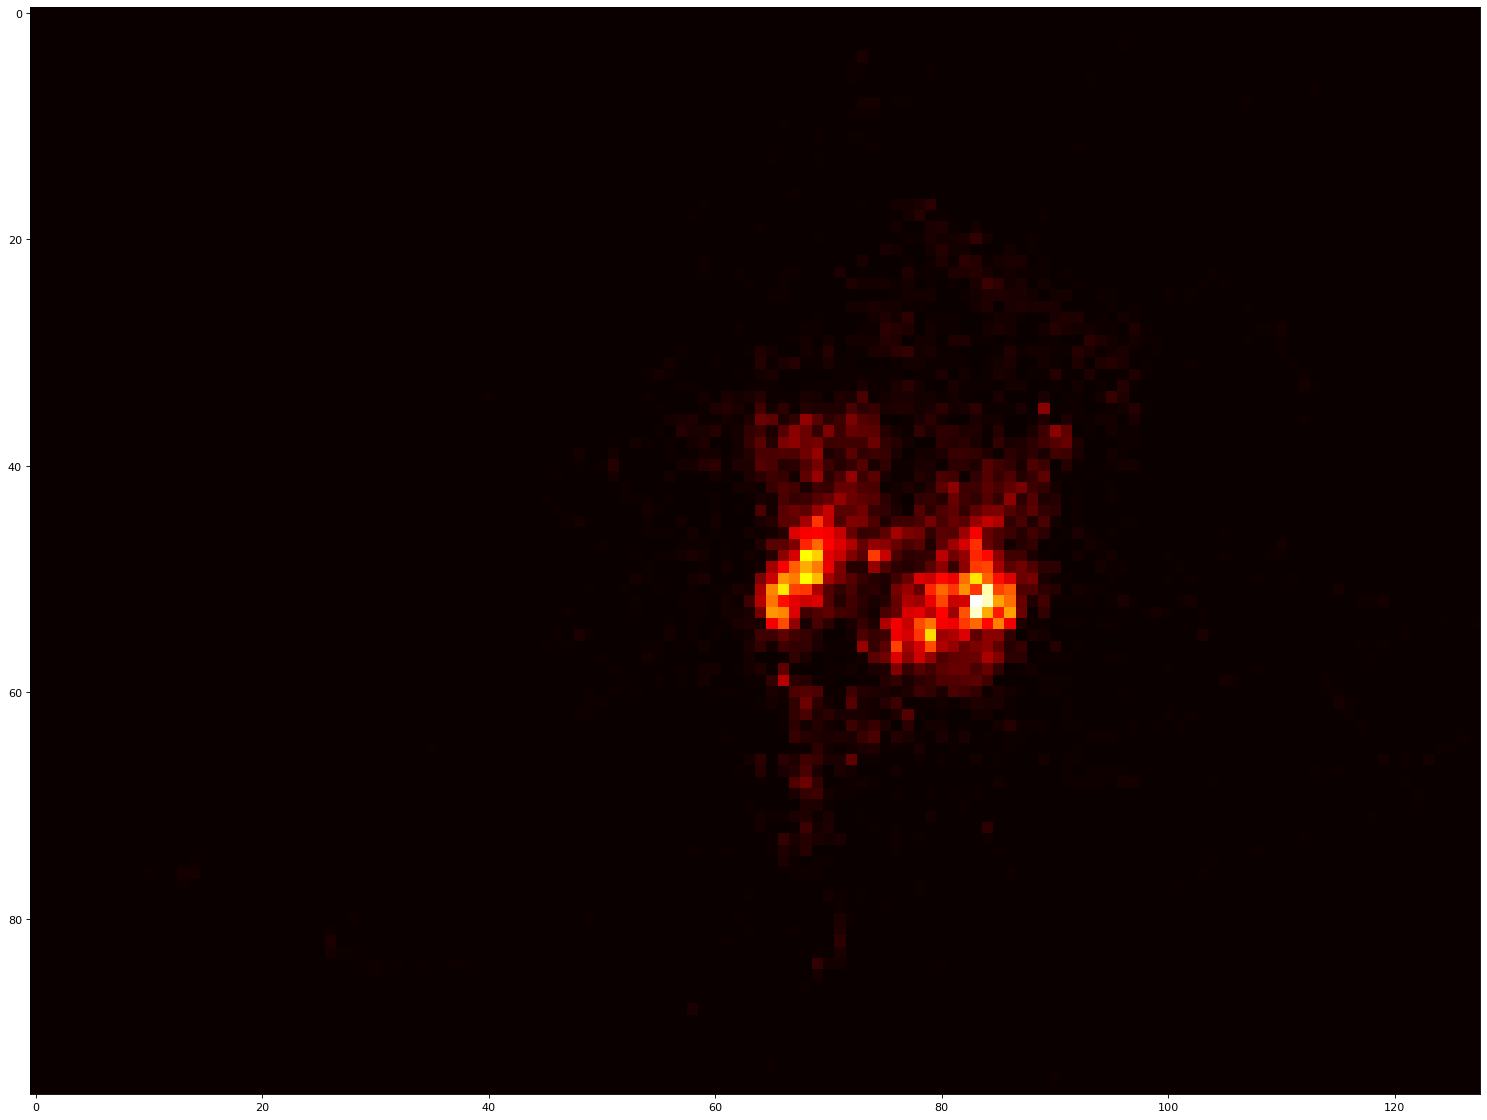

In [62]:
inp_c = "Avinash"
inp_c_label = "Avinash"
inp_s = "avinash"
# inp_s_label ="kunal"
start = 5
end = 1257
start = (int(start//100)*60*24)+(int(start%100)*24)
end = (int(end//100)*60*24)+(int(end%100)*24)
print(start,end)
heatmaps(inp_c,inp_c_label,inp_s,inp_s,inp_s,start,end)
dlib_distance(inp_c,inp_c_label,inp_s,start,end)

1272 20640


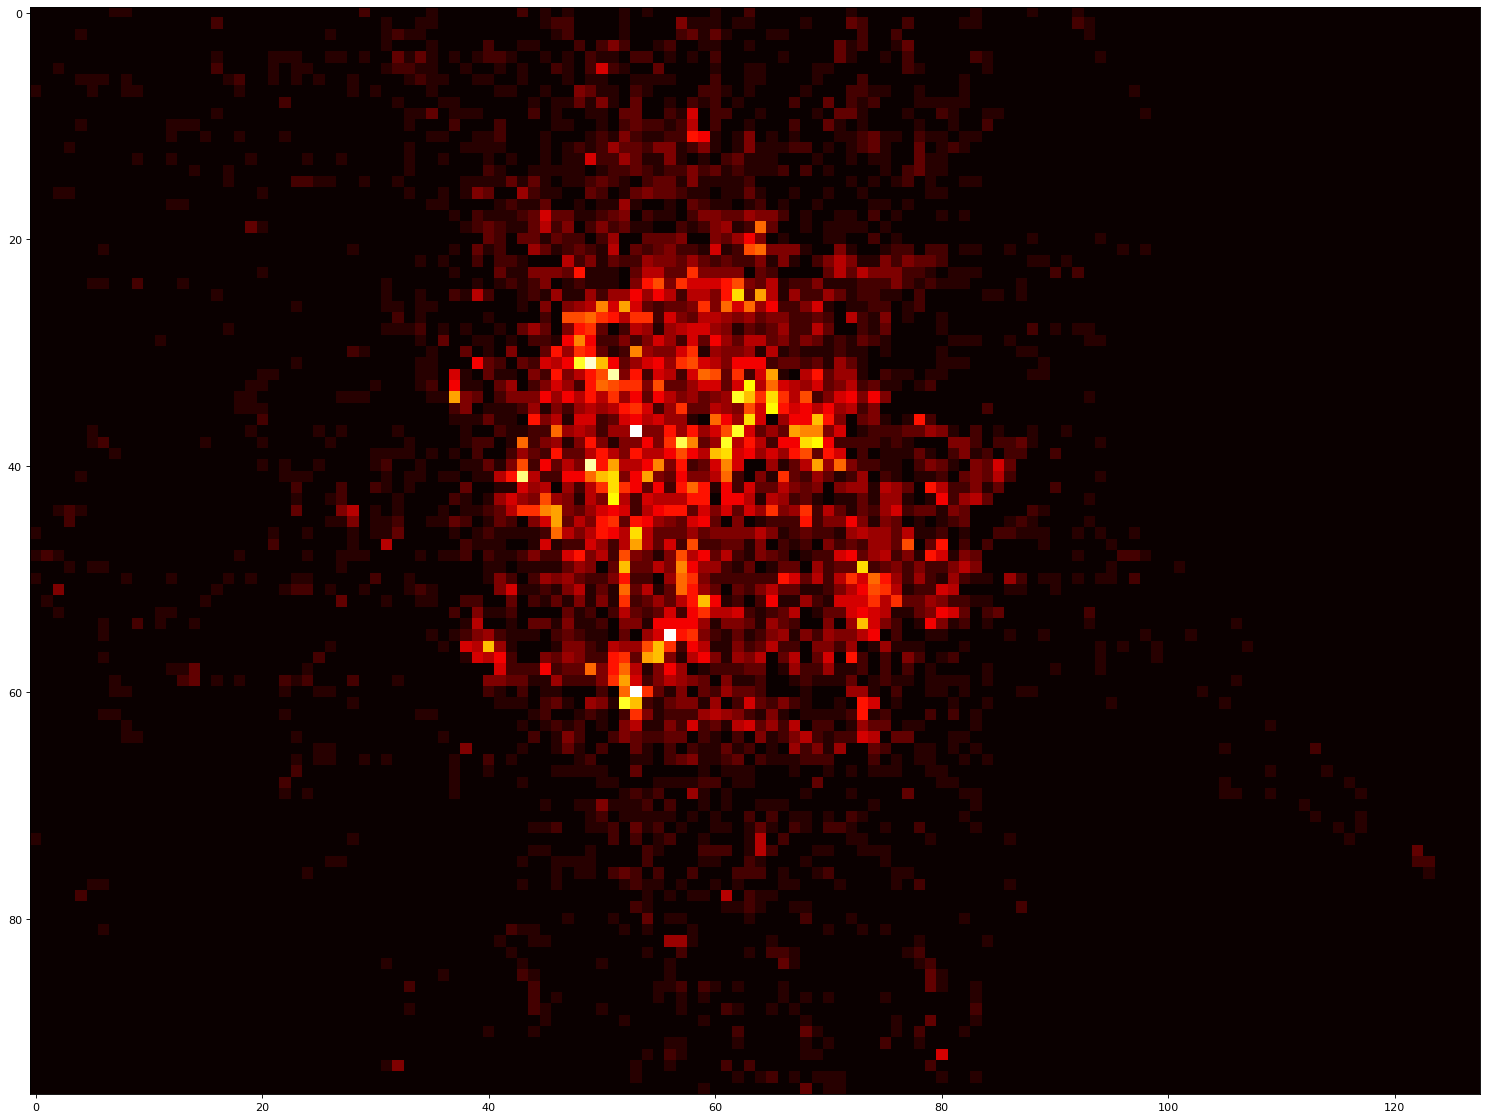

In [63]:
inp_c = "Devendra"
inp_c_label = "Devendra"
inp_s = "devendra"
start = 0
end = 1500
start = (int(start//100)*60*24)+(int(start%100)*24)
end = (int(end//100)*60*24)+(int(end%100)*24)
print(start,end)
heatmaps(inp_c,inp_c_label,inp_s,inp_s,inp_s,start,end)
dlib_distance(inp_c,inp_c_label,inp_s,start,end)

912 18960
14153


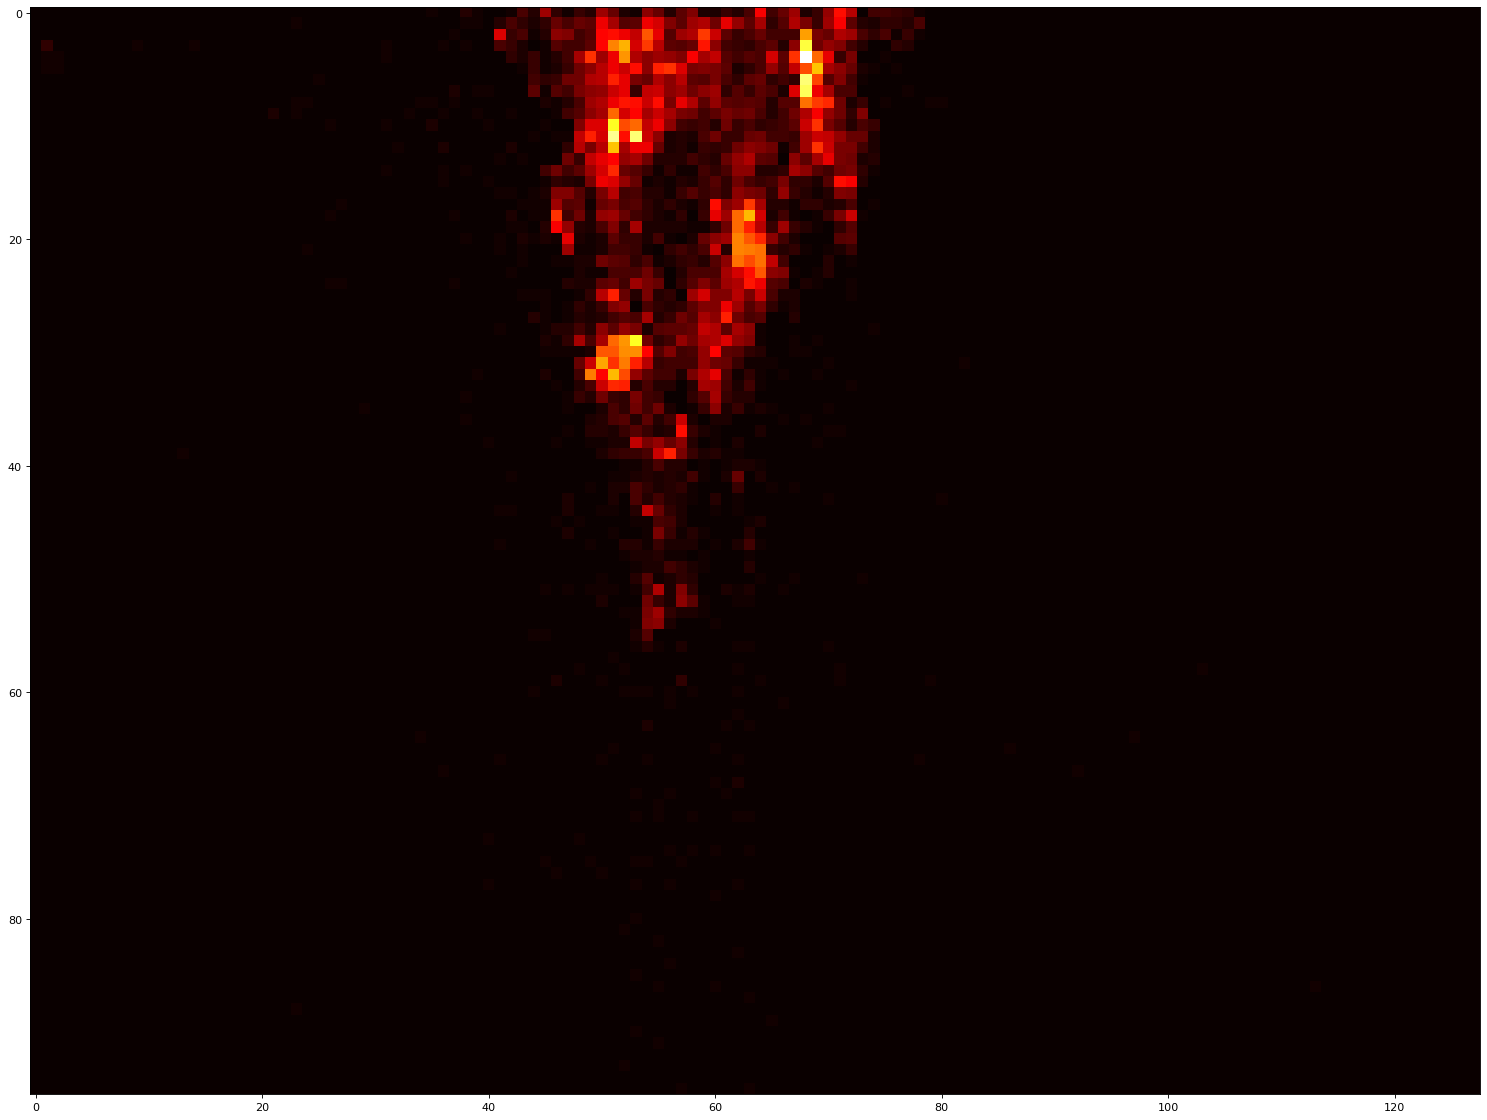

In [68]:
# use yc=yc+200


inp_c = "Koundinya"
inp_c_label = "Koundinya"
inp_s = "koundinya"
# inp_s_label ="kunal"
start = 38
end = 1310
start = (int(start//100)*60*24)+(int(start%100)*24)
end = (int(end//100)*60*24)+(int(end%100)*24)
print(start,end)
heatmaps(inp_c,inp_c_label,inp_s,inp_s,inp_s,start,end)
dlib_distance(inp_c,inp_c_label,inp_s,start,end)

1272 20640


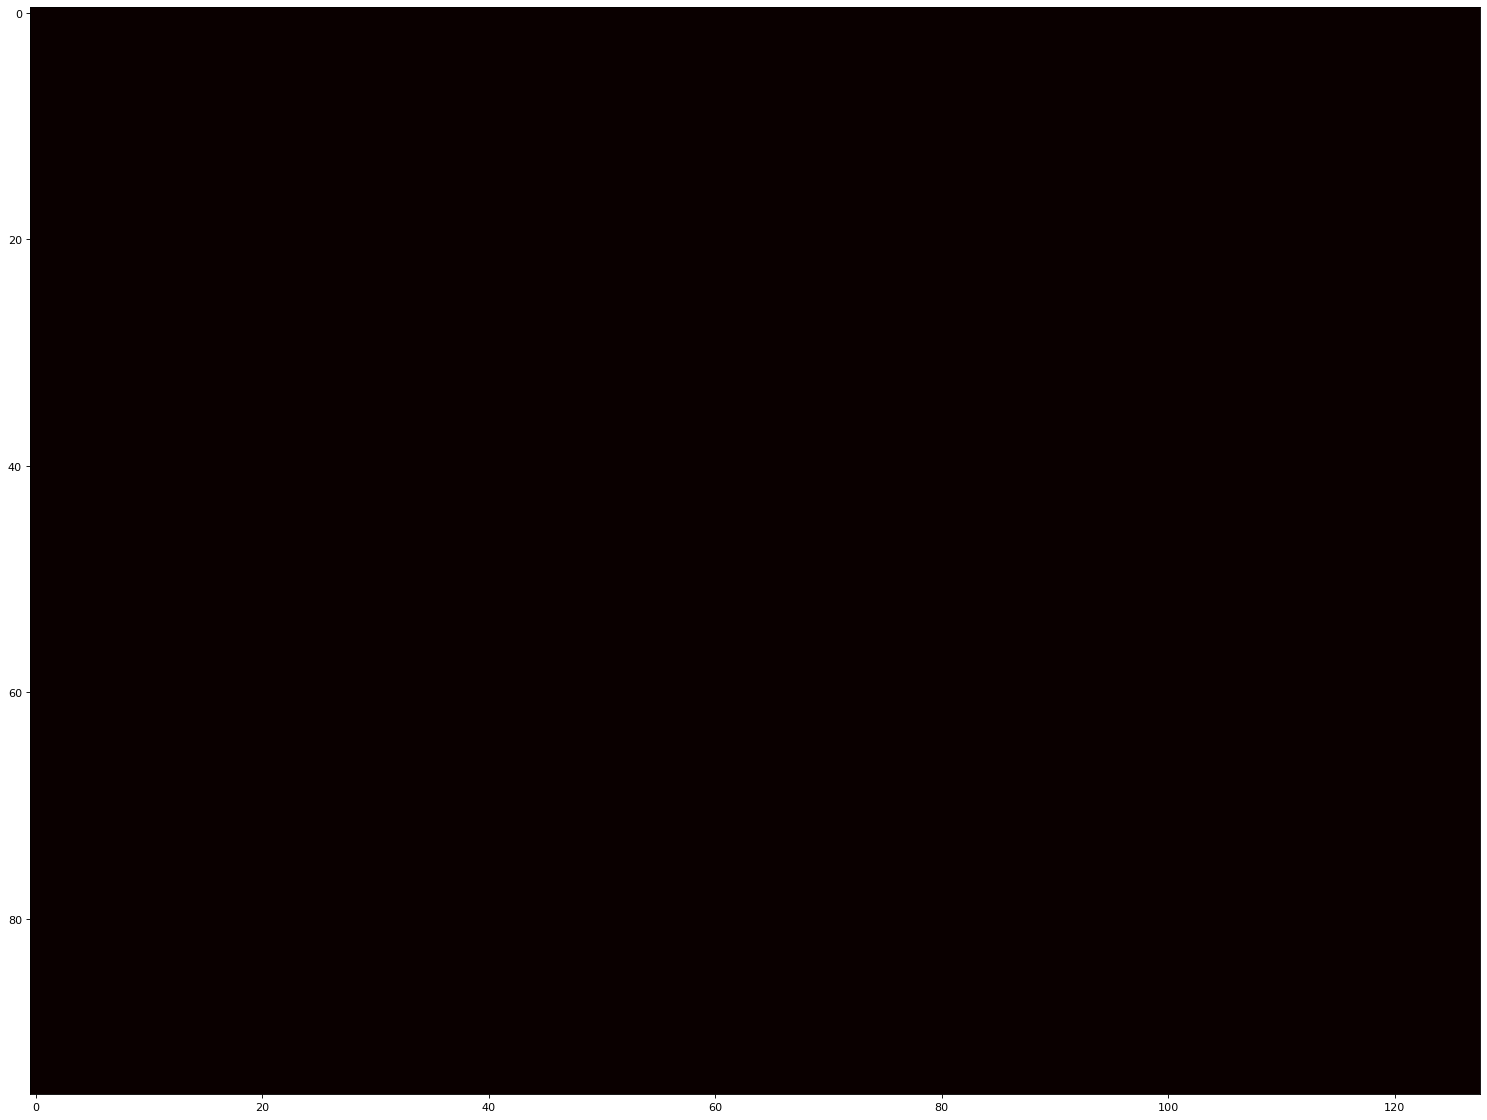

In [65]:
inp_c = "sahil"
inp_c_label = "sahil1_25"
inp_s = "sahil"
# inp_s_label ="kunal"
start = 53
end = 1420
start = (int(start//100)*60*24)+(int(start%100)*24)
end = (int(end//100)*60*24)+(int(end%100)*24)
print(start,end)
heatmaps(inp_c,inp_c_label,inp_s,inp_s,inp_s,start,end)
dlib_distance(inp_c,inp_c_label,inp_s,start,end)